<a href="https://colab.research.google.com/github/vorobieva/validate_de_novo_designed_proteins/blob/main/Code/analysis_Fig_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Mount google drive
from google.colab import drive
drive.mount('/content/google_drive', force_remount=True)

Mounted at /content/google_drive


In [ ]:
#@title Input protein sequence, then hit `Runtime` -> `Run all`

input_soluble = '/content/google_drive/My Drive/AF_vs_ESMF/ESMFold_masking/soluble' #@param {type:"string"}
input_membrane = '/content/google_drive/My Drive/AF_vs_ESMF/ESMFold_masking/membrane' #@param {type:"string"}
input_designs = '/content/google_drive/My Drive/AF_vs_ESMF/ESMFold_masking/designs' #@param {type:"string"}
sample_advanced = '/content/google_drive/My Drive/AF_vs_ESMF/ESMFold_masking/advanced_notebook_sample_output' #@param {type:"string"}

#input_AlphaFold = '/content/google_drive/My Drive/AF_vs_ESMF/BB_designs/dAF_F.pckl' #@param {type:"string"}
#input_AlphaFold2 = '/content/google_drive/My Drive/AF_vs_ESMF/BB_designs/dAF_F2.pckl' #@param {type:"string"}
#input_AlphaFold3 = '/content/google_drive/My Drive/AF_vs_ESMF/BB_designs/dAF_F3.pckl' #@param {type:"string"}


In [ ]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import json
import numpy as np
import pickle
from scipy.stats import mannwhitneyu, normaltest
import csv

%matplotlib inline

In [ ]:
dict_TOP7 = {}
dict_HBI_b_10 = {}
dict_4UOS = {}

masking=[30,35,40,45,50,55,60,65,70,75,80,85,90,95,99]

for pdb in ["TOP7","HBI_b_10","4UOS"]:
    d = {}
    for mask in masking:
        ptm=[]
        plDDT = []
        plDDT_backbone = []
        for f in glob.glob(input_soluble+"/"+pdb+"_"+str(mask)+"mask_*/*.pdb"):
            pl = []
            pl_bb = []
            ptm.append(float(os.path.basename(f).split("_")[0].replace("ptm","")))
            with open(f, "r") as in_f:
                for line in in_f:
                    if line.startswith("ATOM"):
                        vals = line.split()
                        if vals[2] in ["N","CA","C","O","CB"]:
                            pl_bb.append(float(vals[10]))
                        pl.append(float(vals[10]))
            plDDT.append(sum(pl)/len(pl))
            plDDT_backbone.append(sum(pl_bb)/len(pl_bb))
        for i in range(len(ptm)):
            d[(mask,i)] = [ptm[i],plDDT[i],plDDT_backbone[i]]
    df = pd.DataFrame(d)
    df = df.T
    df = df.rename(columns={0: "ptm", 1: "plDDT", 2: "plDDT_backbone"})
    print(df)
    df.index.names = ['%_mask','model']
    new_df_name = "d"+pdb
    exec(f'{new_df_name} = df.copy()')

print(dTOP7)
print(dHBI_b_10)
print(d4UOS)

KeyboardInterrupt: ignored

In [ ]:
masking=[30,35,40,45,50,55,60,65,70,75,80,85,90,95,99]

for pdb in ["TMB2_17","TMB12_sol09_3","TMB12tr12","TMB14_14"]:
    d = {}
    for mask in masking:
        ptm=[]
        plDDT = []
        plDDT_backbone = []
        for f in glob.glob(input_membrane+"/"+pdb+"_"+str(mask)+"mask_*/*.pdb"):
            pl = []
            pl_bb = []
            ptm.append(float(os.path.basename(f).split("_")[0].replace("ptm","")))
            with open(f, "r") as in_f:
                for line in in_f:
                    if line.startswith("ATOM"):
                        vals = line.split()
                        if vals[2] in ["N","CA","C","O","CB"]:
                            pl_bb.append(float(vals[10]))
                        pl.append(float(vals[10]))
            plDDT.append(sum(pl)/len(pl))
            plDDT_backbone.append(sum(pl_bb)/len(pl_bb))
        for i in range(len(ptm)):
            d[(mask,i)] = [ptm[i],plDDT[i],plDDT_backbone[i]]
    df = pd.DataFrame(d)
    df = df.T
    df = df.rename(columns={0: "ptm", 1: "plDDT", 2: "plDDT_backbone"})
    df.index.names = ['%_mask','model']
    new_df_name = "d"+pdb
    exec(f'{new_df_name} = df.copy()')

print(dTMB2_17)
print(dTMB12_sol09_3)
print(dTMB12tr12)
print(dTMB14_14)

                ptm      plDDT  plDDT_backbone
%_mask model                                  
30     0      0.846  82.009345       86.498020
       1      0.834  80.747962       85.239604
       2      0.833  80.646927       85.102112
       3      0.834  80.752439       85.277838
       4      0.830  81.032703       85.605281
...             ...        ...             ...
99     59     0.097  34.679641       35.799076
       60     0.085  32.083168       32.853366
       61     0.121  30.866515       32.089637
       62     0.137  33.403643       34.776304
       63     0.216  37.177339       38.510594

[960 rows x 3 columns]
                ptm      plDDT  plDDT_backbone
%_mask model                                  
30     0      0.825  81.538083       85.682751
       1      0.818  80.778269       85.214814
       2      0.833  81.882234       86.334115
       3      0.827  81.932041       86.174183
       4      0.822  81.671455       85.874160
...             ...        ...      

In [ ]:
masking=[30,35,40,45,50,55,60,65,70,75,80,85,90,95,99]

for pdb in ["TMB14_14"]:
    d = {}
    for mask in masking:
        ptm=[]
        plDDT = []
        plDDT_backbone = []
        print(glob.glob(sample_advanced))
        for f in glob.glob(sample_advanced+"/"+pdb+"_*/"+"*_LM_m0."+str(mask)+".pdb"):
            pl = []
            pl_bb = []
            ptm.append(float(os.path.basename(f).split("_")[0].replace("ptm","")))
            with open(f, "r") as in_f:
                for line in in_f:
                    if line.startswith("ATOM"):
                        vals = line.split()
                        if vals[2] in ["N","CA","C","O","CB"]:
                            pl_bb.append(float(vals[10]))
                        pl.append(float(vals[10]))
            plDDT.append(sum(pl)/len(pl))
            plDDT_backbone.append(sum(pl_bb)/len(pl_bb))
        for i in range(len(ptm)):
            d[(mask,i)] = [ptm[i],plDDT[i],plDDT_backbone[i]]
    df = pd.DataFrame(d)
    df = df.T
    df = df.rename(columns={0: "ptm", 1: "plDDT", 2: "plDDT_backbone"})
    df.index.names = ['%_mask','model']
    new_df_name = "d"+pdb+"_B"
    exec(f'{new_df_name} = df.copy()')

print(dTMB14_14_B)

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


ValueError: ignored

In [ ]:
masking=[30,35,40,45,50,55,60,65,70,75,80,85,90,95,99]
pdb_list = ["TMB2_"+str(x) for x in range(1,91)]
print(pdb_list)

for pdb in pdb_list:
    d = {}
    for mask in masking:
        ptm=[]
        plDDT = []
        plDDT_backbone = []
        for f in glob.glob(input_designs+"/"+pdb+"_mask_*/"+"*_LM_m0."+str(mask)+".pdb"):
            pl = []
            pl_bb = []
            ptm.append(float(os.path.basename(f).split("_")[0].replace("ptm","")))
            with open(f, "r") as in_f:
                for line in in_f:
                    if line.startswith("ATOM"):
                        vals = line.split()
                        if vals[2] in ["N","CA","C","O","CB"]:
                            pl_bb.append(float(vals[10]))
                        pl.append(float(vals[10]))
            plDDT.append(sum(pl)/len(pl))
            plDDT_backbone.append(sum(pl_bb)/len(pl_bb))
        for i in range(len(ptm)):
            d[(mask,i)] = [ptm[i],plDDT[i],plDDT_backbone[i]]
    df = pd.DataFrame(d)
    df = df.T
    df = df.rename(columns={0: "ptm", 1: "plDDT", 2: "plDDT_backbone"})
    df.index.names = ['%_mask','model']
    new_df_name = "d"+pdb
    exec(f'{new_df_name} = df.copy()')

#print(dTMB14_14_B)

['TMB2_1', 'TMB2_2', 'TMB2_3', 'TMB2_4', 'TMB2_5', 'TMB2_6', 'TMB2_7', 'TMB2_8', 'TMB2_9', 'TMB2_10', 'TMB2_11', 'TMB2_12', 'TMB2_13', 'TMB2_14', 'TMB2_15', 'TMB2_16', 'TMB2_17', 'TMB2_18', 'TMB2_19', 'TMB2_20', 'TMB2_21', 'TMB2_22', 'TMB2_23', 'TMB2_24', 'TMB2_25', 'TMB2_26', 'TMB2_27', 'TMB2_28', 'TMB2_29', 'TMB2_30', 'TMB2_31', 'TMB2_32', 'TMB2_33', 'TMB2_34', 'TMB2_35', 'TMB2_36', 'TMB2_37', 'TMB2_38', 'TMB2_39', 'TMB2_40', 'TMB2_41', 'TMB2_42', 'TMB2_43', 'TMB2_44', 'TMB2_45', 'TMB2_46', 'TMB2_47', 'TMB2_48', 'TMB2_49', 'TMB2_50', 'TMB2_51', 'TMB2_52', 'TMB2_53', 'TMB2_54', 'TMB2_55', 'TMB2_56', 'TMB2_57', 'TMB2_58', 'TMB2_59', 'TMB2_60', 'TMB2_61', 'TMB2_62', 'TMB2_63', 'TMB2_64', 'TMB2_65', 'TMB2_66', 'TMB2_67', 'TMB2_68', 'TMB2_69', 'TMB2_70', 'TMB2_71', 'TMB2_72', 'TMB2_73', 'TMB2_74', 'TMB2_75', 'TMB2_76', 'TMB2_77', 'TMB2_78', 'TMB2_79', 'TMB2_80', 'TMB2_81', 'TMB2_82', 'TMB2_83', 'TMB2_84', 'TMB2_85', 'TMB2_86', 'TMB2_87', 'TMB2_88', 'TMB2_89', 'TMB2_90']


In [ ]:
print(dTMB2_90)

                ptm      plDDT  plDDT_backbone
%_mask model                                  
30     0      0.791  77.284435       81.797805
       1      0.786  77.046435       81.456881
       2      0.791  77.522290       82.017657
       3      0.789  76.771637       81.343300
       4      0.788  76.823130       81.328218
...             ...        ...             ...
95     59     0.101  33.955389       34.718366
       60     0.115  28.736145       29.922030
       61     0.098  32.347565       33.337838
       62     0.125  30.326642       31.883746
       63     0.192  27.930021       29.113416

[896 rows x 3 columns]


In [ ]:
masking=[30,35,40,45,50,55,60,65,70,75,80,85,90,95,99]
pdb_list = ["TMB2_"+str(x) for x in range(76,91)]
print(pdb_list)

for pdb in pdb_list:
    d = {}
    for mask in masking:
        ptm=[]
        plDDT = []
        plDDT_backbone = []
        for f in glob.glob(input_designs+"/"+pdb+"_mask_*/"+"*_LM_m0."+str(mask)+".pdb"):
            pl = []
            pl_bb = []
            ptm.append(float(os.path.basename(f).split("_")[0].replace("ptm","")))
            with open(f, "r") as in_f:
                for line in in_f:
                    if line.startswith("ATOM"):
                        vals = line.split()
                        if vals[2] in ["N","CA","C","O","CB"]:
                            pl_bb.append(float(vals[10]))
                        pl.append(float(vals[10]))
            plDDT.append(sum(pl)/len(pl))
            plDDT_backbone.append(sum(pl_bb)/len(pl_bb))
        for i in range(len(ptm)):
            d[(mask,i)] = [ptm[i],plDDT[i],plDDT_backbone[i]]
    df = pd.DataFrame(d)
    df = df.T
    df = df.rename(columns={0: "ptm", 1: "plDDT", 2: "plDDT_backbone"})
    df.index.names = ['%_mask','model']
    new_df_name = "d"+pdb
    exec(f'{new_df_name} = df.copy()')

#print(dTMB14_14_B)

['TMB2_76', 'TMB2_77', 'TMB2_78', 'TMB2_79', 'TMB2_80', 'TMB2_81', 'TMB2_82', 'TMB2_83', 'TMB2_84', 'TMB2_85', 'TMB2_86', 'TMB2_87', 'TMB2_88', 'TMB2_89', 'TMB2_90']


In [ ]:
print(dTMB2_84)

                ptm      plDDT  plDDT_backbone
%_mask model                                  
30     0      0.681  70.708417       74.412285
       1      0.720  74.534166       78.210579
       2      0.748  75.913688       79.775894
       3      0.751  76.763666       80.787914
       4      0.759  76.897056       80.839354
...             ...        ...             ...
95     59     0.157  27.768608       29.267566
       60     0.160  27.683443       29.310447
       61     0.165  27.175399       28.717781
       62     0.177  26.025080       27.479139
       63     0.172  32.251403       33.803742

[896 rows x 3 columns]


In [ ]:
masking=[30,35,40,45,50,55,60,65,70,75,80,85,90,95,99]
pdb_list = ["HBI_b_"+str(x) for x in range(1,57)]
pdb_list.remove("HBI_b_5")
pdb_list.remove("HBI_b_6")
pdb_list.remove("HBI_b_10")
pdb_list.remove("HBI_b_11")
pdb_list.remove("HBI_b_12")
pdb_list.remove("HBI_b_18")
pdb_list.remove("HBI_b_24")
pdb_list.remove("HBI_b_30")
pdb_list.remove("HBI_b_36")
pdb_list.remove("HBI_b_42")
pdb_list.remove("HBI_b_47")
pdb_list.remove("HBI_b_48")
pdb_list.remove("HBI_b_51")
pdb_list.remove("HBI_b_52")
pdb_list.remove("HBI_b_54")
print(pdb_list)

for pdb in pdb_list:
    print(pdb)
    d = {}
    for csv_f in glob.glob(input_soluble+"/"+pdb+"_mask_*/"+pdb+".csv"):
        with open(csv_f, "r") as infile:
            for line in infile:
                vals=line.split(";")
                d[(int(vals[0]),int(vals[1]))]=[float(vals[2]), float(vals[3])]

    for mask in masking:
        ptm=[]
        plDDT = []
        plDDT_backbone = []
        for f in glob.glob(input_soluble+"/"+pdb+"_mask_*/"+"*_LM_m0."+str(mask)+".pdb"):
            pl = []
            pl_bb = []
            ptm.append(float(os.path.basename(f).split("_")[0].replace("ptm","")))
            with open(f, "r") as in_f:
                for line in in_f:
                    if line.startswith("ATOM"):
                        vals = line.split()
                        if vals[2] in ["N","CA","C","O","CB"]:
                            pl_bb.append(float(vals[10]))
                        pl.append(float(vals[10]))
            plDDT.append(sum(pl)/len(pl))
            plDDT_backbone.append(sum(pl_bb)/len(pl_bb))
        for i in range(len(ptm)):
            d[(mask,i)].append(ptm[i])
            d[(mask,i)].append(plDDT[i])
            d[(mask,i)].append(plDDT_backbone[i])
    df = pd.DataFrame(d)
    df = df.T
    df = df.rename(columns={0:"tmscore",1:"RMSD",2: "ptm", 3: "plDDT", 4: "plDDT_backbone"})
    df.index.names = ['%_mask','model']
    new_df_name = "d"+pdb
    exec(f'{new_df_name} = df.copy()')

['HBI_b_1', 'HBI_b_2', 'HBI_b_3', 'HBI_b_4', 'HBI_b_7', 'HBI_b_8', 'HBI_b_9', 'HBI_b_13', 'HBI_b_14', 'HBI_b_15', 'HBI_b_16', 'HBI_b_17', 'HBI_b_19', 'HBI_b_20', 'HBI_b_21', 'HBI_b_22', 'HBI_b_23', 'HBI_b_25', 'HBI_b_26', 'HBI_b_27', 'HBI_b_28', 'HBI_b_29', 'HBI_b_31', 'HBI_b_32', 'HBI_b_33', 'HBI_b_34', 'HBI_b_35', 'HBI_b_37', 'HBI_b_38', 'HBI_b_39', 'HBI_b_40', 'HBI_b_41', 'HBI_b_43', 'HBI_b_44', 'HBI_b_45', 'HBI_b_46', 'HBI_b_49', 'HBI_b_50', 'HBI_b_53', 'HBI_b_55', 'HBI_b_56']
HBI_b_1


ValueError: ignored

In [ ]:
print(dHBI_b_13)

              tmscore  RMSD    ptm      plDDT  plDDT_backbone
%_mask model                                                 
95     8      0.25104  4.33  0.181  36.789759       38.321734
65     24     0.76188  2.30  0.698  72.995120       75.774077
55     5      0.74326  2.53  0.680  71.718771       74.230314
90     0      0.74821  2.45  0.642  68.605446       70.985461
30     41     0.92914  1.02  0.773  78.618386       82.298432
...               ...   ...    ...        ...             ...
85     42     0.74222  2.58  0.612  67.605084       70.078653
75     18     0.74614  2.44  0.718  74.932783       77.737343
99     17     0.15809  4.63  0.109  30.539614       31.582915
30     7      0.92533  1.06  0.782  78.897108       82.514077
60     12     0.74865  2.64  0.711  73.808157       76.544760

[960 rows x 5 columns]


In [ ]:
dmean_TOP7 = dTOP7.groupby(level=0).mean()
dmean_HBI_b_10 = dHBI_b_10.groupby(level=0).mean()
dmean_4UOS = d4UOS.groupby(level=0).mean()

dmean_TMB2_17 = dTMB2_17.groupby(level=0).mean()
dmean_TMB12_sol09_3 = dTMB12_sol09_3.groupby(level=0).mean()
dmean_TMB12tr12 = dTMB12tr12.groupby(level=0).mean()
#dmean_TMB14_14 = dTMB14_14.groupby(level=0).mean()
#dbest_p_AF48 = dAF48_Filt.sort_values("plDDT").groupby(level=0).nth(4)
#dbest_r_AF48 = dAF48_Filt.sort_values("RMSD").groupby(level=0).nth(0)
dmean_TOP7

,ptm,plDDT,plDDT_backbone
%_mask,,,
30,0.807063,80.143381,83.905210
35,0.806984,80.148315,83.874191
40,0.806625,80.110610,83.814607
45,0.807625,80.221704,83.879933
50,0.807547,80.211710,83.829446
55,0.807813,80.281018,83.884170
60,0.803687,80.109482,83.645137
65,0.805000,80.249844,83.738946
70,0.804422,80.268512,83.746537


<AxesSubplot:xlabel='%_mask', ylabel='plDDT'>

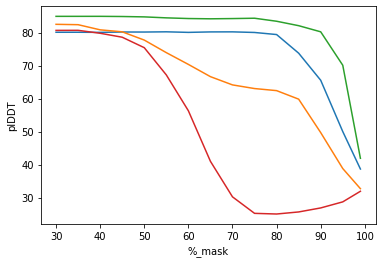

In [ ]:
sns.lineplot(data=dmean_TOP7, x=dmean_TOP7.index, y=dmean_TOP7.plDDT)
sns.lineplot(data=dmean_HBI_b_10, x=dmean_HBI_b_10.index, y=dmean_HBI_b_10.plDDT)
sns.lineplot(data=dmean_4UOS, x=dmean_4UOS.index, y=dmean_4UOS.plDDT)
sns.lineplot(data=dmean_TMB2_17, x=dmean_TMB2_17.index, y=dmean_TMB2_17.plDDT)

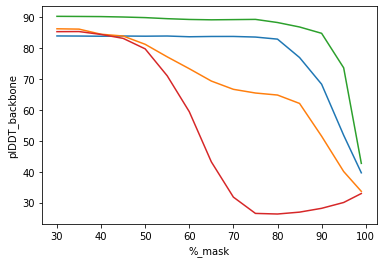

In [ ]:
sns.lineplot(data=dmean_TOP7, x=dmean_TOP7.index, y=dmean_TOP7.plDDT_backbone)
sns.lineplot(data=dmean_HBI_b_10, x=dmean_HBI_b_10.index, y=dmean_HBI_b_10.plDDT_backbone)
sns.lineplot(data=dmean_4UOS, x=dmean_4UOS.index, y=dmean_4UOS.plDDT_backbone)
sns.lineplot(data=dmean_TMB2_17, x=dmean_TMB2_17.index, y=dmean_TMB2_17.plDDT_backbone)

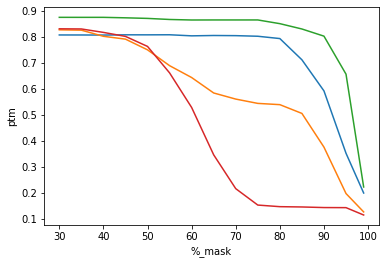

In [ ]:
sns.lineplot(data=dmean_TOP7, x=dmean_TOP7.index, y=dmean_TOP7.ptm)
sns.lineplot(data=dmean_HBI_b_10, x=dmean_HBI_b_10.index, y=dmean_HBI_b_10.ptm)
sns.lineplot(data=dmean_4UOS, x=dmean_4UOS.index, y=dmean_4UOS.ptm)
sns.lineplot(data=dmean_TMB2_17, x=dmean_TMB2_17.index, y=dmean_TMB2_17.ptm)

In [ ]:
dmean_TMB2_1 = dTMB2_1.groupby(level=0).mean()
dmean_TMB2_2 = dTMB2_2.groupby(level=0).mean()
dmean_TMB2_3 = dTMB2_3.groupby(level=0).mean()
dmean_TMB2_4 = dTMB2_4.groupby(level=0).mean()
dmean_TMB2_5 = dTMB2_5.groupby(level=0).mean()
dmean_TMB2_6 = dTMB2_6.groupby(level=0).mean()
dmean_TMB2_7 = dTMB2_7.groupby(level=0).mean()
dmean_TMB2_8 = dTMB2_8.groupby(level=0).mean()
dmean_TMB2_9 = dTMB2_9.groupby(level=0).mean()
dmean_TMB2_10 = dTMB2_10.groupby(level=0).mean()
dmean_TMB2_11 = dTMB2_11.groupby(level=0).mean()
dmean_TMB2_12 = dTMB2_12.groupby(level=0).mean()
dmean_TMB2_13 = dTMB2_13.groupby(level=0).mean()
dmean_TMB2_14 = dTMB2_14.groupby(level=0).mean()
dmean_TMB2_15 = dTMB2_15.groupby(level=0).mean()
dmean_TMB2_16 = dTMB2_16.groupby(level=0).mean()
dmean_TMB2_17 = dTMB2_17.groupby(level=0).mean()
dmean_TMB2_18 = dTMB2_18.groupby(level=0).mean()
dmean_TMB2_19 = dTMB2_19.groupby(level=0).mean()
dmean_TMB2_20 = dTMB2_20.groupby(level=0).mean()
dmean_TMB2_20

,ptm,plDDT,plDDT_backbone
%_mask,,,
30,0.780656,77.613234,82.019286
35,0.777641,77.426560,81.818123
40,0.764188,76.372299,80.729446
45,0.747859,75.123288,79.393267
50,0.703453,71.686707,75.754744
55,0.619078,64.644233,68.320302
60,0.489203,54.067120,57.098642
65,0.284297,37.077405,39.061990
70,0.174437,28.126379,29.578821


<AxesSubplot:xlabel='%_mask', ylabel='ptm'>

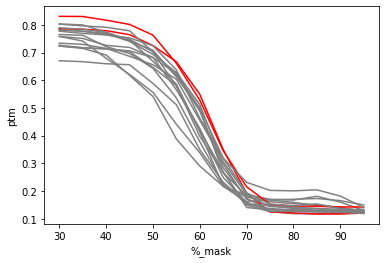

In [ ]:
sns.lineplot(data=dmean_TMB2_1, x=dmean_TMB2_1.index, y=dmean_TMB2_1.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_2, x=dmean_TMB2_2.index, y=dmean_TMB2_2.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_3, x=dmean_TMB2_3.index, y=dmean_TMB2_3.ptm, color="red")
sns.lineplot(data=dmean_TMB2_4, x=dmean_TMB2_4.index, y=dmean_TMB2_4.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_5, x=dmean_TMB2_5.index, y=dmean_TMB2_5.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_6, x=dmean_TMB2_6.index, y=dmean_TMB2_6.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_7, x=dmean_TMB2_7.index, y=dmean_TMB2_7.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_8, x=dmean_TMB2_8.index, y=dmean_TMB2_8.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_9, x=dmean_TMB2_9.index, y=dmean_TMB2_9.ptm, color="grey")
#sns.lineplot(data=dmean_TMB2_10, x=dmean_TMB2_10.index, y=dmean_TMB2_10.ptm, color="grey")
#sns.lineplot(data=dmean_TMB2_11, x=dmean_TMB2_11.index, y=dmean_TMB2_11.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_12, x=dmean_TMB2_12.index, y=dmean_TMB2_12.ptm, color="grey")
#sns.lineplot(data=dmean_TMB2_13, x=dmean_TMB2_13.index, y=dmean_TMB2_13.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_14, x=dmean_TMB2_14.index, y=dmean_TMB2_14.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_15, x=dmean_TMB2_15.index, y=dmean_TMB2_15.ptm, color="grey")
#sns.lineplot(data=dmean_TMB2_16, x=dmean_TMB2_16.index, y=dmean_TMB2_16.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_17, x=dmean_TMB2_17.index, y=dmean_TMB2_17.ptm, color="red")
sns.lineplot(data=dmean_TMB2_18, x=dmean_TMB2_18.index, y=dmean_TMB2_18.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_19, x=dmean_TMB2_19.index, y=dmean_TMB2_19.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_20, x=dmean_TMB2_20.index, y=dmean_TMB2_20.ptm, color="grey")


In [ ]:
dmean_TMB2_21 = dTMB2_21.groupby(level=0).mean()
dmean_TMB2_22 = dTMB2_22.groupby(level=0).mean()
dmean_TMB2_23 = dTMB2_23.groupby(level=0).mean()
dmean_TMB2_24 = dTMB2_24.groupby(level=0).mean()
dmean_TMB2_25 = dTMB2_25.groupby(level=0).mean()
dmean_TMB2_26 = dTMB2_26.groupby(level=0).mean()
dmean_TMB2_27 = dTMB2_27.groupby(level=0).mean()
dmean_TMB2_28 = dTMB2_28.groupby(level=0).mean()
dmean_TMB2_29 = dTMB2_29.groupby(level=0).mean()
dmean_TMB2_30 = dTMB2_30.groupby(level=0).mean()
dmean_TMB2_31 = dTMB2_31.groupby(level=0).mean()
dmean_TMB2_32 = dTMB2_32.groupby(level=0).mean()
dmean_TMB2_33 = dTMB2_33.groupby(level=0).mean()
dmean_TMB2_34 = dTMB2_34.groupby(level=0).mean()
dmean_TMB2_35 = dTMB2_35.groupby(level=0).mean()
dmean_TMB2_36 = dTMB2_36.groupby(level=0).mean()
dmean_TMB2_37 = dTMB2_37.groupby(level=0).mean()
dmean_TMB2_38 = dTMB2_38.groupby(level=0).mean()
dmean_TMB2_39 = dTMB2_39.groupby(level=0).mean()
dmean_TMB2_40 = dTMB2_40.groupby(level=0).mean()
dmean_TMB2_41 = dTMB2_41.groupby(level=0).mean()
dmean_TMB2_42 = dTMB2_42.groupby(level=0).mean()
dmean_TMB2_43 = dTMB2_43.groupby(level=0).mean()
dmean_TMB2_44 = dTMB2_44.groupby(level=0).mean()
dmean_TMB2_45 = dTMB2_45.groupby(level=0).mean()

<AxesSubplot:xlabel='%_mask', ylabel='ptm'>

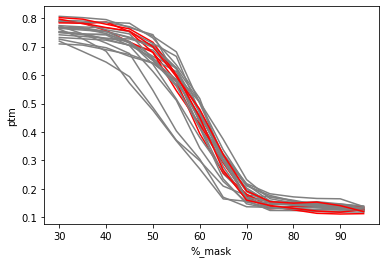

In [ ]:
sns.lineplot(data=dmean_TMB2_21, x=dmean_TMB2_21.index, y=dmean_TMB2_21.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_22, x=dmean_TMB2_22.index, y=dmean_TMB2_22.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_23, x=dmean_TMB2_23.index, y=dmean_TMB2_23.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_24, x=dmean_TMB2_24.index, y=dmean_TMB2_24.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_25, x=dmean_TMB2_25.index, y=dmean_TMB2_25.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_26, x=dmean_TMB2_26.index, y=dmean_TMB2_26.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_27, x=dmean_TMB2_27.index, y=dmean_TMB2_27.ptm, color="red")
sns.lineplot(data=dmean_TMB2_28, x=dmean_TMB2_28.index, y=dmean_TMB2_28.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_29, x=dmean_TMB2_29.index, y=dmean_TMB2_29.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_30, x=dmean_TMB2_30.index, y=dmean_TMB2_30.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_31, x=dmean_TMB2_31.index, y=dmean_TMB2_31.ptm, color="red")
sns.lineplot(data=dmean_TMB2_32, x=dmean_TMB2_32.index, y=dmean_TMB2_32.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_33, x=dmean_TMB2_33.index, y=dmean_TMB2_33.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_34, x=dmean_TMB2_34.index, y=dmean_TMB2_34.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_36, x=dmean_TMB2_36.index, y=dmean_TMB2_36.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_37, x=dmean_TMB2_37.index, y=dmean_TMB2_37.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_38, x=dmean_TMB2_38.index, y=dmean_TMB2_38.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_39, x=dmean_TMB2_39.index, y=dmean_TMB2_39.ptm, color="grey")
#sns.lineplot(data=dmean_TMB2_40, x=dmean_TMB2_40.index, y=dmean_TMB2_40.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_41, x=dmean_TMB2_41.index, y=dmean_TMB2_41.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_42, x=dmean_TMB2_42.index, y=dmean_TMB2_42.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_43, x=dmean_TMB2_43.index, y=dmean_TMB2_43.ptm, color="red")
sns.lineplot(data=dmean_TMB2_44, x=dmean_TMB2_44.index, y=dmean_TMB2_44.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_45, x=dmean_TMB2_45.index, y=dmean_TMB2_45.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_35, x=dmean_TMB2_35.index, y=dmean_TMB2_35.ptm, color="red")

In [ ]:
dmean_TMB2_46 = dTMB2_46.groupby(level=0).mean()
dmean_TMB2_47 = dTMB2_47.groupby(level=0).mean()
dmean_TMB2_48 = dTMB2_48.groupby(level=0).mean()
dmean_TMB2_49 = dTMB2_49.groupby(level=0).mean()
dmean_TMB2_50 = dTMB2_50.groupby(level=0).mean()
dmean_TMB2_51 = dTMB2_51.groupby(level=0).mean()
dmean_TMB2_52 = dTMB2_52.groupby(level=0).mean()
dmean_TMB2_53 = dTMB2_53.groupby(level=0).mean()
dmean_TMB2_54 = dTMB2_54.groupby(level=0).mean()
dmean_TMB2_55 = dTMB2_55.groupby(level=0).mean()
dmean_TMB2_56 = dTMB2_56.groupby(level=0).mean()
dmean_TMB2_57 = dTMB2_57.groupby(level=0).mean()
dmean_TMB2_58 = dTMB2_58.groupby(level=0).mean()
dmean_TMB2_59 = dTMB2_59.groupby(level=0).mean()
dmean_TMB2_60 = dTMB2_60.groupby(level=0).mean()
dmean_TMB2_61 = dTMB2_61.groupby(level=0).mean()
dmean_TMB2_62 = dTMB2_62.groupby(level=0).mean()
dmean_TMB2_63 = dTMB2_63.groupby(level=0).mean()
dmean_TMB2_64 = dTMB2_64.groupby(level=0).mean()
dmean_TMB2_65 = dTMB2_65.groupby(level=0).mean()

<AxesSubplot:xlabel='%_mask', ylabel='ptm'>

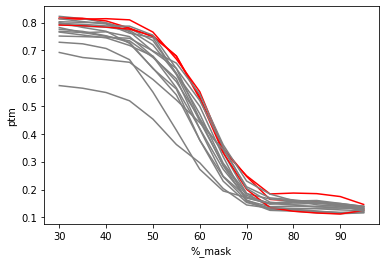

In [ ]:
#sns.lineplot(data=dmean_TMB2_46, x=dmean_TMB2_46.index, y=dmean_TMB2_46.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_47, x=dmean_TMB2_47.index, y=dmean_TMB2_47.ptm, color="red")
sns.lineplot(data=dmean_TMB2_48, x=dmean_TMB2_48.index, y=dmean_TMB2_48.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_49, x=dmean_TMB2_49.index, y=dmean_TMB2_49.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_50, x=dmean_TMB2_50.index, y=dmean_TMB2_50.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_51, x=dmean_TMB2_51.index, y=dmean_TMB2_51.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_52, x=dmean_TMB2_52.index, y=dmean_TMB2_52.ptm, color="grey")
#sns.lineplot(data=dmean_TMB2_53, x=dmean_TMB2_53.index, y=dmean_TMB2_53.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_54, x=dmean_TMB2_54.index, y=dmean_TMB2_54.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_55, x=dmean_TMB2_55.index, y=dmean_TMB2_55.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_56, x=dmean_TMB2_56.index, y=dmean_TMB2_56.ptm, color="red")
sns.lineplot(data=dmean_TMB2_57, x=dmean_TMB2_57.index, y=dmean_TMB2_57.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_58, x=dmean_TMB2_58.index, y=dmean_TMB2_58.ptm, color="red")
sns.lineplot(data=dmean_TMB2_59, x=dmean_TMB2_59.index, y=dmean_TMB2_59.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_60, x=dmean_TMB2_60.index, y=dmean_TMB2_60.ptm, color="grey")
#sns.lineplot(data=dmean_TMB2_61, x=dmean_TMB2_61.index, y=dmean_TMB2_61.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_62, x=dmean_TMB2_62.index, y=dmean_TMB2_62.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_63, x=dmean_TMB2_63.index, y=dmean_TMB2_63.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_64, x=dmean_TMB2_64.index, y=dmean_TMB2_64.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_65, x=dmean_TMB2_65.index, y=dmean_TMB2_65.ptm, color="grey")

In [ ]:
dmean_TMB2_66 = dTMB2_66.groupby(level=0).mean()
dmean_TMB2_67 = dTMB2_67.groupby(level=0).mean()
dmean_TMB2_68 = dTMB2_68.groupby(level=0).mean()
dmean_TMB2_69 = dTMB2_69.groupby(level=0).mean()
dmean_TMB2_70 = dTMB2_70.groupby(level=0).mean()
dmean_TMB2_71 = dTMB2_71.groupby(level=0).mean()
dmean_TMB2_72 = dTMB2_72.groupby(level=0).mean()
dmean_TMB2_73 = dTMB2_73.groupby(level=0).mean()
dmean_TMB2_74 = dTMB2_74.groupby(level=0).mean()
dmean_TMB2_75 = dTMB2_75.groupby(level=0).mean()

<AxesSubplot:xlabel='%_mask', ylabel='ptm'>

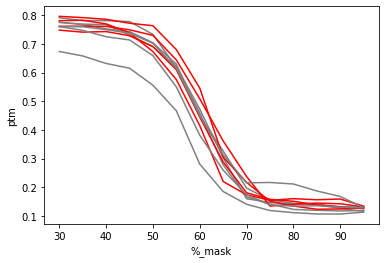

In [ ]:
sns.lineplot(data=dmean_TMB2_66, x=dmean_TMB2_66.index, y=dmean_TMB2_66.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_67, x=dmean_TMB2_67.index, y=dmean_TMB2_67.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_68, x=dmean_TMB2_68.index, y=dmean_TMB2_68.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_69, x=dmean_TMB2_69.index, y=dmean_TMB2_69.ptm, color="red")
sns.lineplot(data=dmean_TMB2_70, x=dmean_TMB2_70.index, y=dmean_TMB2_70.ptm, color="red")
sns.lineplot(data=dmean_TMB2_71, x=dmean_TMB2_71.index, y=dmean_TMB2_71.ptm, color="red")
sns.lineplot(data=dmean_TMB2_72, x=dmean_TMB2_72.index, y=dmean_TMB2_72.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_73, x=dmean_TMB2_73.index, y=dmean_TMB2_73.ptm, color="red")
sns.lineplot(data=dmean_TMB2_74, x=dmean_TMB2_74.index, y=dmean_TMB2_74.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_75, x=dmean_TMB2_75.index, y=dmean_TMB2_75.ptm, color="grey")

In [ ]:
dmean_TMB2_76 = dTMB2_76.groupby(level=0).mean()
dmean_TMB2_77 = dTMB2_77.groupby(level=0).mean()
dmean_TMB2_78 = dTMB2_78.groupby(level=0).mean()
dmean_TMB2_79 = dTMB2_79.groupby(level=0).mean()
dmean_TMB2_80 = dTMB2_80.groupby(level=0).mean()
dmean_TMB2_81 = dTMB2_81.groupby(level=0).mean()
dmean_TMB2_82 = dTMB2_82.groupby(level=0).mean()
dmean_TMB2_83 = dTMB2_83.groupby(level=0).mean()
dmean_TMB2_84 = dTMB2_84.groupby(level=0).mean()
dmean_TMB2_85 = dTMB2_85.groupby(level=0).mean()
dmean_TMB2_86 = dTMB2_86.groupby(level=0).mean()
dmean_TMB2_87 = dTMB2_87.groupby(level=0).mean()
dmean_TMB2_88 = dTMB2_88.groupby(level=0).mean()
dmean_TMB2_89 = dTMB2_89.groupby(level=0).mean()
dmean_TMB2_90 = dTMB2_90.groupby(level=0).mean()
dmean_TMB2_90

,ptm,plDDT,plDDT_backbone
%_mask,,,
30,0.784594,76.650228,81.106547
35,0.785156,76.738270,81.188905
40,0.777703,76.192959,80.611556
45,0.757094,74.695891,79.013566
50,0.665938,67.099971,70.953525
55,0.630781,64.242407,67.851912
60,0.485406,52.071036,54.939132
65,0.318453,38.383753,40.437169
70,0.227016,30.917658,32.552502


<AxesSubplot:xlabel='%_mask', ylabel='ptm'>

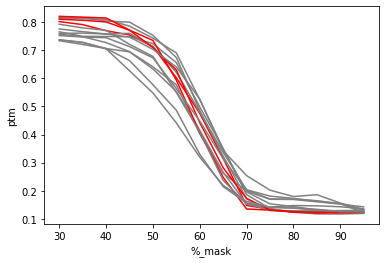

In [ ]:
sns.lineplot(data=dmean_TMB2_76, x=dmean_TMB2_76.index, y=dmean_TMB2_76.ptm, color="red")
sns.lineplot(data=dmean_TMB2_77, x=dmean_TMB2_77.index, y=dmean_TMB2_77.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_78, x=dmean_TMB2_78.index, y=dmean_TMB2_78.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_79, x=dmean_TMB2_79.index, y=dmean_TMB2_79.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_80, x=dmean_TMB2_80.index, y=dmean_TMB2_80.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_81, x=dmean_TMB2_81.index, y=dmean_TMB2_81.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_82, x=dmean_TMB2_82.index, y=dmean_TMB2_82.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_83, x=dmean_TMB2_83.index, y=dmean_TMB2_83.ptm, color="red")
sns.lineplot(data=dmean_TMB2_84, x=dmean_TMB2_84.index, y=dmean_TMB2_84.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_85, x=dmean_TMB2_85.index, y=dmean_TMB2_85.ptm, color="red")
sns.lineplot(data=dmean_TMB2_86, x=dmean_TMB2_86.index, y=dmean_TMB2_86.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_87, x=dmean_TMB2_87.index, y=dmean_TMB2_87.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_88, x=dmean_TMB2_88.index, y=dmean_TMB2_88.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_89, x=dmean_TMB2_89.index, y=dmean_TMB2_89.ptm, color="grey")
#sns.lineplot(data=dmean_TMB2_90, x=dmean_TMB2_90.index, y=dmean_TMB2_90.ptm, color="grey")

<AxesSubplot:xlabel='%_mask', ylabel='plDDT_backbone'>

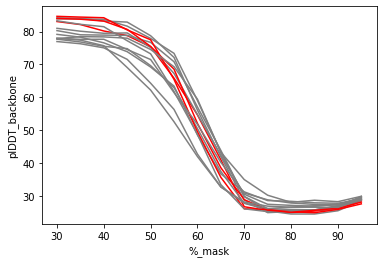

In [ ]:
sns.lineplot(data=dmean_TMB2_76, x=dmean_TMB2_76.index, y=dmean_TMB2_76.plDDT_backbone, color="red")
sns.lineplot(data=dmean_TMB2_77, x=dmean_TMB2_77.index, y=dmean_TMB2_77.plDDT_backbone, color="grey")
sns.lineplot(data=dmean_TMB2_78, x=dmean_TMB2_78.index, y=dmean_TMB2_78.plDDT_backbone, color="grey")
sns.lineplot(data=dmean_TMB2_79, x=dmean_TMB2_79.index, y=dmean_TMB2_79.plDDT_backbone, color="grey")
sns.lineplot(data=dmean_TMB2_80, x=dmean_TMB2_80.index, y=dmean_TMB2_80.plDDT_backbone, color="grey")
sns.lineplot(data=dmean_TMB2_81, x=dmean_TMB2_81.index, y=dmean_TMB2_81.plDDT_backbone, color="grey")
sns.lineplot(data=dmean_TMB2_82, x=dmean_TMB2_82.index, y=dmean_TMB2_82.plDDT_backbone, color="grey")
sns.lineplot(data=dmean_TMB2_83, x=dmean_TMB2_83.index, y=dmean_TMB2_83.plDDT_backbone, color="red")
sns.lineplot(data=dmean_TMB2_84, x=dmean_TMB2_84.index, y=dmean_TMB2_84.plDDT_backbone, color="grey")
sns.lineplot(data=dmean_TMB2_85, x=dmean_TMB2_85.index, y=dmean_TMB2_85.plDDT_backbone, color="red")
sns.lineplot(data=dmean_TMB2_86, x=dmean_TMB2_86.index, y=dmean_TMB2_86.plDDT_backbone, color="grey")
sns.lineplot(data=dmean_TMB2_87, x=dmean_TMB2_87.index, y=dmean_TMB2_87.plDDT_backbone, color="grey")
sns.lineplot(data=dmean_TMB2_88, x=dmean_TMB2_88.index, y=dmean_TMB2_88.plDDT_backbone, color="grey")
sns.lineplot(data=dmean_TMB2_89, x=dmean_TMB2_89.index, y=dmean_TMB2_89.plDDT_backbone, color="grey")
#sns.lineplot(data=dmean_TMB2_90, x=dmean_TMB2_90.index, y=dmean_TMB2_90.plDDT_backbone, color="grey")

<AxesSubplot:xlabel='%_mask', ylabel='ptm'>

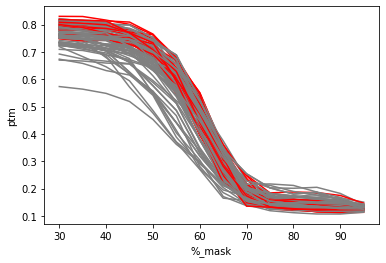

In [ ]:
sns.lineplot(data=dmean_TMB2_1, x=dmean_TMB2_1.index, y=dmean_TMB2_1.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_2, x=dmean_TMB2_2.index, y=dmean_TMB2_2.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_3, x=dmean_TMB2_3.index, y=dmean_TMB2_3.ptm, color="red")
sns.lineplot(data=dmean_TMB2_4, x=dmean_TMB2_4.index, y=dmean_TMB2_4.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_5, x=dmean_TMB2_5.index, y=dmean_TMB2_5.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_6, x=dmean_TMB2_6.index, y=dmean_TMB2_6.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_7, x=dmean_TMB2_7.index, y=dmean_TMB2_7.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_8, x=dmean_TMB2_8.index, y=dmean_TMB2_8.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_9, x=dmean_TMB2_9.index, y=dmean_TMB2_9.ptm, color="grey")
#sns.lineplot(data=dmean_TMB2_10, x=dmean_TMB2_10.index, y=dmean_TMB2_10.ptm, color="grey")
#sns.lineplot(data=dmean_TMB2_11, x=dmean_TMB2_11.index, y=dmean_TMB2_11.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_12, x=dmean_TMB2_12.index, y=dmean_TMB2_12.ptm, color="grey")
#sns.lineplot(data=dmean_TMB2_13, x=dmean_TMB2_13.index, y=dmean_TMB2_13.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_14, x=dmean_TMB2_14.index, y=dmean_TMB2_14.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_15, x=dmean_TMB2_15.index, y=dmean_TMB2_15.ptm, color="grey")
#sns.lineplot(data=dmean_TMB2_16, x=dmean_TMB2_16.index, y=dmean_TMB2_16.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_17, x=dmean_TMB2_17.index, y=dmean_TMB2_17.ptm, color="red")
sns.lineplot(data=dmean_TMB2_18, x=dmean_TMB2_18.index, y=dmean_TMB2_18.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_19, x=dmean_TMB2_19.index, y=dmean_TMB2_19.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_20, x=dmean_TMB2_20.index, y=dmean_TMB2_20.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_21, x=dmean_TMB2_21.index, y=dmean_TMB2_21.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_22, x=dmean_TMB2_22.index, y=dmean_TMB2_22.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_23, x=dmean_TMB2_23.index, y=dmean_TMB2_23.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_24, x=dmean_TMB2_24.index, y=dmean_TMB2_24.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_25, x=dmean_TMB2_25.index, y=dmean_TMB2_25.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_26, x=dmean_TMB2_26.index, y=dmean_TMB2_26.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_27, x=dmean_TMB2_27.index, y=dmean_TMB2_27.ptm, color="red")
sns.lineplot(data=dmean_TMB2_28, x=dmean_TMB2_28.index, y=dmean_TMB2_28.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_29, x=dmean_TMB2_29.index, y=dmean_TMB2_29.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_30, x=dmean_TMB2_30.index, y=dmean_TMB2_30.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_31, x=dmean_TMB2_31.index, y=dmean_TMB2_31.ptm, color="red")
sns.lineplot(data=dmean_TMB2_32, x=dmean_TMB2_32.index, y=dmean_TMB2_32.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_33, x=dmean_TMB2_33.index, y=dmean_TMB2_33.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_34, x=dmean_TMB2_34.index, y=dmean_TMB2_34.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_36, x=dmean_TMB2_36.index, y=dmean_TMB2_36.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_37, x=dmean_TMB2_37.index, y=dmean_TMB2_37.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_38, x=dmean_TMB2_38.index, y=dmean_TMB2_38.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_39, x=dmean_TMB2_39.index, y=dmean_TMB2_39.ptm, color="grey")
#sns.lineplot(data=dmean_TMB2_40, x=dmean_TMB2_40.index, y=dmean_TMB2_40.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_41, x=dmean_TMB2_41.index, y=dmean_TMB2_41.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_42, x=dmean_TMB2_42.index, y=dmean_TMB2_42.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_43, x=dmean_TMB2_43.index, y=dmean_TMB2_43.ptm, color="red")
sns.lineplot(data=dmean_TMB2_44, x=dmean_TMB2_44.index, y=dmean_TMB2_44.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_45, x=dmean_TMB2_45.index, y=dmean_TMB2_45.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_35, x=dmean_TMB2_35.index, y=dmean_TMB2_35.ptm, color="red")
#sns.lineplot(data=dmean_TMB2_46, x=dmean_TMB2_46.index, y=dmean_TMB2_46.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_47, x=dmean_TMB2_47.index, y=dmean_TMB2_47.ptm, color="red")
sns.lineplot(data=dmean_TMB2_48, x=dmean_TMB2_48.index, y=dmean_TMB2_48.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_49, x=dmean_TMB2_49.index, y=dmean_TMB2_49.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_50, x=dmean_TMB2_50.index, y=dmean_TMB2_50.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_51, x=dmean_TMB2_51.index, y=dmean_TMB2_51.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_52, x=dmean_TMB2_52.index, y=dmean_TMB2_52.ptm, color="grey")
#sns.lineplot(data=dmean_TMB2_53, x=dmean_TMB2_53.index, y=dmean_TMB2_53.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_54, x=dmean_TMB2_54.index, y=dmean_TMB2_54.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_55, x=dmean_TMB2_55.index, y=dmean_TMB2_55.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_56, x=dmean_TMB2_56.index, y=dmean_TMB2_56.ptm, color="red")
sns.lineplot(data=dmean_TMB2_57, x=dmean_TMB2_57.index, y=dmean_TMB2_57.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_58, x=dmean_TMB2_58.index, y=dmean_TMB2_58.ptm, color="red")
sns.lineplot(data=dmean_TMB2_59, x=dmean_TMB2_59.index, y=dmean_TMB2_59.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_60, x=dmean_TMB2_60.index, y=dmean_TMB2_60.ptm, color="grey")
#sns.lineplot(data=dmean_TMB2_61, x=dmean_TMB2_61.index, y=dmean_TMB2_61.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_62, x=dmean_TMB2_62.index, y=dmean_TMB2_62.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_63, x=dmean_TMB2_63.index, y=dmean_TMB2_63.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_64, x=dmean_TMB2_64.index, y=dmean_TMB2_64.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_65, x=dmean_TMB2_65.index, y=dmean_TMB2_65.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_66, x=dmean_TMB2_66.index, y=dmean_TMB2_66.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_67, x=dmean_TMB2_67.index, y=dmean_TMB2_67.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_68, x=dmean_TMB2_68.index, y=dmean_TMB2_68.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_69, x=dmean_TMB2_69.index, y=dmean_TMB2_69.ptm, color="red")
sns.lineplot(data=dmean_TMB2_70, x=dmean_TMB2_70.index, y=dmean_TMB2_70.ptm, color="red")
sns.lineplot(data=dmean_TMB2_71, x=dmean_TMB2_71.index, y=dmean_TMB2_71.ptm, color="red")
sns.lineplot(data=dmean_TMB2_72, x=dmean_TMB2_72.index, y=dmean_TMB2_72.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_73, x=dmean_TMB2_73.index, y=dmean_TMB2_73.ptm, color="red")
sns.lineplot(data=dmean_TMB2_74, x=dmean_TMB2_74.index, y=dmean_TMB2_74.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_75, x=dmean_TMB2_75.index, y=dmean_TMB2_75.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_76, x=dmean_TMB2_76.index, y=dmean_TMB2_76.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_77, x=dmean_TMB2_77.index, y=dmean_TMB2_77.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_78, x=dmean_TMB2_78.index, y=dmean_TMB2_78.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_79, x=dmean_TMB2_79.index, y=dmean_TMB2_79.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_80, x=dmean_TMB2_80.index, y=dmean_TMB2_80.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_81, x=dmean_TMB2_81.index, y=dmean_TMB2_81.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_82, x=dmean_TMB2_82.index, y=dmean_TMB2_82.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_83, x=dmean_TMB2_83.index, y=dmean_TMB2_83.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_84, x=dmean_TMB2_84.index, y=dmean_TMB2_84.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_85, x=dmean_TMB2_85.index, y=dmean_TMB2_85.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_86, x=dmean_TMB2_86.index, y=dmean_TMB2_86.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_87, x=dmean_TMB2_87.index, y=dmean_TMB2_87.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_88, x=dmean_TMB2_88.index, y=dmean_TMB2_88.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_89, x=dmean_TMB2_89.index, y=dmean_TMB2_89.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_90, x=dmean_TMB2_90.index, y=dmean_TMB2_90.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_76, x=dmean_TMB2_76.index, y=dmean_TMB2_76.ptm, color="red")
sns.lineplot(data=dmean_TMB2_77, x=dmean_TMB2_77.index, y=dmean_TMB2_77.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_78, x=dmean_TMB2_78.index, y=dmean_TMB2_78.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_79, x=dmean_TMB2_79.index, y=dmean_TMB2_79.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_80, x=dmean_TMB2_80.index, y=dmean_TMB2_80.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_81, x=dmean_TMB2_81.index, y=dmean_TMB2_81.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_82, x=dmean_TMB2_82.index, y=dmean_TMB2_82.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_83, x=dmean_TMB2_83.index, y=dmean_TMB2_83.ptm, color="red")
sns.lineplot(data=dmean_TMB2_84, x=dmean_TMB2_84.index, y=dmean_TMB2_84.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_85, x=dmean_TMB2_85.index, y=dmean_TMB2_85.ptm, color="red")
sns.lineplot(data=dmean_TMB2_86, x=dmean_TMB2_86.index, y=dmean_TMB2_86.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_87, x=dmean_TMB2_87.index, y=dmean_TMB2_87.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_88, x=dmean_TMB2_88.index, y=dmean_TMB2_88.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_89, x=dmean_TMB2_89.index, y=dmean_TMB2_89.ptm, color="grey")
#sns.lineplot(data=dmean_TMB2_90, x=dmean_TMB2_90.index, y=dmean_TMB2_90.ptm, color="grey")

<AxesSubplot:xlabel='%_mask', ylabel='plDDT_backbone'>

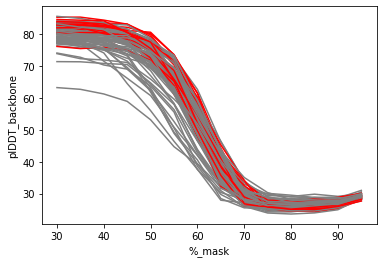

In [ ]:
sns.lineplot(data=dmean_TMB2_1, x=dmean_TMB2_1.index, y=dmean_TMB2_1.plDDT_backbone, color="grey")
sns.lineplot(data=dmean_TMB2_2, x=dmean_TMB2_2.index, y=dmean_TMB2_2.plDDT_backbone, color="grey")
sns.lineplot(data=dmean_TMB2_3, x=dmean_TMB2_3.index, y=dmean_TMB2_3.plDDT_backbone, color="red")
sns.lineplot(data=dmean_TMB2_4, x=dmean_TMB2_4.index, y=dmean_TMB2_4.plDDT_backbone, color="grey")
sns.lineplot(data=dmean_TMB2_5, x=dmean_TMB2_5.index, y=dmean_TMB2_5.plDDT_backbone, color="grey")
sns.lineplot(data=dmean_TMB2_6, x=dmean_TMB2_6.index, y=dmean_TMB2_6.plDDT_backbone, color="grey")
sns.lineplot(data=dmean_TMB2_7, x=dmean_TMB2_7.index, y=dmean_TMB2_7.plDDT_backbone, color="grey")
sns.lineplot(data=dmean_TMB2_8, x=dmean_TMB2_8.index, y=dmean_TMB2_8.plDDT_backbone, color="grey")
sns.lineplot(data=dmean_TMB2_9, x=dmean_TMB2_9.index, y=dmean_TMB2_9.plDDT_backbone, color="grey")
#sns.lineplot(data=dmean_TMB2_10, x=dmean_TMB2_10.index, y=dmean_TMB2_10.plDDT_backbone, color="grey")
#sns.lineplot(data=dmean_TMB2_11, x=dmean_TMB2_11.index, y=dmean_TMB2_11.plDDT_backbone, color="grey")
sns.lineplot(data=dmean_TMB2_12, x=dmean_TMB2_12.index, y=dmean_TMB2_12.plDDT_backbone, color="grey")
#sns.lineplot(data=dmean_TMB2_13, x=dmean_TMB2_13.index, y=dmean_TMB2_13.plDDT_backbone, color="grey")
sns.lineplot(data=dmean_TMB2_14, x=dmean_TMB2_14.index, y=dmean_TMB2_14.plDDT_backbone, color="grey")
sns.lineplot(data=dmean_TMB2_15, x=dmean_TMB2_15.index, y=dmean_TMB2_15.plDDT_backbone, color="grey")
#sns.lineplot(data=dmean_TMB2_16, x=dmean_TMB2_16.index, y=dmean_TMB2_16.plDDT_backbone, color="grey")
sns.lineplot(data=dmean_TMB2_17, x=dmean_TMB2_17.index, y=dmean_TMB2_17.plDDT_backbone, color="red")
sns.lineplot(data=dmean_TMB2_18, x=dmean_TMB2_18.index, y=dmean_TMB2_18.plDDT_backbone, color="grey")
sns.lineplot(data=dmean_TMB2_19, x=dmean_TMB2_19.index, y=dmean_TMB2_19.plDDT_backbone, color="grey")
sns.lineplot(data=dmean_TMB2_20, x=dmean_TMB2_20.index, y=dmean_TMB2_20.plDDT_backbone, color="grey")
sns.lineplot(data=dmean_TMB2_21, x=dmean_TMB2_21.index, y=dmean_TMB2_21.plDDT_backbone, color="grey")
sns.lineplot(data=dmean_TMB2_22, x=dmean_TMB2_22.index, y=dmean_TMB2_22.plDDT_backbone, color="grey")
sns.lineplot(data=dmean_TMB2_23, x=dmean_TMB2_23.index, y=dmean_TMB2_23.plDDT_backbone, color="grey")
sns.lineplot(data=dmean_TMB2_24, x=dmean_TMB2_24.index, y=dmean_TMB2_24.plDDT_backbone, color="grey")
sns.lineplot(data=dmean_TMB2_25, x=dmean_TMB2_25.index, y=dmean_TMB2_25.plDDT_backbone, color="grey")
#sns.lineplot(data=dmean_TMB2_26, x=dmean_TMB2_26.index, y=dmean_TMB2_26.plDDT_backbone, color="grey")
sns.lineplot(data=dmean_TMB2_27, x=dmean_TMB2_27.index, y=dmean_TMB2_27.plDDT_backbone, color="red")
sns.lineplot(data=dmean_TMB2_28, x=dmean_TMB2_28.index, y=dmean_TMB2_28.plDDT_backbone, color="grey")
sns.lineplot(data=dmean_TMB2_29, x=dmean_TMB2_29.index, y=dmean_TMB2_29.plDDT_backbone, color="grey")
sns.lineplot(data=dmean_TMB2_30, x=dmean_TMB2_30.index, y=dmean_TMB2_30.plDDT_backbone, color="grey")
sns.lineplot(data=dmean_TMB2_31, x=dmean_TMB2_31.index, y=dmean_TMB2_31.plDDT_backbone, color="red")
sns.lineplot(data=dmean_TMB2_32, x=dmean_TMB2_32.index, y=dmean_TMB2_32.plDDT_backbone, color="grey")
sns.lineplot(data=dmean_TMB2_33, x=dmean_TMB2_33.index, y=dmean_TMB2_33.plDDT_backbone, color="grey")
sns.lineplot(data=dmean_TMB2_34, x=dmean_TMB2_34.index, y=dmean_TMB2_34.plDDT_backbone, color="grey")
sns.lineplot(data=dmean_TMB2_36, x=dmean_TMB2_36.index, y=dmean_TMB2_36.plDDT_backbone, color="grey")
sns.lineplot(data=dmean_TMB2_37, x=dmean_TMB2_37.index, y=dmean_TMB2_37.plDDT_backbone, color="grey")
sns.lineplot(data=dmean_TMB2_38, x=dmean_TMB2_38.index, y=dmean_TMB2_38.plDDT_backbone, color="grey")
sns.lineplot(data=dmean_TMB2_39, x=dmean_TMB2_39.index, y=dmean_TMB2_39.plDDT_backbone, color="grey")
#sns.lineplot(data=dmean_TMB2_40, x=dmean_TMB2_40.index, y=dmean_TMB2_40.plDDT_backbone, color="grey")
sns.lineplot(data=dmean_TMB2_41, x=dmean_TMB2_41.index, y=dmean_TMB2_41.plDDT_backbone, color="grey")
sns.lineplot(data=dmean_TMB2_42, x=dmean_TMB2_42.index, y=dmean_TMB2_42.plDDT_backbone, color="grey")
sns.lineplot(data=dmean_TMB2_43, x=dmean_TMB2_43.index, y=dmean_TMB2_43.plDDT_backbone, color="red")
sns.lineplot(data=dmean_TMB2_44, x=dmean_TMB2_44.index, y=dmean_TMB2_44.plDDT_backbone, color="grey")
sns.lineplot(data=dmean_TMB2_45, x=dmean_TMB2_45.index, y=dmean_TMB2_45.plDDT_backbone, color="grey")
sns.lineplot(data=dmean_TMB2_35, x=dmean_TMB2_35.index, y=dmean_TMB2_35.plDDT_backbone, color="red")
#sns.lineplot(data=dmean_TMB2_46, x=dmean_TMB2_46.index, y=dmean_TMB2_46.plDDT_backbone, color="grey")
sns.lineplot(data=dmean_TMB2_47, x=dmean_TMB2_47.index, y=dmean_TMB2_47.plDDT_backbone, color="red")
sns.lineplot(data=dmean_TMB2_48, x=dmean_TMB2_48.index, y=dmean_TMB2_48.plDDT_backbone, color="grey")
sns.lineplot(data=dmean_TMB2_49, x=dmean_TMB2_49.index, y=dmean_TMB2_49.plDDT_backbone, color="grey")
sns.lineplot(data=dmean_TMB2_50, x=dmean_TMB2_50.index, y=dmean_TMB2_50.plDDT_backbone, color="grey")
sns.lineplot(data=dmean_TMB2_51, x=dmean_TMB2_51.index, y=dmean_TMB2_51.plDDT_backbone, color="grey")
sns.lineplot(data=dmean_TMB2_52, x=dmean_TMB2_52.index, y=dmean_TMB2_52.plDDT_backbone, color="grey")
#sns.lineplot(data=dmean_TMB2_53, x=dmean_TMB2_53.index, y=dmean_TMB2_53.plDDT_backbone, color="grey")
sns.lineplot(data=dmean_TMB2_54, x=dmean_TMB2_54.index, y=dmean_TMB2_54.plDDT_backbone, color="grey")
sns.lineplot(data=dmean_TMB2_55, x=dmean_TMB2_55.index, y=dmean_TMB2_55.plDDT_backbone, color="grey")
sns.lineplot(data=dmean_TMB2_56, x=dmean_TMB2_56.index, y=dmean_TMB2_56.plDDT_backbone, color="red")
sns.lineplot(data=dmean_TMB2_57, x=dmean_TMB2_57.index, y=dmean_TMB2_57.plDDT_backbone, color="grey")
sns.lineplot(data=dmean_TMB2_58, x=dmean_TMB2_58.index, y=dmean_TMB2_58.plDDT_backbone, color="red")
sns.lineplot(data=dmean_TMB2_59, x=dmean_TMB2_59.index, y=dmean_TMB2_59.plDDT_backbone, color="grey")
sns.lineplot(data=dmean_TMB2_60, x=dmean_TMB2_60.index, y=dmean_TMB2_60.plDDT_backbone, color="grey")
#sns.lineplot(data=dmean_TMB2_61, x=dmean_TMB2_61.index, y=dmean_TMB2_61.plDDT_backbone, color="grey")
sns.lineplot(data=dmean_TMB2_62, x=dmean_TMB2_62.index, y=dmean_TMB2_62.plDDT_backbone, color="grey")
sns.lineplot(data=dmean_TMB2_63, x=dmean_TMB2_63.index, y=dmean_TMB2_63.plDDT_backbone, color="grey")
sns.lineplot(data=dmean_TMB2_64, x=dmean_TMB2_64.index, y=dmean_TMB2_64.plDDT_backbone, color="grey")
sns.lineplot(data=dmean_TMB2_65, x=dmean_TMB2_65.index, y=dmean_TMB2_65.plDDT_backbone, color="grey")
sns.lineplot(data=dmean_TMB2_66, x=dmean_TMB2_66.index, y=dmean_TMB2_66.plDDT_backbone, color="grey")
sns.lineplot(data=dmean_TMB2_67, x=dmean_TMB2_67.index, y=dmean_TMB2_67.plDDT_backbone, color="grey")
sns.lineplot(data=dmean_TMB2_68, x=dmean_TMB2_68.index, y=dmean_TMB2_68.plDDT_backbone, color="grey")
sns.lineplot(data=dmean_TMB2_69, x=dmean_TMB2_69.index, y=dmean_TMB2_69.plDDT_backbone, color="red")
sns.lineplot(data=dmean_TMB2_70, x=dmean_TMB2_70.index, y=dmean_TMB2_70.plDDT_backbone, color="red")
sns.lineplot(data=dmean_TMB2_71, x=dmean_TMB2_71.index, y=dmean_TMB2_71.plDDT_backbone, color="red")
sns.lineplot(data=dmean_TMB2_72, x=dmean_TMB2_72.index, y=dmean_TMB2_72.plDDT_backbone, color="grey")
sns.lineplot(data=dmean_TMB2_73, x=dmean_TMB2_73.index, y=dmean_TMB2_73.plDDT_backbone, color="red")
sns.lineplot(data=dmean_TMB2_74, x=dmean_TMB2_74.index, y=dmean_TMB2_74.plDDT_backbone, color="grey")
sns.lineplot(data=dmean_TMB2_75, x=dmean_TMB2_75.index, y=dmean_TMB2_75.plDDT_backbone, color="grey")
sns.lineplot(data=dmean_TMB2_76, x=dmean_TMB2_76.index, y=dmean_TMB2_76.plDDT_backbone, color="red")
sns.lineplot(data=dmean_TMB2_77, x=dmean_TMB2_77.index, y=dmean_TMB2_77.plDDT_backbone, color="grey")
sns.lineplot(data=dmean_TMB2_78, x=dmean_TMB2_78.index, y=dmean_TMB2_78.plDDT_backbone, color="grey")
sns.lineplot(data=dmean_TMB2_79, x=dmean_TMB2_79.index, y=dmean_TMB2_79.plDDT_backbone, color="grey")
sns.lineplot(data=dmean_TMB2_80, x=dmean_TMB2_80.index, y=dmean_TMB2_80.plDDT_backbone, color="grey")
sns.lineplot(data=dmean_TMB2_81, x=dmean_TMB2_81.index, y=dmean_TMB2_81.plDDT_backbone, color="grey")
sns.lineplot(data=dmean_TMB2_82, x=dmean_TMB2_82.index, y=dmean_TMB2_82.plDDT_backbone, color="grey")
sns.lineplot(data=dmean_TMB2_83, x=dmean_TMB2_83.index, y=dmean_TMB2_83.plDDT_backbone, color="red")
sns.lineplot(data=dmean_TMB2_84, x=dmean_TMB2_84.index, y=dmean_TMB2_84.plDDT_backbone, color="grey")
sns.lineplot(data=dmean_TMB2_85, x=dmean_TMB2_85.index, y=dmean_TMB2_85.plDDT_backbone, color="red")
sns.lineplot(data=dmean_TMB2_86, x=dmean_TMB2_86.index, y=dmean_TMB2_86.plDDT_backbone, color="grey")
sns.lineplot(data=dmean_TMB2_87, x=dmean_TMB2_87.index, y=dmean_TMB2_87.plDDT_backbone, color="grey")
sns.lineplot(data=dmean_TMB2_88, x=dmean_TMB2_88.index, y=dmean_TMB2_88.plDDT_backbone, color="grey")
sns.lineplot(data=dmean_TMB2_89, x=dmean_TMB2_89.index, y=dmean_TMB2_89.plDDT_backbone, color="grey")
#sns.lineplot(data=dmean_TMB2_90, x=dmean_TMB2_90.index, y=dmean_TMB2_90.plDDT_backbone, color="grey")

In [ ]:
dmean_HBI_b_1 = dHBI_b_1.groupby(level=0).mean()
dmean_HBI_b_2 = dHBI_b_2.groupby(level=0).mean()
dmean_HBI_b_3 = dHBI_b_3.groupby(level=0).mean()
dmean_HBI_b_4 = dHBI_b_4.groupby(level=0).mean()
#dmean_HBI_b_5 = dHBI_b_5.groupby(level=0).mean()
#dmean_HBI_b_6 = dHBI_b_6.groupby(level=0).mean()
dmean_HBI_b_7 = dHBI_b_7.groupby(level=0).mean()
dmean_HBI_b_8 = dHBI_b_8.groupby(level=0).mean()
dmean_HBI_b_9 = dHBI_b_9.groupby(level=0).mean()
#dmean_HBI_b_10 = dHBI_b_10.groupby(level=0).mean()
#dmean_HBI_b_11 = dHBI_b_11.groupby(level=0).mean()
#dmean_HBI_b_12 = dHBI_b_12.groupby(level=0).mean()
dmean_HBI_b_13 = dHBI_b_13.groupby(level=0).mean()
dmean_HBI_b_14 = dHBI_b_14.groupby(level=0).mean()
dmean_HBI_b_15 = dHBI_b_15.groupby(level=0).mean()
dmean_HBI_b_16 = dHBI_b_16.groupby(level=0).mean()
dmean_HBI_b_17 = dHBI_b_17.groupby(level=0).mean()
#dmean_HBI_b_18 = dHBI_b_18.groupby(level=0).mean()
dmean_HBI_b_19 = dHBI_b_19.groupby(level=0).mean()
dmean_HBI_b_20 = dHBI_b_20.groupby(level=0).mean()
dmean_HBI_b_21 = dHBI_b_21.groupby(level=0).mean()
dmean_HBI_b_22 = dHBI_b_22.groupby(level=0).mean()
dmean_HBI_b_23 = dHBI_b_23.groupby(level=0).mean()
#dmean_HBI_b_24 = dHBI_b_24.groupby(level=0).mean()
dmean_HBI_b_25 = dHBI_b_25.groupby(level=0).mean()
dmean_HBI_b_26 = dHBI_b_26.groupby(level=0).mean()
dmean_HBI_b_27 = dHBI_b_27.groupby(level=0).mean()
dmean_HBI_b_28 = dHBI_b_28.groupby(level=0).mean()
dmean_HBI_b_29 = dHBI_b_29.groupby(level=0).mean()
#dmean_HBI_b_30 = dHBI_b_30.groupby(level=0).mean()
dmean_HBI_b_31 = dHBI_b_31.groupby(level=0).mean()
dmean_HBI_b_32 = dHBI_b_32.groupby(level=0).mean()
dmean_HBI_b_33 = dHBI_b_33.groupby(level=0).mean()
dmean_HBI_b_34 = dHBI_b_34.groupby(level=0).mean()
dmean_HBI_b_35 = dHBI_b_35.groupby(level=0).mean()
#dmean_HBI_b_36 = dHBI_b_36.groupby(level=0).mean()
dmean_HBI_b_37 = dHBI_b_37.groupby(level=0).mean()
dmean_HBI_b_38 = dHBI_b_38.groupby(level=0).mean()
dmean_HBI_b_39 = dHBI_b_39.groupby(level=0).mean()
dmean_HBI_b_40 = dHBI_b_40.groupby(level=0).mean()
dmean_HBI_b_41 = dHBI_b_41.groupby(level=0).mean()
#dmean_HBI_b_42 = dHBI_b_42.groupby(level=0).mean()
dmean_HBI_b_43 = dHBI_b_43.groupby(level=0).mean()
dmean_HBI_b_44 = dHBI_b_44.groupby(level=0).mean()
dmean_HBI_b_45 = dHBI_b_45.groupby(level=0).mean()
dmean_HBI_b_46 = dHBI_b_46.groupby(level=0).mean()
#dmean_HBI_b_47 = dHBI_b_47.groupby(level=0).mean()
#dmean_HBI_b_48 = dHBI_b_48.groupby(level=0).mean()
dmean_HBI_b_49 = dHBI_b_49.groupby(level=0).mean()
dmean_HBI_b_50 = dHBI_b_50.groupby(level=0).mean()
#dmean_HBI_b_51 = dHBI_b_51.groupby(level=0).mean()
#dmean_HBI_b_52 = dHBI_b_52.groupby(level=0).mean()
dmean_HBI_b_53 = dHBI_b_53.groupby(level=0).mean()
#dmean_HBI_b_54 = dHBI_b_54.groupby(level=0).mean()
dmean_HBI_b_55 = dHBI_b_55.groupby(level=0).mean()
dmean_HBI_b_56 = dHBI_b_56.groupby(level=0).mean()

In [ ]:
# Specify the destination directory
destination_directory = "/content/google_drive/MyDrive/AF_vs_ESMF/ESMFold_masking/soluble/1a_all_csv_succ_rate"
# Loop through the dataframe names
for num in range(1, 91):
    # Generate the dataframe name
    dataframe_name = f'dmean_HBI_b_{num}'
    print(dataframe_name)
    # Check if the dataframe exists
    if dataframe_name in globals():
        # Get the dataframe by its variable name
        df = globals()[dataframe_name]

        # Generate the filename
        filename = f'{dataframe_name}.csv'

        # Create the full file path
        file_path = os.path.join(destination_directory, filename)

        # Save the dataframe as CSV
        df.to_csv(file_path)

dmean_HBI_b_1
dmean_HBI_b_2
dmean_HBI_b_3
dmean_HBI_b_4
dmean_HBI_b_5
dmean_HBI_b_6
dmean_HBI_b_7
dmean_HBI_b_8
dmean_HBI_b_9
dmean_HBI_b_10
dmean_HBI_b_11
dmean_HBI_b_12
dmean_HBI_b_13
dmean_HBI_b_14
dmean_HBI_b_15
dmean_HBI_b_16
dmean_HBI_b_17
dmean_HBI_b_18
dmean_HBI_b_19
dmean_HBI_b_20
dmean_HBI_b_21
dmean_HBI_b_22
dmean_HBI_b_23
dmean_HBI_b_24
dmean_HBI_b_25
dmean_HBI_b_26
dmean_HBI_b_27
dmean_HBI_b_28
dmean_HBI_b_29
dmean_HBI_b_30
dmean_HBI_b_31
dmean_HBI_b_32
dmean_HBI_b_33
dmean_HBI_b_34
dmean_HBI_b_35
dmean_HBI_b_36
dmean_HBI_b_37
dmean_HBI_b_38
dmean_HBI_b_39
dmean_HBI_b_40
dmean_HBI_b_41
dmean_HBI_b_42
dmean_HBI_b_43
dmean_HBI_b_44
dmean_HBI_b_45
dmean_HBI_b_46
dmean_HBI_b_47
dmean_HBI_b_48
dmean_HBI_b_49
dmean_HBI_b_50
dmean_HBI_b_51
dmean_HBI_b_52
dmean_HBI_b_53
dmean_HBI_b_54
dmean_HBI_b_55
dmean_HBI_b_56
dmean_HBI_b_57
dmean_HBI_b_58
dmean_HBI_b_59
dmean_HBI_b_60
dmean_HBI_b_61
dmean_HBI_b_62
dmean_HBI_b_63
dmean_HBI_b_64
dmean_HBI_b_65
dmean_HBI_b_66
dmean_HBI_b_67
dmea

<AxesSubplot:xlabel='%_mask', ylabel='ptm'>

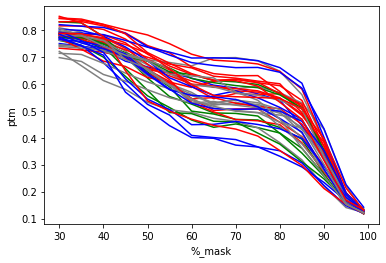

In [ ]:
sns.lineplot(data=dmean_HBI_b_1, x=dmean_HBI_b_1.index, y=dmean_HBI_b_1.ptm, color="grey")
sns.lineplot(data=dmean_HBI_b_2, x=dmean_HBI_b_2.index, y=dmean_HBI_b_2.ptm, color="green")
sns.lineplot(data=dmean_HBI_b_3, x=dmean_HBI_b_3.index, y=dmean_HBI_b_3.ptm, color="grey")
sns.lineplot(data=dmean_HBI_b_4, x=dmean_HBI_b_4.index, y=dmean_HBI_b_4.ptm, color="grey")
#sns.lineplot(data=dmean_HBI_b_5, x=dmean_HBI_b_5.index, y=dmean_HBI_b_5.ptm, color="grey")
#sns.lineplot(data=dmean_HBI_b_6, x=dmean_HBI_b_6.index, y=dmean_HBI_b_6.ptm, color="grey")
sns.lineplot(data=dmean_HBI_b_7, x=dmean_HBI_b_7.index, y=dmean_HBI_b_7.ptm, color="red")
sns.lineplot(data=dmean_HBI_b_8, x=dmean_HBI_b_8.index, y=dmean_HBI_b_8.ptm, color="grey")
sns.lineplot(data=dmean_HBI_b_9, x=dmean_HBI_b_9.index, y=dmean_HBI_b_9.ptm, color="blue")
#sns.lineplot(data=dmean_HBI_b_10, x=dmean_HBI_b_10.index, y=dmean_HBI_b_10.ptm, color="red")
#sns.lineplot(data=dmean_HBI_b_11, x=dmean_HBI_b_11.index, y=dmean_HBI_b_11.ptm, color="grey")
#sns.lineplot(data=dmean_HBI_b_12, x=dmean_HBI_b_12.index, y=dmean_HBI_b_12.ptm, color="grey")
sns.lineplot(data=dmean_HBI_b_13, x=dmean_HBI_b_13.index, y=dmean_HBI_b_13.ptm, color="grey")
sns.lineplot(data=dmean_HBI_b_14, x=dmean_HBI_b_14.index, y=dmean_HBI_b_14.ptm, color="red")
sns.lineplot(data=dmean_HBI_b_15, x=dmean_HBI_b_15.index, y=dmean_HBI_b_15.ptm, color="red")
sns.lineplot(data=dmean_HBI_b_16, x=dmean_HBI_b_16.index, y=dmean_HBI_b_16.ptm, color="green")
sns.lineplot(data=dmean_HBI_b_17, x=dmean_HBI_b_17.index, y=dmean_HBI_b_17.ptm, color="green")
#sns.lineplot(data=dmean_HBI_b_18, x=dmean_HBI_b_18.index, y=dmean_HBI_b_18.ptm, color="grey")
sns.lineplot(data=dmean_HBI_b_19, x=dmean_HBI_b_19.index, y=dmean_HBI_b_19.ptm, color="red")
sns.lineplot(data=dmean_HBI_b_20, x=dmean_HBI_b_20.index, y=dmean_HBI_b_20.ptm, color="green")

sns.lineplot(data=dmean_HBI_b_21, x=dmean_HBI_b_21.index, y=dmean_HBI_b_21.ptm, color="red")
sns.lineplot(data=dmean_HBI_b_22, x=dmean_HBI_b_22.index, y=dmean_HBI_b_22.ptm, color="red")
sns.lineplot(data=dmean_HBI_b_23, x=dmean_HBI_b_23.index, y=dmean_HBI_b_23.ptm, color="green")
#sns.lineplot(data=dmean_HBI_b_24, x=dmean_HBI_b_24.index, y=dmean_HBI_b_24.ptm, color="grey")
sns.lineplot(data=dmean_HBI_b_25, x=dmean_HBI_b_25.index, y=dmean_HBI_b_25.ptm, color="grey")
sns.lineplot(data=dmean_HBI_b_26, x=dmean_HBI_b_26.index, y=dmean_HBI_b_26.ptm, color="red")
sns.lineplot(data=dmean_HBI_b_27, x=dmean_HBI_b_27.index, y=dmean_HBI_b_27.ptm, color="red")
sns.lineplot(data=dmean_HBI_b_28, x=dmean_HBI_b_28.index, y=dmean_HBI_b_28.ptm, color="green")
sns.lineplot(data=dmean_HBI_b_29, x=dmean_HBI_b_29.index, y=dmean_HBI_b_29.ptm, color="blue")
#sns.lineplot(data=dmean_HBI_b_30, x=dmean_HBI_b_30.index, y=dmean_HBI_b_30.ptm, color="red")
sns.lineplot(data=dmean_HBI_b_31, x=dmean_HBI_b_31.index, y=dmean_HBI_b_31.ptm, color="grey")
sns.lineplot(data=dmean_HBI_b_32, x=dmean_HBI_b_32.index, y=dmean_HBI_b_32.ptm, color="red")
sns.lineplot(data=dmean_HBI_b_33, x=dmean_HBI_b_33.index, y=dmean_HBI_b_33.ptm, color="red")
sns.lineplot(data=dmean_HBI_b_34, x=dmean_HBI_b_34.index, y=dmean_HBI_b_34.ptm, color="red")
sns.lineplot(data=dmean_HBI_b_35, x=dmean_HBI_b_35.index, y=dmean_HBI_b_35.ptm, color="grey")
#sns.lineplot(data=dmean_HBI_b_36, x=dmean_HBI_b_36.index, y=dmean_HBI_b_36.ptm, color="grey")
sns.lineplot(data=dmean_HBI_b_37, x=dmean_HBI_b_37.index, y=dmean_HBI_b_37.ptm, color="blue")
sns.lineplot(data=dmean_HBI_b_38, x=dmean_HBI_b_38.index, y=dmean_HBI_b_38.ptm, color="grey")
sns.lineplot(data=dmean_HBI_b_39, x=dmean_HBI_b_39.index, y=dmean_HBI_b_39.ptm, color="blue")
sns.lineplot(data=dmean_HBI_b_40, x=dmean_HBI_b_40.index, y=dmean_HBI_b_40.ptm, color="grey")

sns.lineplot(data=dmean_HBI_b_41, x=dmean_HBI_b_41.index, y=dmean_HBI_b_41.ptm, color="blue")
#sns.lineplot(data=dmean_HBI_b_42, x=dmean_HBI_b_42.index, y=dmean_HBI_b_42.ptm, color="grey")
sns.lineplot(data=dmean_HBI_b_43, x=dmean_HBI_b_43.index, y=dmean_HBI_b_43.ptm, color="blue")
sns.lineplot(data=dmean_HBI_b_44, x=dmean_HBI_b_44.index, y=dmean_HBI_b_44.ptm, color="blue")
sns.lineplot(data=dmean_HBI_b_45, x=dmean_HBI_b_45.index, y=dmean_HBI_b_45.ptm, color="blue")
sns.lineplot(data=dmean_HBI_b_46, x=dmean_HBI_b_46.index, y=dmean_HBI_b_46.ptm, color="blue")
#sns.lineplot(data=dmean_HBI_b_47, x=dmean_HBI_b_47.index, y=dmean_HBI_b_47.ptm, color="red")
#sns.lineplot(data=dmean_HBI_b_48, x=dmean_HBI_b_48.index, y=dmean_HBI_b_48.ptm, color="grey")
sns.lineplot(data=dmean_HBI_b_49, x=dmean_HBI_b_49.index, y=dmean_HBI_b_49.ptm, color="red")
sns.lineplot(data=dmean_HBI_b_50, x=dmean_HBI_b_50.index, y=dmean_HBI_b_50.ptm, color="red")
#sns.lineplot(data=dmean_HBI_b_51, x=dmean_HBI_b_51.index, y=dmean_HBI_b_51.ptm, color="grey")
#sns.lineplot(data=dmean_HBI_b_52, x=dmean_HBI_b_52.index, y=dmean_HBI_b_52.ptm, color="grey")
sns.lineplot(data=dmean_HBI_b_53, x=dmean_HBI_b_53.index, y=dmean_HBI_b_53.ptm, color="grey")
#sns.lineplot(data=dmean_HBI_b_54, x=dmean_HBI_b_54.index, y=dmean_HBI_b_54.ptm, color="red")
sns.lineplot(data=dmean_HBI_b_55, x=dmean_HBI_b_55.index, y=dmean_HBI_b_55.ptm, color="grey")
sns.lineplot(data=dmean_HBI_b_56, x=dmean_HBI_b_56.index, y=dmean_HBI_b_56.ptm, color="red")


<AxesSubplot:xlabel='%_mask', ylabel='plDDT_backbone'>

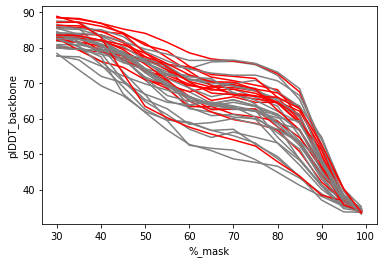

In [ ]:
sns.lineplot(data=dmean_HBI_b_1, x=dmean_HBI_b_1.index, y=dmean_HBI_b_1.plDDT_backbone, color="grey")
sns.lineplot(data=dmean_HBI_b_2, x=dmean_HBI_b_2.index, y=dmean_HBI_b_2.plDDT_backbone, color="grey")
sns.lineplot(data=dmean_HBI_b_3, x=dmean_HBI_b_3.index, y=dmean_HBI_b_3.plDDT_backbone, color="grey")
sns.lineplot(data=dmean_HBI_b_4, x=dmean_HBI_b_4.index, y=dmean_HBI_b_4.plDDT_backbone, color="grey")
#sns.lineplot(data=dmean_HBI_b_5, x=dmean_HBI_b_5.index, y=dmean_HBI_b_5.plDDT_backbone, color="grey")
#sns.lineplot(data=dmean_HBI_b_6, x=dmean_HBI_b_6.index, y=dmean_HBI_b_6.plDDT_backbone, color="grey")
sns.lineplot(data=dmean_HBI_b_7, x=dmean_HBI_b_7.index, y=dmean_HBI_b_7.plDDT_backbone, color="red")
sns.lineplot(data=dmean_HBI_b_8, x=dmean_HBI_b_8.index, y=dmean_HBI_b_8.plDDT_backbone, color="grey")
sns.lineplot(data=dmean_HBI_b_9, x=dmean_HBI_b_9.index, y=dmean_HBI_b_9.plDDT_backbone, color="grey")
sns.lineplot(data=dmean_HBI_b_10, x=dmean_HBI_b_10.index, y=dmean_HBI_b_10.plDDT_backbone, color="red")
#sns.lineplot(data=dmean_HBI_b_11, x=dmean_HBI_b_11.index, y=dmean_HBI_b_11.plDDT_backbone, color="grey")
#sns.lineplot(data=dmean_HBI_b_12, x=dmean_HBI_b_12.index, y=dmean_HBI_b_12.plDDT_backbone, color="grey")
sns.lineplot(data=dmean_HBI_b_13, x=dmean_HBI_b_13.index, y=dmean_HBI_b_13.plDDT_backbone, color="grey")
sns.lineplot(data=dmean_HBI_b_14, x=dmean_HBI_b_14.index, y=dmean_HBI_b_14.plDDT_backbone, color="red")
sns.lineplot(data=dmean_HBI_b_15, x=dmean_HBI_b_15.index, y=dmean_HBI_b_15.plDDT_backbone, color="red")
sns.lineplot(data=dmean_HBI_b_16, x=dmean_HBI_b_16.index, y=dmean_HBI_b_16.plDDT_backbone, color="grey")
sns.lineplot(data=dmean_HBI_b_17, x=dmean_HBI_b_17.index, y=dmean_HBI_b_17.plDDT_backbone, color="grey")
#sns.lineplot(data=dmean_HBI_b_18, x=dmean_HBI_b_18.index, y=dmean_HBI_b_18.plDDT_backbone, color="grey")
sns.lineplot(data=dmean_HBI_b_19, x=dmean_HBI_b_19.index, y=dmean_HBI_b_19.plDDT_backbone, color="red")
sns.lineplot(data=dmean_HBI_b_20, x=dmean_HBI_b_20.index, y=dmean_HBI_b_20.plDDT_backbone, color="grey")

sns.lineplot(data=dmean_HBI_b_21, x=dmean_HBI_b_21.index, y=dmean_HBI_b_21.plDDT_backbone, color="red")
sns.lineplot(data=dmean_HBI_b_22, x=dmean_HBI_b_22.index, y=dmean_HBI_b_22.plDDT_backbone, color="red")
sns.lineplot(data=dmean_HBI_b_23, x=dmean_HBI_b_23.index, y=dmean_HBI_b_23.plDDT_backbone, color="grey")
#sns.lineplot(data=dmean_HBI_b_24, x=dmean_HBI_b_24.index, y=dmean_HBI_b_24.plDDT_backbone, color="grey")
sns.lineplot(data=dmean_HBI_b_25, x=dmean_HBI_b_25.index, y=dmean_HBI_b_25.plDDT_backbone, color="grey")
sns.lineplot(data=dmean_HBI_b_26, x=dmean_HBI_b_26.index, y=dmean_HBI_b_26.plDDT_backbone, color="red")
sns.lineplot(data=dmean_HBI_b_27, x=dmean_HBI_b_27.index, y=dmean_HBI_b_27.plDDT_backbone, color="red")
sns.lineplot(data=dmean_HBI_b_28, x=dmean_HBI_b_28.index, y=dmean_HBI_b_28.plDDT_backbone, color="grey")
sns.lineplot(data=dmean_HBI_b_29, x=dmean_HBI_b_29.index, y=dmean_HBI_b_29.plDDT_backbone, color="grey")
#sns.lineplot(data=dmean_HBI_b_30, x=dmean_HBI_b_30.index, y=dmean_HBI_b_30.plDDT_backbone, color="red")
sns.lineplot(data=dmean_HBI_b_31, x=dmean_HBI_b_31.index, y=dmean_HBI_b_31.plDDT_backbone, color="grey")
sns.lineplot(data=dmean_HBI_b_32, x=dmean_HBI_b_32.index, y=dmean_HBI_b_32.plDDT_backbone, color="red")
sns.lineplot(data=dmean_HBI_b_33, x=dmean_HBI_b_33.index, y=dmean_HBI_b_33.plDDT_backbone, color="red")
sns.lineplot(data=dmean_HBI_b_34, x=dmean_HBI_b_34.index, y=dmean_HBI_b_34.plDDT_backbone, color="red")
sns.lineplot(data=dmean_HBI_b_35, x=dmean_HBI_b_35.index, y=dmean_HBI_b_35.plDDT_backbone, color="grey")
#sns.lineplot(data=dmean_HBI_b_36, x=dmean_HBI_b_36.index, y=dmean_HBI_b_36.plDDT_backbone, color="grey")
sns.lineplot(data=dmean_HBI_b_37, x=dmean_HBI_b_37.index, y=dmean_HBI_b_37.plDDT_backbone, color="grey")
sns.lineplot(data=dmean_HBI_b_38, x=dmean_HBI_b_38.index, y=dmean_HBI_b_38.plDDT_backbone, color="grey")
sns.lineplot(data=dmean_HBI_b_39, x=dmean_HBI_b_39.index, y=dmean_HBI_b_39.plDDT_backbone, color="grey")
sns.lineplot(data=dmean_HBI_b_40, x=dmean_HBI_b_40.index, y=dmean_HBI_b_40.plDDT_backbone, color="grey")

sns.lineplot(data=dmean_HBI_b_41, x=dmean_HBI_b_41.index, y=dmean_HBI_b_41.plDDT_backbone, color="grey")
#sns.lineplot(data=dmean_HBI_b_42, x=dmean_HBI_b_42.index, y=dmean_HBI_b_42.plDDT_backbone, color="grey")
sns.lineplot(data=dmean_HBI_b_43, x=dmean_HBI_b_43.index, y=dmean_HBI_b_43.plDDT_backbone, color="grey")
sns.lineplot(data=dmean_HBI_b_44, x=dmean_HBI_b_44.index, y=dmean_HBI_b_44.plDDT_backbone, color="grey")
sns.lineplot(data=dmean_HBI_b_45, x=dmean_HBI_b_45.index, y=dmean_HBI_b_45.plDDT_backbone, color="grey")
sns.lineplot(data=dmean_HBI_b_46, x=dmean_HBI_b_46.index, y=dmean_HBI_b_46.plDDT_backbone, color="grey")
#sns.lineplot(data=dmean_HBI_b_47, x=dmean_HBI_b_47.index, y=dmean_HBI_b_47.plDDT_backbone, color="red")
#sns.lineplot(data=dmean_HBI_b_48, x=dmean_HBI_b_48.index, y=dmean_HBI_b_48.plDDT_backbone, color="grey")
sns.lineplot(data=dmean_HBI_b_49, x=dmean_HBI_b_49.index, y=dmean_HBI_b_49.plDDT_backbone, color="red")
sns.lineplot(data=dmean_HBI_b_50, x=dmean_HBI_b_50.index, y=dmean_HBI_b_50.plDDT_backbone, color="red")
#sns.lineplot(data=dmean_HBI_b_51, x=dmean_HBI_b_51.index, y=dmean_HBI_b_51.plDDT_backbone, color="grey")
#sns.lineplot(data=dmean_HBI_b_52, x=dmean_HBI_b_52.index, y=dmean_HBI_b_52.plDDT_backbone, color="grey")
sns.lineplot(data=dmean_HBI_b_53, x=dmean_HBI_b_53.index, y=dmean_HBI_b_53.plDDT_backbone, color="grey")
#sns.lineplot(data=dmean_HBI_b_54, x=dmean_HBI_b_54.index, y=dmean_HBI_b_54.plDDT_backbone, color="red")
sns.lineplot(data=dmean_HBI_b_55, x=dmean_HBI_b_55.index, y=dmean_HBI_b_55.plDDT_backbone, color="grey")
sns.lineplot(data=dmean_HBI_b_56, x=dmean_HBI_b_56.index, y=dmean_HBI_b_56.plDDT_backbone, color="red")


<AxesSubplot:xlabel='%_mask', ylabel='tmscore'>

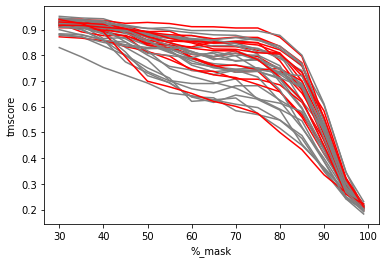

In [ ]:
sns.lineplot(data=dmean_HBI_b_1, x=dmean_HBI_b_1.index, y=dmean_HBI_b_1.tmscore, color="grey")
sns.lineplot(data=dmean_HBI_b_2, x=dmean_HBI_b_2.index, y=dmean_HBI_b_2.tmscore, color="grey")
sns.lineplot(data=dmean_HBI_b_3, x=dmean_HBI_b_3.index, y=dmean_HBI_b_3.tmscore, color="grey")
sns.lineplot(data=dmean_HBI_b_4, x=dmean_HBI_b_4.index, y=dmean_HBI_b_4.tmscore, color="grey")
#sns.lineplot(data=dmean_HBI_b_5, x=dmean_HBI_b_5.index, y=dmean_HBI_b_5.tmscore, color="grey")
#sns.lineplot(data=dmean_HBI_b_6, x=dmean_HBI_b_6.index, y=dmean_HBI_b_6.tmscore, color="grey")
sns.lineplot(data=dmean_HBI_b_7, x=dmean_HBI_b_7.index, y=dmean_HBI_b_7.tmscore, color="red")
sns.lineplot(data=dmean_HBI_b_8, x=dmean_HBI_b_8.index, y=dmean_HBI_b_8.tmscore, color="grey")
sns.lineplot(data=dmean_HBI_b_9, x=dmean_HBI_b_9.index, y=dmean_HBI_b_9.tmscore, color="grey")
#sns.lineplot(data=dmean_HBI_b_10, x=dmean_HBI_b_10.index, y=dmean_HBI_b_10.tmscore, color="red")
#sns.lineplot(data=dmean_HBI_b_11, x=dmean_HBI_b_11.index, y=dmean_HBI_b_11.tmscore, color="grey")
#sns.lineplot(data=dmean_HBI_b_12, x=dmean_HBI_b_12.index, y=dmean_HBI_b_12.tmscore, color="grey")
sns.lineplot(data=dmean_HBI_b_13, x=dmean_HBI_b_13.index, y=dmean_HBI_b_13.tmscore, color="grey")
sns.lineplot(data=dmean_HBI_b_14, x=dmean_HBI_b_14.index, y=dmean_HBI_b_14.tmscore, color="red")
sns.lineplot(data=dmean_HBI_b_15, x=dmean_HBI_b_15.index, y=dmean_HBI_b_15.tmscore, color="red")
sns.lineplot(data=dmean_HBI_b_16, x=dmean_HBI_b_16.index, y=dmean_HBI_b_16.tmscore, color="grey")
sns.lineplot(data=dmean_HBI_b_17, x=dmean_HBI_b_17.index, y=dmean_HBI_b_17.tmscore, color="grey")
#sns.lineplot(data=dmean_HBI_b_18, x=dmean_HBI_b_18.index, y=dmean_HBI_b_18.tmscore, color="grey")
sns.lineplot(data=dmean_HBI_b_19, x=dmean_HBI_b_19.index, y=dmean_HBI_b_19.tmscore, color="red")
sns.lineplot(data=dmean_HBI_b_20, x=dmean_HBI_b_20.index, y=dmean_HBI_b_20.tmscore, color="grey")

sns.lineplot(data=dmean_HBI_b_21, x=dmean_HBI_b_21.index, y=dmean_HBI_b_21.tmscore, color="red")
sns.lineplot(data=dmean_HBI_b_22, x=dmean_HBI_b_22.index, y=dmean_HBI_b_22.tmscore, color="red")
sns.lineplot(data=dmean_HBI_b_23, x=dmean_HBI_b_23.index, y=dmean_HBI_b_23.tmscore, color="grey")
#sns.lineplot(data=dmean_HBI_b_24, x=dmean_HBI_b_24.index, y=dmean_HBI_b_24.tmscore, color="grey")
sns.lineplot(data=dmean_HBI_b_25, x=dmean_HBI_b_25.index, y=dmean_HBI_b_25.tmscore, color="grey")
sns.lineplot(data=dmean_HBI_b_26, x=dmean_HBI_b_26.index, y=dmean_HBI_b_26.tmscore, color="red")
sns.lineplot(data=dmean_HBI_b_27, x=dmean_HBI_b_27.index, y=dmean_HBI_b_27.tmscore, color="red")
sns.lineplot(data=dmean_HBI_b_28, x=dmean_HBI_b_28.index, y=dmean_HBI_b_28.tmscore, color="grey")
sns.lineplot(data=dmean_HBI_b_29, x=dmean_HBI_b_29.index, y=dmean_HBI_b_29.tmscore, color="grey")
#sns.lineplot(data=dmean_HBI_b_30, x=dmean_HBI_b_30.index, y=dmean_HBI_b_30.tmscore, color="red")
sns.lineplot(data=dmean_HBI_b_31, x=dmean_HBI_b_31.index, y=dmean_HBI_b_31.tmscore, color="grey")
sns.lineplot(data=dmean_HBI_b_32, x=dmean_HBI_b_32.index, y=dmean_HBI_b_32.tmscore, color="red")
sns.lineplot(data=dmean_HBI_b_33, x=dmean_HBI_b_33.index, y=dmean_HBI_b_33.tmscore, color="red")
sns.lineplot(data=dmean_HBI_b_34, x=dmean_HBI_b_34.index, y=dmean_HBI_b_34.tmscore, color="red")
sns.lineplot(data=dmean_HBI_b_35, x=dmean_HBI_b_35.index, y=dmean_HBI_b_35.tmscore, color="grey")
#sns.lineplot(data=dmean_HBI_b_36, x=dmean_HBI_b_36.index, y=dmean_HBI_b_36.tmscore, color="grey")
sns.lineplot(data=dmean_HBI_b_37, x=dmean_HBI_b_37.index, y=dmean_HBI_b_37.tmscore, color="grey")
sns.lineplot(data=dmean_HBI_b_38, x=dmean_HBI_b_38.index, y=dmean_HBI_b_38.tmscore, color="grey")
sns.lineplot(data=dmean_HBI_b_39, x=dmean_HBI_b_39.index, y=dmean_HBI_b_39.tmscore, color="grey")
sns.lineplot(data=dmean_HBI_b_40, x=dmean_HBI_b_40.index, y=dmean_HBI_b_40.tmscore, color="grey")

sns.lineplot(data=dmean_HBI_b_41, x=dmean_HBI_b_41.index, y=dmean_HBI_b_41.tmscore, color="grey")
#sns.lineplot(data=dmean_HBI_b_42, x=dmean_HBI_b_42.index, y=dmean_HBI_b_42.tmscore, color="grey")
sns.lineplot(data=dmean_HBI_b_43, x=dmean_HBI_b_43.index, y=dmean_HBI_b_43.tmscore, color="grey")
sns.lineplot(data=dmean_HBI_b_44, x=dmean_HBI_b_44.index, y=dmean_HBI_b_44.tmscore, color="grey")
sns.lineplot(data=dmean_HBI_b_45, x=dmean_HBI_b_45.index, y=dmean_HBI_b_45.tmscore, color="grey")
sns.lineplot(data=dmean_HBI_b_46, x=dmean_HBI_b_46.index, y=dmean_HBI_b_46.tmscore, color="grey")
#sns.lineplot(data=dmean_HBI_b_47, x=dmean_HBI_b_47.index, y=dmean_HBI_b_47.tmscore, color="red")
#sns.lineplot(data=dmean_HBI_b_48, x=dmean_HBI_b_48.index, y=dmean_HBI_b_48.tmscore, color="grey")
sns.lineplot(data=dmean_HBI_b_49, x=dmean_HBI_b_49.index, y=dmean_HBI_b_49.tmscore, color="red")
sns.lineplot(data=dmean_HBI_b_50, x=dmean_HBI_b_50.index, y=dmean_HBI_b_50.tmscore, color="red")
#sns.lineplot(data=dmean_HBI_b_51, x=dmean_HBI_b_51.index, y=dmean_HBI_b_51.tmscore, color="grey")
#sns.lineplot(data=dmean_HBI_b_52, x=dmean_HBI_b_52.index, y=dmean_HBI_b_52.tmscore, color="grey")
sns.lineplot(data=dmean_HBI_b_53, x=dmean_HBI_b_53.index, y=dmean_HBI_b_53.tmscore, color="grey")
#sns.lineplot(data=dmean_HBI_b_54, x=dmean_HBI_b_54.index, y=dmean_HBI_b_54.tmscore, color="red")
sns.lineplot(data=dmean_HBI_b_55, x=dmean_HBI_b_55.index, y=dmean_HBI_b_55.tmscore, color="grey")
sns.lineplot(data=dmean_HBI_b_56, x=dmean_HBI_b_56.index, y=dmean_HBI_b_56.tmscore, color="red")


<AxesSubplot:xlabel='%_mask', ylabel='RMSD'>

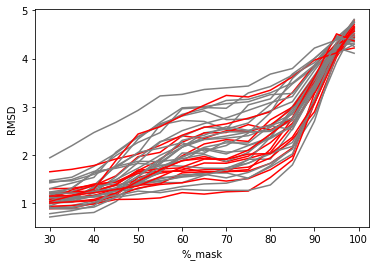

In [ ]:
sns.lineplot(data=dmean_HBI_b_1, x=dmean_HBI_b_1.index, y=dmean_HBI_b_1.RMSD, color="grey")
sns.lineplot(data=dmean_HBI_b_2, x=dmean_HBI_b_2.index, y=dmean_HBI_b_2.RMSD, color="grey")
sns.lineplot(data=dmean_HBI_b_3, x=dmean_HBI_b_3.index, y=dmean_HBI_b_3.RMSD, color="grey")
sns.lineplot(data=dmean_HBI_b_4, x=dmean_HBI_b_4.index, y=dmean_HBI_b_4.RMSD, color="grey")
#sns.lineplot(data=dmean_HBI_b_5, x=dmean_HBI_b_5.index, y=dmean_HBI_b_5.RMSD, color="grey")
#sns.lineplot(data=dmean_HBI_b_6, x=dmean_HBI_b_6.index, y=dmean_HBI_b_6.RMSD, color="grey")
sns.lineplot(data=dmean_HBI_b_7, x=dmean_HBI_b_7.index, y=dmean_HBI_b_7.RMSD, color="red")
sns.lineplot(data=dmean_HBI_b_8, x=dmean_HBI_b_8.index, y=dmean_HBI_b_8.RMSD, color="grey")
sns.lineplot(data=dmean_HBI_b_9, x=dmean_HBI_b_9.index, y=dmean_HBI_b_9.RMSD, color="grey")
#sns.lineplot(data=dmean_HBI_b_10, x=dmean_HBI_b_10.index, y=dmean_HBI_b_10.RMSD, color="red")
#sns.lineplot(data=dmean_HBI_b_11, x=dmean_HBI_b_11.index, y=dmean_HBI_b_11.RMSD, color="grey")
#sns.lineplot(data=dmean_HBI_b_12, x=dmean_HBI_b_12.index, y=dmean_HBI_b_12.RMSD, color="grey")
sns.lineplot(data=dmean_HBI_b_13, x=dmean_HBI_b_13.index, y=dmean_HBI_b_13.RMSD, color="grey")
sns.lineplot(data=dmean_HBI_b_14, x=dmean_HBI_b_14.index, y=dmean_HBI_b_14.RMSD, color="red")
sns.lineplot(data=dmean_HBI_b_15, x=dmean_HBI_b_15.index, y=dmean_HBI_b_15.RMSD, color="red")
sns.lineplot(data=dmean_HBI_b_16, x=dmean_HBI_b_16.index, y=dmean_HBI_b_16.RMSD, color="grey")
sns.lineplot(data=dmean_HBI_b_17, x=dmean_HBI_b_17.index, y=dmean_HBI_b_17.RMSD, color="grey")
#sns.lineplot(data=dmean_HBI_b_18, x=dmean_HBI_b_18.index, y=dmean_HBI_b_18.RMSD, color="grey")
sns.lineplot(data=dmean_HBI_b_19, x=dmean_HBI_b_19.index, y=dmean_HBI_b_19.RMSD, color="red")
sns.lineplot(data=dmean_HBI_b_20, x=dmean_HBI_b_20.index, y=dmean_HBI_b_20.RMSD, color="grey")

sns.lineplot(data=dmean_HBI_b_21, x=dmean_HBI_b_21.index, y=dmean_HBI_b_21.RMSD, color="red")
sns.lineplot(data=dmean_HBI_b_22, x=dmean_HBI_b_22.index, y=dmean_HBI_b_22.RMSD, color="red")
sns.lineplot(data=dmean_HBI_b_23, x=dmean_HBI_b_23.index, y=dmean_HBI_b_23.RMSD, color="grey")
#sns.lineplot(data=dmean_HBI_b_24, x=dmean_HBI_b_24.index, y=dmean_HBI_b_24.RMSD, color="grey")
sns.lineplot(data=dmean_HBI_b_25, x=dmean_HBI_b_25.index, y=dmean_HBI_b_25.RMSD, color="grey")
sns.lineplot(data=dmean_HBI_b_26, x=dmean_HBI_b_26.index, y=dmean_HBI_b_26.RMSD, color="red")
sns.lineplot(data=dmean_HBI_b_27, x=dmean_HBI_b_27.index, y=dmean_HBI_b_27.RMSD, color="red")
sns.lineplot(data=dmean_HBI_b_28, x=dmean_HBI_b_28.index, y=dmean_HBI_b_28.RMSD, color="grey")
sns.lineplot(data=dmean_HBI_b_29, x=dmean_HBI_b_29.index, y=dmean_HBI_b_29.RMSD, color="grey")
#sns.lineplot(data=dmean_HBI_b_30, x=dmean_HBI_b_30.index, y=dmean_HBI_b_30.RMSD, color="red")
sns.lineplot(data=dmean_HBI_b_31, x=dmean_HBI_b_31.index, y=dmean_HBI_b_31.RMSD, color="grey")
sns.lineplot(data=dmean_HBI_b_32, x=dmean_HBI_b_32.index, y=dmean_HBI_b_32.RMSD, color="red")
sns.lineplot(data=dmean_HBI_b_33, x=dmean_HBI_b_33.index, y=dmean_HBI_b_33.RMSD, color="red")
sns.lineplot(data=dmean_HBI_b_34, x=dmean_HBI_b_34.index, y=dmean_HBI_b_34.RMSD, color="red")
sns.lineplot(data=dmean_HBI_b_35, x=dmean_HBI_b_35.index, y=dmean_HBI_b_35.RMSD, color="grey")
#sns.lineplot(data=dmean_HBI_b_36, x=dmean_HBI_b_36.index, y=dmean_HBI_b_36.RMSD, color="grey")
sns.lineplot(data=dmean_HBI_b_37, x=dmean_HBI_b_37.index, y=dmean_HBI_b_37.RMSD, color="grey")
sns.lineplot(data=dmean_HBI_b_38, x=dmean_HBI_b_38.index, y=dmean_HBI_b_38.RMSD, color="grey")
sns.lineplot(data=dmean_HBI_b_39, x=dmean_HBI_b_39.index, y=dmean_HBI_b_39.RMSD, color="grey")
sns.lineplot(data=dmean_HBI_b_40, x=dmean_HBI_b_40.index, y=dmean_HBI_b_40.RMSD, color="grey")

sns.lineplot(data=dmean_HBI_b_41, x=dmean_HBI_b_41.index, y=dmean_HBI_b_41.RMSD, color="grey")
#sns.lineplot(data=dmean_HBI_b_42, x=dmean_HBI_b_42.index, y=dmean_HBI_b_42.RMSD, color="grey")
sns.lineplot(data=dmean_HBI_b_43, x=dmean_HBI_b_43.index, y=dmean_HBI_b_43.RMSD, color="grey")
sns.lineplot(data=dmean_HBI_b_44, x=dmean_HBI_b_44.index, y=dmean_HBI_b_44.RMSD, color="grey")
sns.lineplot(data=dmean_HBI_b_45, x=dmean_HBI_b_45.index, y=dmean_HBI_b_45.RMSD, color="grey")
sns.lineplot(data=dmean_HBI_b_46, x=dmean_HBI_b_46.index, y=dmean_HBI_b_46.RMSD, color="grey")
#sns.lineplot(data=dmean_HBI_b_47, x=dmean_HBI_b_47.index, y=dmean_HBI_b_47.RMSD, color="red")
#sns.lineplot(data=dmean_HBI_b_48, x=dmean_HBI_b_48.index, y=dmean_HBI_b_48.RMSD, color="grey")
sns.lineplot(data=dmean_HBI_b_49, x=dmean_HBI_b_49.index, y=dmean_HBI_b_49.RMSD, color="red")
sns.lineplot(data=dmean_HBI_b_50, x=dmean_HBI_b_50.index, y=dmean_HBI_b_50.RMSD, color="red")
#sns.lineplot(data=dmean_HBI_b_51, x=dmean_HBI_b_51.index, y=dmean_HBI_b_51.RMSD, color="grey")
#sns.lineplot(data=dmean_HBI_b_52, x=dmean_HBI_b_52.index, y=dmean_HBI_b_52.RMSD, color="grey")
sns.lineplot(data=dmean_HBI_b_53, x=dmean_HBI_b_53.index, y=dmean_HBI_b_53.RMSD, color="grey")
#sns.lineplot(data=dmean_HBI_b_54, x=dmean_HBI_b_54.index, y=dmean_HBI_b_54.RMSD, color="red")
sns.lineplot(data=dmean_HBI_b_55, x=dmean_HBI_b_55.index, y=dmean_HBI_b_55.RMSD, color="grey")
sns.lineplot(data=dmean_HBI_b_56, x=dmean_HBI_b_56.index, y=dmean_HBI_b_56.RMSD, color="red")


In [ ]:
df_TOP7 = dTOP7.reset_index()
df_HBI_b_10 = dHBI_b_10.reset_index()
df_4UOS = d4UOS.reset_index()
df_TMB2_17 = dTMB2_17.reset_index()
df_TMB12_sol09_3 = dTMB12_sol09_3.reset_index()
df_TMB12tr12 = dTMB12tr12.reset_index()
#df_TMB14_14 = dTMB14_14.reset_index()
#df_TMB14_14_B = dTMB14_14_B.reset_index()
df_TOP7

,%_mask,model,ptm,plDDT,plDDT_backbone
0,30,0,0.811,80.312003,84.201660
1,30,1,0.826,81.489298,85.376100
2,30,2,0.815,80.428622,84.193216
3,30,3,0.797,79.411482,83.162573
4,30,4,0.802,79.726762,83.422344
...,...,...,...,...,...
955,99,59,0.425,51.403849,52.938610
956,99,60,0.098,32.239142,32.708091
957,99,61,0.156,37.117815,37.861079
958,99,62,0.098,32.239142,32.708091


<AxesSubplot:xlabel='%_mask', ylabel='ptm'>

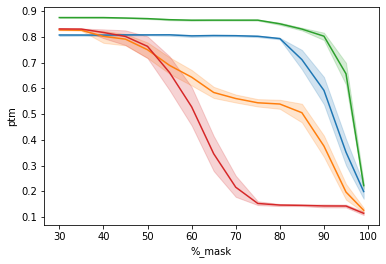

In [ ]:
sns.lineplot(data=df_TOP7, x=df_TOP7['%_mask'], y=df_TOP7.ptm)
sns.lineplot(data=df_HBI_b_10, x=df_HBI_b_10['%_mask'], y=df_HBI_b_10.ptm)
sns.lineplot(data=df_4UOS, x=df_4UOS['%_mask'], y=df_4UOS.ptm)
sns.lineplot(data=df_TMB2_17, x=df_TMB2_17['%_mask'], y=df_TMB2_17.ptm)
#sns.lineplot(data=df_TMB12_sol09_3, x=df_TMB12_sol09_3['%_mask'], y=df_TMB12_sol09_3.ptm)

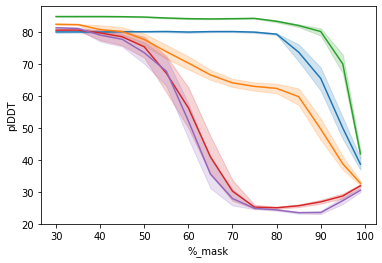

In [ ]:
sns.lineplot(data=df_TOP7, x=df_TOP7['%_mask'], y=df_TOP7.plDDT)
sns.lineplot(data=df_HBI_b_10, x=df_HBI_b_10['%_mask'], y=df_HBI_b_10.plDDT)
sns.lineplot(data=df_4UOS, x=df_4UOS['%_mask'], y=df_4UOS.plDDT)
sns.lineplot(data=df_TMB2_17, x=df_TMB2_17['%_mask'], y=df_TMB2_17.plDDT)
sns.lineplot(data=df_TMB12_sol09_3, x=df_TMB12_sol09_3['%_mask'], y=df_TMB12_sol09_3.plDDT)

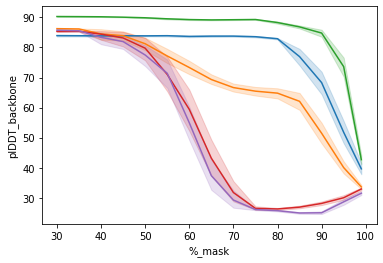

In [ ]:
sns.lineplot(data=df_TOP7, x=df_TOP7['%_mask'], y=df_TOP7.plDDT_backbone)
sns.lineplot(data=df_HBI_b_10, x=df_HBI_b_10['%_mask'], y=df_HBI_b_10.plDDT_backbone)
sns.lineplot(data=df_4UOS, x=df_4UOS['%_mask'], y=df_4UOS.plDDT_backbone)
sns.lineplot(data=df_TMB2_17, x=df_TMB2_17['%_mask'], y=df_TMB2_17.plDDT_backbone)
sns.lineplot(data=df_TMB12_sol09_3, x=df_TMB12_sol09_3['%_mask'], y=df_TMB12_sol09_3.plDDT_backbone)

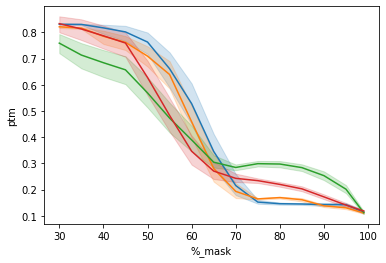

In [ ]:
sns.lineplot(data=df_TMB2_17, x=df_TMB2_17['%_mask'], y=df_TMB2_17.ptm)
sns.lineplot(data=df_TMB12_sol09_3, x=df_TMB12_sol09_3['%_mask'], y=df_TMB12_sol09_3.ptm)
sns.lineplot(data=df_TMB12tr12, x=df_TMB12tr12['%_mask'], y=df_TMB12tr12.ptm)
sns.lineplot(data=df_TMB14_14, x=df_TMB14_14['%_mask'], y=df_TMB14_14.ptm)

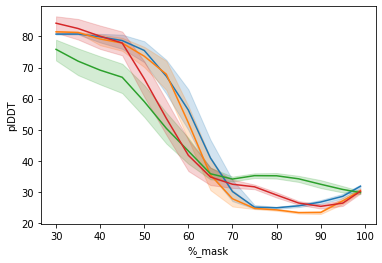

In [ ]:
sns.lineplot(data=df_TMB2_17, x=df_TMB2_17['%_mask'], y=df_TMB2_17.plDDT)
sns.lineplot(data=df_TMB12_sol09_3, x=df_TMB12_sol09_3['%_mask'], y=df_TMB12_sol09_3.plDDT)
sns.lineplot(data=df_TMB12tr12, x=df_TMB12tr12['%_mask'], y=df_TMB12tr12.plDDT)
sns.lineplot(data=df_TMB14_14, x=df_TMB14_14['%_mask'], y=df_TMB14_14.plDDT)

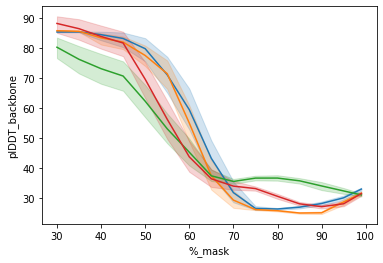

In [ ]:
sns.lineplot(data=df_TMB2_17, x=df_TMB2_17['%_mask'], y=df_TMB2_17.plDDT_backbone)
sns.lineplot(data=df_TMB12_sol09_3, x=df_TMB12_sol09_3['%_mask'], y=df_TMB12_sol09_3.plDDT_backbone)
sns.lineplot(data=df_TMB12tr12, x=df_TMB12tr12['%_mask'], y=df_TMB12tr12.plDDT_backbone)
sns.lineplot(data=df_TMB14_14, x=df_TMB14_14['%_mask'], y=df_TMB14_14.plDDT_backbone)

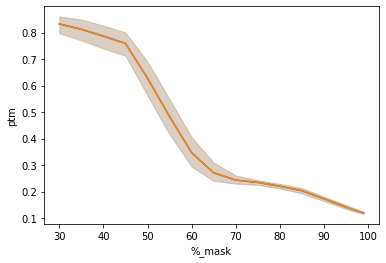

In [ ]:
sns.lineplot(data=df_TMB14_14, x=df_TMB14_14['%_mask'], y=df_TMB14_14.ptm)
sns.lineplot(data=df_TMB14_14_B, x=df_TMB14_14_B['%_mask'], y=df_TMB14_14_B.ptm)

In [ ]:
dTOP7_filt=dTOP7.loc[dTOP7.ptm >=0.75]
dHBI_b_10_filt = dHBI_b_10.loc[dHBI_b_10.ptm >=0.75]
d4UOS_filt = d4UOS.loc[d4UOS.ptm >=0.75]
dTMB2_17_filt = dTMB2_17.loc[dTMB2_17.ptm >=0.75]
dTMB12_sol09_3_filt = dTMB12_sol09_3.loc[dTMB12_sol09_3.ptm >=0.75]
dTMB12tr12_filt = dTMB12tr12.loc[dTMB12tr12.ptm >=0.75]
#dTMB14_14_filt = dTMB14_14.loc[dTMB14_14.ptm >=0.75]

dTOP7_pass = dTOP7_filt.groupby(level=0).count()
dHBI_b_10_pass = dHBI_b_10_filt.groupby(level=0).count()
d4UOS_pass = d4UOS_filt.groupby(level=0).count()
dTMB2_17_pass = dTMB2_17_filt.groupby(level=0).count()
dTMB12_sol09_3_pass = dTMB12_sol09_3_filt.groupby(level=0).count()
dTMB12tr12_pass = dTMB12tr12_filt.groupby(level=0).count()
#dTMB14_14_pass = dTMB14_14_filt.groupby(level=0).count()

In [ ]:
dmean_TOP7["success_rate"] = dTOP7_pass.ptm/64.0
dmean_TOP7['success_rate'] = dmean_TOP7['success_rate'].fillna(0)

dmean_HBI_b_10["success_rate"] = dHBI_b_10_pass.ptm/64.0
dmean_HBI_b_10['success_rate'] = dmean_HBI_b_10['success_rate'].fillna(0)

dmean_4UOS["success_rate"] = d4UOS_pass.ptm/64.0
dmean_4UOS['success_rate'] = dmean_4UOS['success_rate'].fillna(0)

dmean_TMB2_17["success_rate"] = dTMB2_17_pass.ptm/64.0
dmean_TMB2_17['success_rate'] = dmean_TMB2_17['success_rate'].fillna(0)

dmean_TMB12_sol09_3["success_rate"] = dTMB12_sol09_3_pass.ptm/64.0
dmean_TMB12_sol09_3['success_rate'] = dmean_TMB12_sol09_3['success_rate'].fillna(0)

dmean_TMB12tr12["success_rate"] = dTMB12tr12_pass.ptm/64.0
dmean_TMB12tr12['success_rate'] = dmean_TMB12tr12['success_rate'].fillna(0)

#dmean_TMB14_14["success_rate"] = dTMB14_14_pass.ptm/64.0
#dmean_TMB14_14['success_rate'] = dmean_TMB14_14['success_rate'].fillna(0)

In [ ]:
dmean_TOP7.to_csv("/content/google_drive/MyDrive/AF_vs_ESMF/ESMFold_masking/advanced_notebook_sample_output/df_TOP7.csv")
dmean_HBI_b_10.to_csv("/content/google_drive/MyDrive/AF_vs_ESMF/ESMFold_masking/advanced_notebook_sample_output/df_dmean_HBI_b_10.csv")
dmean_4UOS.to_csv("/content/google_drive/MyDrive/AF_vs_ESMF/ESMFold_masking/advanced_notebook_sample_output/df_dmean_4UOS.csv")
dmean_TMB2_17.to_csv("/content/google_drive/MyDrive/AF_vs_ESMF/ESMFold_masking/advanced_notebook_sample_output/df_TMB2_17.csv")



<AxesSubplot:xlabel='%_mask', ylabel='ptm'>

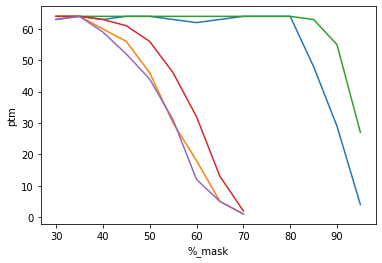

In [ ]:
sns.lineplot(data=dTOP7_pass, x=dTOP7_pass.index, y=dTOP7_pass.ptm)
sns.lineplot(data=dHBI_b_10_pass, x=dHBI_b_10_pass.index, y=dHBI_b_10_pass.ptm)
sns.lineplot(data=d4UOS_pass, x=d4UOS_pass.index, y=d4UOS_pass.ptm)
sns.lineplot(data=dTMB2_17_pass, x=dTMB2_17_pass.index, y=dTMB2_17_pass.ptm)
sns.lineplot(data=dTMB12_sol09_3_pass, x=dTMB12_sol09_3_pass.index, y=dTMB12_sol09_3_pass.ptm)

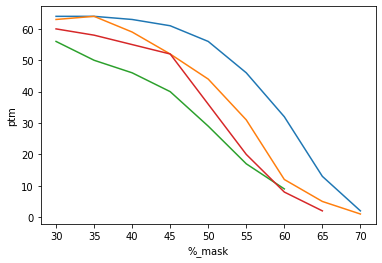

In [ ]:
sns.lineplot(data=dTMB2_17_pass, x=dTMB2_17_pass.index, y=dTMB2_17_pass.ptm)
sns.lineplot(data=dTMB12_sol09_3_pass, x=dTMB12_sol09_3_pass.index, y=dTMB12_sol09_3_pass.ptm)
sns.lineplot(data=dTMB12tr12_pass, x=dTMB12tr12_pass.index, y=dTMB12tr12_pass.ptm)
sns.lineplot(data=dTMB14_14_pass, x=dTMB14_14_pass.index, y=dTMB14_14_pass.ptm)

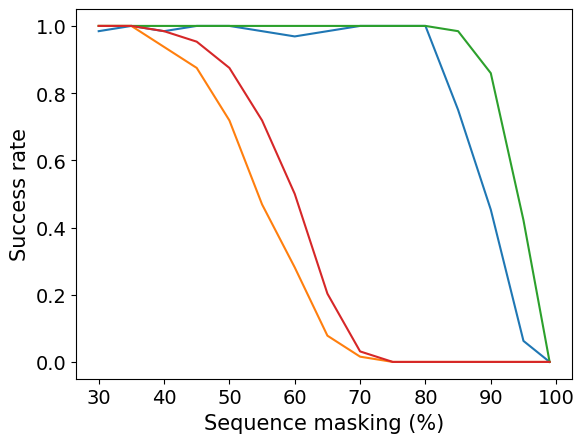

In [ ]:
ax=sns.lineplot(data=dmean_TOP7, x=dmean_TOP7.index, y=dmean_TOP7['success_rate'])
sns.lineplot(data=dmean_HBI_b_10, x=dmean_HBI_b_10.index, y=dmean_HBI_b_10['success_rate'],ax=ax)
sns.lineplot(data=dmean_4UOS, x=dmean_4UOS.index, y=dmean_4UOS['success_rate'],ax=ax)
sns.lineplot(data=dmean_TMB2_17, x=dmean_TMB2_17.index, y=dmean_TMB2_17['success_rate'],ax=ax)
#sns.lineplot(data=dmean_TMB12_sol09_3, x=dmean_TMB12_sol09_3.index, y=dmean_TMB12_sol09_3['success_rate'])
ax.set_xlabel("Sequence masking (%)",fontsize=15)
ax.set_ylabel("Success rate",fontsize=15)
ax.tick_params(labelsize=14)

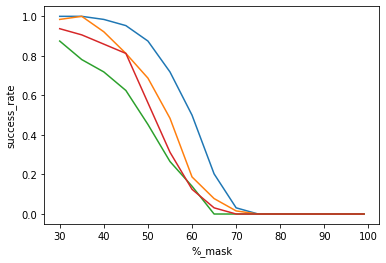

In [ ]:
sns.lineplot(data=dmean_TMB2_17, x=dmean_TMB2_17.index, y=dmean_TMB2_17['success_rate'])
sns.lineplot(data=dmean_TMB12_sol09_3, x=dmean_TMB12_sol09_3.index, y=dmean_TMB12_sol09_3['success_rate'])
sns.lineplot(data=dmean_TMB12tr12, x=dmean_TMB12tr12.index, y=dmean_TMB12tr12['success_rate'])
sns.lineplot(data=dmean_TMB14_14, x=dmean_TMB14_14.index, y=dmean_TMB14_14['success_rate'])

In [ ]:
dTMB2_1_filt = dTMB2_1.loc[dTMB2_1.ptm >=0.75]
dTMB2_2_filt = dTMB2_2.loc[dTMB2_2.ptm >=0.75]
dTMB2_3_filt = dTMB2_3.loc[dTMB2_3.ptm >=0.75]
dTMB2_4_filt = dTMB2_4.loc[dTMB2_4.ptm >=0.75]
dTMB2_5_filt = dTMB2_5.loc[dTMB2_5.ptm >=0.75]
dTMB2_6_filt = dTMB2_6.loc[dTMB2_6.ptm >=0.75]
dTMB2_7_filt = dTMB2_7.loc[dTMB2_7.ptm >=0.75]
dTMB2_8_filt = dTMB2_8.loc[dTMB2_8.ptm >=0.75]
dTMB2_9_filt = dTMB2_9.loc[dTMB2_9.ptm >=0.75]
dTMB2_10_filt = dTMB2_10.loc[dTMB2_10.ptm >=0.75]
dTMB2_11_filt = dTMB2_11.loc[dTMB2_11.ptm >=0.75]
dTMB2_12_filt = dTMB2_12.loc[dTMB2_12.ptm >=0.75]
dTMB2_13_filt = dTMB2_13.loc[dTMB2_13.ptm >=0.75]
dTMB2_14_filt = dTMB2_14.loc[dTMB2_14.ptm >=0.75]
dTMB2_15_filt = dTMB2_15.loc[dTMB2_15.ptm >=0.75]
dTMB2_16_filt = dTMB2_16.loc[dTMB2_16.ptm >=0.75]
dTMB2_17_filt = dTMB2_17.loc[dTMB2_17.ptm >=0.75]
dTMB2_18_filt = dTMB2_18.loc[dTMB2_18.ptm >=0.75]
dTMB2_19_filt = dTMB2_19.loc[dTMB2_19.ptm >=0.75]
dTMB2_20_filt = dTMB2_20.loc[dTMB2_20.ptm >=0.75]
dTMB2_21_filt = dTMB2_21.loc[dTMB2_21.ptm >=0.75]
dTMB2_22_filt = dTMB2_22.loc[dTMB2_22.ptm >=0.75]
dTMB2_23_filt = dTMB2_23.loc[dTMB2_23.ptm >=0.75]
dTMB2_24_filt = dTMB2_24.loc[dTMB2_24.ptm >=0.75]
dTMB2_25_filt = dTMB2_25.loc[dTMB2_25.ptm >=0.75]
dTMB2_26_filt = dTMB2_26.loc[dTMB2_26.ptm >=0.75]
dTMB2_27_filt = dTMB2_27.loc[dTMB2_27.ptm >=0.75]
dTMB2_28_filt = dTMB2_28.loc[dTMB2_28.ptm >=0.75]
dTMB2_29_filt = dTMB2_29.loc[dTMB2_29.ptm >=0.75]
dTMB2_30_filt = dTMB2_30.loc[dTMB2_30.ptm >=0.75]
dTMB2_31_filt = dTMB2_31.loc[dTMB2_31.ptm >=0.75]
dTMB2_32_filt = dTMB2_32.loc[dTMB2_32.ptm >=0.75]
dTMB2_33_filt = dTMB2_33.loc[dTMB2_33.ptm >=0.75]
dTMB2_34_filt = dTMB2_34.loc[dTMB2_34.ptm >=0.75]
dTMB2_35_filt = dTMB2_35.loc[dTMB2_35.ptm >=0.75]
dTMB2_36_filt = dTMB2_36.loc[dTMB2_36.ptm >=0.75]
dTMB2_37_filt = dTMB2_37.loc[dTMB2_37.ptm >=0.75]
dTMB2_38_filt = dTMB2_38.loc[dTMB2_38.ptm >=0.75]
dTMB2_39_filt = dTMB2_39.loc[dTMB2_39.ptm >=0.75]
dTMB2_40_filt = dTMB2_40.loc[dTMB2_40.ptm >=0.75]
dTMB2_41_filt = dTMB2_41.loc[dTMB2_41.ptm >=0.75]
dTMB2_42_filt = dTMB2_42.loc[dTMB2_42.ptm >=0.75]
dTMB2_43_filt = dTMB2_43.loc[dTMB2_43.ptm >=0.75]
dTMB2_44_filt = dTMB2_44.loc[dTMB2_44.ptm >=0.75]
dTMB2_45_filt = dTMB2_45.loc[dTMB2_45.ptm >=0.75]
dTMB2_46_filt = dTMB2_46.loc[dTMB2_46.ptm >=0.75]
dTMB2_47_filt = dTMB2_47.loc[dTMB2_47.ptm >=0.75]
dTMB2_48_filt = dTMB2_48.loc[dTMB2_48.ptm >=0.75]
dTMB2_49_filt = dTMB2_49.loc[dTMB2_49.ptm >=0.75]
dTMB2_50_filt = dTMB2_50.loc[dTMB2_50.ptm >=0.75]
dTMB2_51_filt = dTMB2_51.loc[dTMB2_51.ptm >=0.75]
dTMB2_52_filt = dTMB2_52.loc[dTMB2_52.ptm >=0.75]
dTMB2_53_filt = dTMB2_53.loc[dTMB2_53.ptm >=0.75]
dTMB2_54_filt = dTMB2_54.loc[dTMB2_54.ptm >=0.75]
dTMB2_55_filt = dTMB2_55.loc[dTMB2_55.ptm >=0.75]
dTMB2_56_filt = dTMB2_56.loc[dTMB2_56.ptm >=0.75]
dTMB2_57_filt = dTMB2_57.loc[dTMB2_57.ptm >=0.75]
dTMB2_58_filt = dTMB2_58.loc[dTMB2_58.ptm >=0.75]
dTMB2_59_filt = dTMB2_59.loc[dTMB2_59.ptm >=0.75]
dTMB2_60_filt = dTMB2_60.loc[dTMB2_60.ptm >=0.75]
dTMB2_61_filt = dTMB2_61.loc[dTMB2_61.ptm >=0.75]
dTMB2_62_filt = dTMB2_62.loc[dTMB2_62.ptm >=0.75]
dTMB2_63_filt = dTMB2_63.loc[dTMB2_63.ptm >=0.75]
dTMB2_64_filt = dTMB2_64.loc[dTMB2_64.ptm >=0.75]
dTMB2_65_filt = dTMB2_65.loc[dTMB2_65.ptm >=0.75]
dTMB2_66_filt = dTMB2_66.loc[dTMB2_66.ptm >=0.75]
dTMB2_67_filt = dTMB2_67.loc[dTMB2_67.ptm >=0.75]
dTMB2_68_filt = dTMB2_68.loc[dTMB2_68.ptm >=0.75]
dTMB2_69_filt = dTMB2_69.loc[dTMB2_69.ptm >=0.75]
dTMB2_70_filt = dTMB2_70.loc[dTMB2_70.ptm >=0.75]
dTMB2_71_filt = dTMB2_71.loc[dTMB2_71.ptm >=0.75]
dTMB2_72_filt = dTMB2_72.loc[dTMB2_72.ptm >=0.75]
dTMB2_73_filt = dTMB2_73.loc[dTMB2_73.ptm >=0.75]
dTMB2_74_filt = dTMB2_74.loc[dTMB2_74.ptm >=0.75]
dTMB2_75_filt = dTMB2_75.loc[dTMB2_75.ptm >=0.75]


dTMB2_1_pass = dTMB2_1_filt.groupby(level=0).count()
dTMB2_2_pass = dTMB2_2_filt.groupby(level=0).count()
dTMB2_3_pass = dTMB2_3_filt.groupby(level=0).count()
dTMB2_4_pass = dTMB2_4_filt.groupby(level=0).count()
dTMB2_5_pass = dTMB2_5_filt.groupby(level=0).count()
dTMB2_6_pass = dTMB2_6_filt.groupby(level=0).count()
dTMB2_7_pass = dTMB2_7_filt.groupby(level=0).count()
dTMB2_8_pass = dTMB2_8_filt.groupby(level=0).count()
dTMB2_9_pass = dTMB2_9_filt.groupby(level=0).count()
dTMB2_10_pass = dTMB2_10_filt.groupby(level=0).count()
dTMB2_11_pass = dTMB2_11_filt.groupby(level=0).count()
dTMB2_12_pass = dTMB2_12_filt.groupby(level=0).count()
dTMB2_13_pass = dTMB2_13_filt.groupby(level=0).count()
dTMB2_14_pass = dTMB2_14_filt.groupby(level=0).count()
dTMB2_15_pass = dTMB2_15_filt.groupby(level=0).count()
dTMB2_16_pass = dTMB2_16_filt.groupby(level=0).count()
dTMB2_17_pass = dTMB2_17_filt.groupby(level=0).count()
dTMB2_18_pass = dTMB2_18_filt.groupby(level=0).count()
dTMB2_19_pass = dTMB2_19_filt.groupby(level=0).count()
dTMB2_20_pass = dTMB2_20_filt.groupby(level=0).count()
dTMB2_21_pass = dTMB2_21_filt.groupby(level=0).count()
dTMB2_22_pass = dTMB2_22_filt.groupby(level=0).count()
dTMB2_23_pass = dTMB2_23_filt.groupby(level=0).count()
dTMB2_24_pass = dTMB2_24_filt.groupby(level=0).count()
dTMB2_25_pass = dTMB2_25_filt.groupby(level=0).count()
dTMB2_26_pass = dTMB2_26_filt.groupby(level=0).count()
dTMB2_27_pass = dTMB2_27_filt.groupby(level=0).count()
dTMB2_28_pass = dTMB2_28_filt.groupby(level=0).count()
dTMB2_29_pass = dTMB2_29_filt.groupby(level=0).count()
dTMB2_30_pass = dTMB2_30_filt.groupby(level=0).count()
dTMB2_31_pass = dTMB2_31_filt.groupby(level=0).count()
dTMB2_32_pass = dTMB2_32_filt.groupby(level=0).count()
dTMB2_33_pass = dTMB2_33_filt.groupby(level=0).count()
dTMB2_34_pass = dTMB2_34_filt.groupby(level=0).count()
dTMB2_35_pass = dTMB2_35_filt.groupby(level=0).count()
dTMB2_36_pass = dTMB2_36_filt.groupby(level=0).count()
dTMB2_37_pass = dTMB2_37_filt.groupby(level=0).count()
dTMB2_38_pass = dTMB2_38_filt.groupby(level=0).count()
dTMB2_39_pass = dTMB2_39_filt.groupby(level=0).count()
dTMB2_40_pass = dTMB2_40_filt.groupby(level=0).count()
dTMB2_41_pass = dTMB2_41_filt.groupby(level=0).count()
dTMB2_42_pass = dTMB2_42_filt.groupby(level=0).count()
dTMB2_43_pass = dTMB2_43_filt.groupby(level=0).count()
dTMB2_44_pass = dTMB2_44_filt.groupby(level=0).count()
dTMB2_45_pass = dTMB2_45_filt.groupby(level=0).count()
dTMB2_46_pass = dTMB2_46_filt.groupby(level=0).count()
dTMB2_47_pass = dTMB2_47_filt.groupby(level=0).count()
dTMB2_48_pass = dTMB2_48_filt.groupby(level=0).count()
dTMB2_49_pass = dTMB2_49_filt.groupby(level=0).count()
dTMB2_50_pass = dTMB2_50_filt.groupby(level=0).count()
dTMB2_51_pass = dTMB2_51_filt.groupby(level=0).count()
dTMB2_52_pass = dTMB2_52_filt.groupby(level=0).count()
dTMB2_53_pass = dTMB2_53_filt.groupby(level=0).count()
dTMB2_54_pass = dTMB2_54_filt.groupby(level=0).count()
dTMB2_55_pass = dTMB2_55_filt.groupby(level=0).count()
dTMB2_56_pass = dTMB2_56_filt.groupby(level=0).count()
dTMB2_57_pass = dTMB2_57_filt.groupby(level=0).count()
dTMB2_58_pass = dTMB2_58_filt.groupby(level=0).count()
dTMB2_59_pass = dTMB2_59_filt.groupby(level=0).count()
dTMB2_60_pass = dTMB2_60_filt.groupby(level=0).count()
dTMB2_61_pass = dTMB2_61_filt.groupby(level=0).count()
dTMB2_62_pass = dTMB2_62_filt.groupby(level=0).count()
dTMB2_63_pass = dTMB2_63_filt.groupby(level=0).count()
dTMB2_64_pass = dTMB2_64_filt.groupby(level=0).count()
dTMB2_65_pass = dTMB2_65_filt.groupby(level=0).count()
dTMB2_66_pass = dTMB2_66_filt.groupby(level=0).count()
dTMB2_67_pass = dTMB2_67_filt.groupby(level=0).count()
dTMB2_68_pass = dTMB2_68_filt.groupby(level=0).count()
dTMB2_69_pass = dTMB2_69_filt.groupby(level=0).count()
dTMB2_70_pass = dTMB2_70_filt.groupby(level=0).count()
dTMB2_71_pass = dTMB2_71_filt.groupby(level=0).count()
dTMB2_72_pass = dTMB2_72_filt.groupby(level=0).count()
dTMB2_73_pass = dTMB2_73_filt.groupby(level=0).count()
dTMB2_74_pass = dTMB2_74_filt.groupby(level=0).count()
dTMB2_75_pass = dTMB2_75_filt.groupby(level=0).count()

In [ ]:
dTMB2_76_filt = dTMB2_76.loc[dTMB2_76.ptm >=0.75]
dTMB2_77_filt = dTMB2_77.loc[dTMB2_77.ptm >=0.75]
dTMB2_78_filt = dTMB2_78.loc[dTMB2_78.ptm >=0.75]
dTMB2_79_filt = dTMB2_79.loc[dTMB2_79.ptm >=0.75]
dTMB2_80_filt = dTMB2_80.loc[dTMB2_80.ptm >=0.75]
dTMB2_81_filt = dTMB2_81.loc[dTMB2_81.ptm >=0.75]
dTMB2_82_filt = dTMB2_82.loc[dTMB2_82.ptm >=0.75]
dTMB2_83_filt = dTMB2_83.loc[dTMB2_83.ptm >=0.75]
dTMB2_84_filt = dTMB2_84.loc[dTMB2_84.ptm >=0.75]
dTMB2_85_filt = dTMB2_85.loc[dTMB2_85.ptm >=0.75]
dTMB2_86_filt = dTMB2_86.loc[dTMB2_86.ptm >=0.75]
dTMB2_87_filt = dTMB2_87.loc[dTMB2_87.ptm >=0.75]
dTMB2_88_filt = dTMB2_88.loc[dTMB2_88.ptm >=0.75]
dTMB2_89_filt = dTMB2_89.loc[dTMB2_89.ptm >=0.75]
dTMB2_90_filt = dTMB2_90.loc[dTMB2_90.ptm >=0.75]



dTMB2_76_pass = dTMB2_76_filt.groupby(level=0).count()
dTMB2_77_pass = dTMB2_77_filt.groupby(level=0).count()
dTMB2_78_pass = dTMB2_78_filt.groupby(level=0).count()
dTMB2_79_pass = dTMB2_79_filt.groupby(level=0).count()
dTMB2_80_pass = dTMB2_80_filt.groupby(level=0).count()
dTMB2_81_pass = dTMB2_81_filt.groupby(level=0).count()
dTMB2_82_pass = dTMB2_82_filt.groupby(level=0).count()
dTMB2_83_pass = dTMB2_83_filt.groupby(level=0).count()
dTMB2_84_pass = dTMB2_84_filt.groupby(level=0).count()
dTMB2_85_pass = dTMB2_85_filt.groupby(level=0).count()
dTMB2_86_pass = dTMB2_86_filt.groupby(level=0).count()
dTMB2_87_pass = dTMB2_87_filt.groupby(level=0).count()
dTMB2_88_pass = dTMB2_88_filt.groupby(level=0).count()
dTMB2_89_pass = dTMB2_89_filt.groupby(level=0).count()
dTMB2_90_pass = dTMB2_90_filt.groupby(level=0).count()


In [ ]:
dmean_TMB2_1["success_rate"] = dTMB2_1_pass.ptm/64.0
dmean_TMB2_1['success_rate'] = dmean_TMB2_1['success_rate'].fillna(0)

dmean_TMB2_2["success_rate"] = dTMB2_2_pass.ptm/64.0
dmean_TMB2_2['success_rate'] = dmean_TMB2_2['success_rate'].fillna(0)
dmean_TMB2_3["success_rate"] = dTMB2_3_pass.ptm/64.0
dmean_TMB2_3['success_rate'] = dmean_TMB2_3['success_rate'].fillna(0)
dmean_TMB2_4["success_rate"] = dTMB2_4_pass.ptm/64.0
dmean_TMB2_4['success_rate'] = dmean_TMB2_4['success_rate'].fillna(0)
dmean_TMB2_5["success_rate"] = dTMB2_5_pass.ptm/64.0
dmean_TMB2_5['success_rate'] = dmean_TMB2_5['success_rate'].fillna(0)
dmean_TMB2_6["success_rate"] = dTMB2_6_pass.ptm/64.0
dmean_TMB2_6['success_rate'] = dmean_TMB2_6['success_rate'].fillna(0)
dmean_TMB2_7["success_rate"] = dTMB2_7_pass.ptm/64.0
dmean_TMB2_7['success_rate'] = dmean_TMB2_7['success_rate'].fillna(0)
dmean_TMB2_8["success_rate"] = dTMB2_8_pass.ptm/64.0
dmean_TMB2_8['success_rate'] = dmean_TMB2_8['success_rate'].fillna(0)
dmean_TMB2_9["success_rate"] = dTMB2_9_pass.ptm/64.0
dmean_TMB2_9['success_rate'] = dmean_TMB2_9['success_rate'].fillna(0)
dmean_TMB2_10["success_rate"] = dTMB2_10_pass.ptm/64.0
dmean_TMB2_10['success_rate'] = dmean_TMB2_10['success_rate'].fillna(0)
dmean_TMB2_11["success_rate"] = dTMB2_11_pass.ptm/64.0
dmean_TMB2_11['success_rate'] = dmean_TMB2_11['success_rate'].fillna(0)
dmean_TMB2_12["success_rate"] = dTMB2_12_pass.ptm/64.0
dmean_TMB2_12['success_rate'] = dmean_TMB2_12['success_rate'].fillna(0)
dmean_TMB2_13["success_rate"] = dTMB2_13_pass.ptm/64.0
dmean_TMB2_13['success_rate'] = dmean_TMB2_13['success_rate'].fillna(0)
dmean_TMB2_14["success_rate"] = dTMB2_14_pass.ptm/64.0
dmean_TMB2_14['success_rate'] = dmean_TMB2_14['success_rate'].fillna(0)
dmean_TMB2_15["success_rate"] = dTMB2_15_pass.ptm/64.0
dmean_TMB2_15['success_rate'] = dmean_TMB2_15['success_rate'].fillna(0)
dmean_TMB2_16["success_rate"] = dTMB2_16_pass.ptm/64.0
dmean_TMB2_16['success_rate'] = dmean_TMB2_16['success_rate'].fillna(0)
dmean_TMB2_17["success_rate"] = dTMB2_17_pass.ptm/64.0
dmean_TMB2_17['success_rate'] = dmean_TMB2_17['success_rate'].fillna(0)
dmean_TMB2_18["success_rate"] = dTMB2_18_pass.ptm/64.0
dmean_TMB2_18['success_rate'] = dmean_TMB2_18['success_rate'].fillna(0)
dmean_TMB2_19["success_rate"] = dTMB2_19_pass.ptm/64.0
dmean_TMB2_19['success_rate'] = dmean_TMB2_19['success_rate'].fillna(0)
dmean_TMB2_20["success_rate"] = dTMB2_20_pass.ptm/64.0
dmean_TMB2_20['success_rate'] = dmean_TMB2_20['success_rate'].fillna(0)
dmean_TMB2_1

,ptm,plDDT,plDDT_backbone,success_rate
%_mask,,,,
30,0.782609,76.973221,81.603052,0.937500
35,0.776625,76.666186,81.288425,0.890625
40,0.768813,76.074071,80.688858,0.765625
45,0.740281,73.773716,78.231584,0.671875
50,0.693562,70.112317,74.321997,0.546875
55,0.628188,64.740098,68.629102,0.296875
60,0.512609,55.455865,58.663167,0.109375
65,0.297641,37.081309,39.113421,0.015625
70,0.169594,26.682703,28.121114,0.000000


<AxesSubplot:xlabel='%_mask', ylabel='success_rate'>

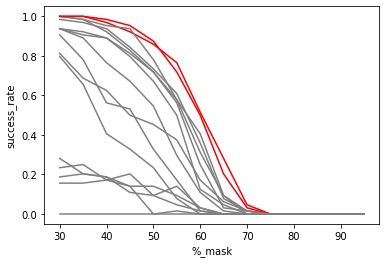

In [ ]:
sns.lineplot(data=dmean_TMB2_1, x=dmean_TMB2_1.index, y=dmean_TMB2_1['success_rate'], color="grey")
sns.lineplot(data=dmean_TMB2_2, x=dmean_TMB2_2.index, y=dmean_TMB2_2['success_rate'], color="grey")
sns.lineplot(data=dmean_TMB2_3, x=dmean_TMB2_3.index, y=dmean_TMB2_3['success_rate'], color="red")
sns.lineplot(data=dmean_TMB2_4, x=dmean_TMB2_4.index, y=dmean_TMB2_4['success_rate'], color="grey")
sns.lineplot(data=dmean_TMB2_5, x=dmean_TMB2_5.index, y=dmean_TMB2_5['success_rate'], color="grey")
sns.lineplot(data=dmean_TMB2_6, x=dmean_TMB2_6.index, y=dmean_TMB2_6['success_rate'], color="grey")
sns.lineplot(data=dmean_TMB2_7, x=dmean_TMB2_7.index, y=dmean_TMB2_7['success_rate'], color="grey")
sns.lineplot(data=dmean_TMB2_8, x=dmean_TMB2_8.index, y=dmean_TMB2_8['success_rate'], color="grey")
sns.lineplot(data=dmean_TMB2_9, x=dmean_TMB2_9.index, y=dmean_TMB2_9['success_rate'], color="grey")
#sns.lineplot(data=dmean_TMB2_10, x=dmean_TMB2_10.index, y=dmean_TMB2_10['success_rate'], color="grey")
#sns.lineplot(data=dmean_TMB2_11, x=dmean_TMB2_11.index, y=dmean_TMB2_11['success_rate'], color="grey")
sns.lineplot(data=dmean_TMB2_12, x=dmean_TMB2_12.index, y=dmean_TMB2_12['success_rate'], color="grey")
#sns.lineplot(data=dmean_TMB2_13, x=dmean_TMB2_13.index, y=dmean_TMB2_13['success_rate'], color="grey")
sns.lineplot(data=dmean_TMB2_14, x=dmean_TMB2_14.index, y=dmean_TMB2_14['success_rate'], color="grey")
sns.lineplot(data=dmean_TMB2_15, x=dmean_TMB2_15.index, y=dmean_TMB2_15['success_rate'], color="grey")
#sns.lineplot(data=dmean_TMB2_16, x=dmean_TMB2_16.index, y=dmean_TMB2_16['success_rate'], color="grey")
sns.lineplot(data=dmean_TMB2_17, x=dmean_TMB2_17.index, y=dmean_TMB2_17['success_rate'], color="red")
sns.lineplot(data=dmean_TMB2_18, x=dmean_TMB2_18.index, y=dmean_TMB2_18['success_rate'], color="grey")
sns.lineplot(data=dmean_TMB2_19, x=dmean_TMB2_19.index, y=dmean_TMB2_19['success_rate'], color="grey")
sns.lineplot(data=dmean_TMB2_20, x=dmean_TMB2_20.index, y=dmean_TMB2_20['success_rate'], color="grey")

In [ ]:
dmean_TMB2_21["success_rate"] = dTMB2_21_pass.ptm/64.0
dmean_TMB2_21['success_rate'] = dmean_TMB2_21['success_rate'].fillna(0)
dmean_TMB2_22["success_rate"] = dTMB2_22_pass.ptm/64.0
dmean_TMB2_22['success_rate'] = dmean_TMB2_22['success_rate'].fillna(0)
dmean_TMB2_23["success_rate"] = dTMB2_23_pass.ptm/64.0
dmean_TMB2_23['success_rate'] = dmean_TMB2_23['success_rate'].fillna(0)
dmean_TMB2_24["success_rate"] = dTMB2_24_pass.ptm/64.0
dmean_TMB2_24['success_rate'] = dmean_TMB2_24['success_rate'].fillna(0)
dmean_TMB2_25["success_rate"] = dTMB2_25_pass.ptm/64.0
dmean_TMB2_25['success_rate'] = dmean_TMB2_25['success_rate'].fillna(0)
dmean_TMB2_26["success_rate"] = dTMB2_26_pass.ptm/64.0
dmean_TMB2_26['success_rate'] = dmean_TMB2_26['success_rate'].fillna(0)
dmean_TMB2_27["success_rate"] = dTMB2_27_pass.ptm/64.0
dmean_TMB2_27['success_rate'] = dmean_TMB2_27['success_rate'].fillna(0)
dmean_TMB2_28["success_rate"] = dTMB2_28_pass.ptm/64.0
dmean_TMB2_28['success_rate'] = dmean_TMB2_28['success_rate'].fillna(0)
dmean_TMB2_29["success_rate"] = dTMB2_29_pass.ptm/64.0
dmean_TMB2_29['success_rate'] = dmean_TMB2_29['success_rate'].fillna(0)
dmean_TMB2_30["success_rate"] = dTMB2_30_pass.ptm/64.0
dmean_TMB2_30['success_rate'] = dmean_TMB2_30['success_rate'].fillna(0)
dmean_TMB2_31["success_rate"] = dTMB2_31_pass.ptm/64.0
dmean_TMB2_31['success_rate'] = dmean_TMB2_31['success_rate'].fillna(0)
dmean_TMB2_32["success_rate"] = dTMB2_32_pass.ptm/64.0
dmean_TMB2_32['success_rate'] = dmean_TMB2_32['success_rate'].fillna(0)
dmean_TMB2_33["success_rate"] = dTMB2_33_pass.ptm/64.0
dmean_TMB2_33['success_rate'] = dmean_TMB2_33['success_rate'].fillna(0)
dmean_TMB2_34["success_rate"] = dTMB2_34_pass.ptm/64.0
dmean_TMB2_34['success_rate'] = dmean_TMB2_34['success_rate'].fillna(0)
dmean_TMB2_35["success_rate"] = dTMB2_35_pass.ptm/64.0
dmean_TMB2_35['success_rate'] = dmean_TMB2_35['success_rate'].fillna(0)
dmean_TMB2_36["success_rate"] = dTMB2_36_pass.ptm/64.0
dmean_TMB2_36['success_rate'] = dmean_TMB2_36['success_rate'].fillna(0)
dmean_TMB2_37["success_rate"] = dTMB2_37_pass.ptm/64.0
dmean_TMB2_37['success_rate'] = dmean_TMB2_37['success_rate'].fillna(0)
dmean_TMB2_38["success_rate"] = dTMB2_38_pass.ptm/64.0
dmean_TMB2_38['success_rate'] = dmean_TMB2_38['success_rate'].fillna(0)
dmean_TMB2_39["success_rate"] = dTMB2_39_pass.ptm/64.0
dmean_TMB2_39['success_rate'] = dmean_TMB2_39['success_rate'].fillna(0)
dmean_TMB2_40["success_rate"] = dTMB2_40_pass.ptm/64.0
dmean_TMB2_40['success_rate'] = dmean_TMB2_40['success_rate'].fillna(0)
dmean_TMB2_41["success_rate"] = dTMB2_41_pass.ptm/64.0
dmean_TMB2_41['success_rate'] = dmean_TMB2_41['success_rate'].fillna(0)
dmean_TMB2_42["success_rate"] = dTMB2_42_pass.ptm/64.0
dmean_TMB2_42['success_rate'] = dmean_TMB2_42['success_rate'].fillna(0)
dmean_TMB2_43["success_rate"] = dTMB2_43_pass.ptm/64.0
dmean_TMB2_43['success_rate'] = dmean_TMB2_43['success_rate'].fillna(0)
dmean_TMB2_44["success_rate"] = dTMB2_44_pass.ptm/64.0
dmean_TMB2_44['success_rate'] = dmean_TMB2_44['success_rate'].fillna(0)
dmean_TMB2_45["success_rate"] = dTMB2_45_pass.ptm/64.0
dmean_TMB2_45['success_rate'] = dmean_TMB2_45['success_rate'].fillna(0)
dmean_TMB2_43

,ptm,plDDT,plDDT_backbone,success_rate
%_mask,,,,
30,0.802453,78.088151,82.645323,1.000000
35,0.796922,77.668935,82.164156,0.984375
40,0.779094,76.280768,80.695147,0.937500
45,0.762719,75.031627,79.345189,0.875000
50,0.715562,71.201592,75.277855,0.812500
55,0.601328,61.850641,65.336675,0.593750
60,0.451719,49.904420,52.567471,0.406250
65,0.266500,34.916141,36.761388,0.093750
70,0.160562,26.260331,27.628805,0.015625


<AxesSubplot:xlabel='%_mask', ylabel='success_rate'>

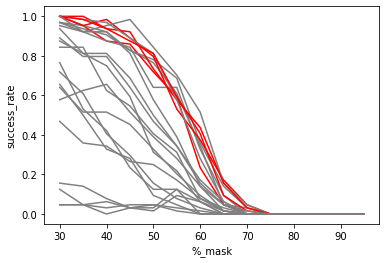

In [ ]:
sns.lineplot(data=dmean_TMB2_21, x=dmean_TMB2_21.index, y=dmean_TMB2_21['success_rate'], color="grey")
sns.lineplot(data=dmean_TMB2_22, x=dmean_TMB2_22.index, y=dmean_TMB2_22['success_rate'], color="grey")
sns.lineplot(data=dmean_TMB2_23, x=dmean_TMB2_23.index, y=dmean_TMB2_23['success_rate'], color="grey")
sns.lineplot(data=dmean_TMB2_24, x=dmean_TMB2_24.index, y=dmean_TMB2_24['success_rate'], color="grey")
sns.lineplot(data=dmean_TMB2_25, x=dmean_TMB2_25.index, y=dmean_TMB2_25['success_rate'], color="grey")
sns.lineplot(data=dmean_TMB2_26, x=dmean_TMB2_26.index, y=dmean_TMB2_26['success_rate'], color="grey")
sns.lineplot(data=dmean_TMB2_27, x=dmean_TMB2_27.index, y=dmean_TMB2_27['success_rate'], color="red")
sns.lineplot(data=dmean_TMB2_28, x=dmean_TMB2_28.index, y=dmean_TMB2_28['success_rate'], color="grey")
sns.lineplot(data=dmean_TMB2_29, x=dmean_TMB2_29.index, y=dmean_TMB2_29['success_rate'], color="grey")
sns.lineplot(data=dmean_TMB2_30, x=dmean_TMB2_30.index, y=dmean_TMB2_30['success_rate'], color="grey")
sns.lineplot(data=dmean_TMB2_31, x=dmean_TMB2_31.index, y=dmean_TMB2_31['success_rate'], color="red")
sns.lineplot(data=dmean_TMB2_32, x=dmean_TMB2_32.index, y=dmean_TMB2_32['success_rate'], color="grey")
sns.lineplot(data=dmean_TMB2_33, x=dmean_TMB2_33.index, y=dmean_TMB2_33['success_rate'], color="grey")
sns.lineplot(data=dmean_TMB2_34, x=dmean_TMB2_34.index, y=dmean_TMB2_34['success_rate'], color="grey")
sns.lineplot(data=dmean_TMB2_35, x=dmean_TMB2_35.index, y=dmean_TMB2_35['success_rate'], color="red")
sns.lineplot(data=dmean_TMB2_36, x=dmean_TMB2_36.index, y=dmean_TMB2_36['success_rate'], color="grey")
sns.lineplot(data=dmean_TMB2_37, x=dmean_TMB2_37.index, y=dmean_TMB2_37['success_rate'], color="grey")
sns.lineplot(data=dmean_TMB2_38, x=dmean_TMB2_38.index, y=dmean_TMB2_38['success_rate'], color="grey")
sns.lineplot(data=dmean_TMB2_39, x=dmean_TMB2_39.index, y=dmean_TMB2_39['success_rate'], color="grey")
#sns.lineplot(data=dmean_TMB2_40, x=dmean_TMB2_40.index, y=dmean_TMB2_40['success_rate'], color="grey")
sns.lineplot(data=dmean_TMB2_41, x=dmean_TMB2_41.index, y=dmean_TMB2_41['success_rate'], color="grey")
sns.lineplot(data=dmean_TMB2_42, x=dmean_TMB2_42.index, y=dmean_TMB2_42['success_rate'], color="grey")
sns.lineplot(data=dmean_TMB2_43, x=dmean_TMB2_43.index, y=dmean_TMB2_43['success_rate'], color="red")
sns.lineplot(data=dmean_TMB2_44, x=dmean_TMB2_44.index, y=dmean_TMB2_44['success_rate'], color="grey")
sns.lineplot(data=dmean_TMB2_45, x=dmean_TMB2_45.index, y=dmean_TMB2_45['success_rate'], color="grey")

In [ ]:
dmean_TMB2_46["success_rate"] = dTMB2_46_pass.ptm/64.0
dmean_TMB2_46['success_rate'] = dmean_TMB2_46['success_rate'].fillna(0)
dmean_TMB2_47["success_rate"] = dTMB2_47_pass.ptm/64.0
dmean_TMB2_47['success_rate'] = dmean_TMB2_47['success_rate'].fillna(0)
dmean_TMB2_48["success_rate"] = dTMB2_48_pass.ptm/64.0
dmean_TMB2_48['success_rate'] = dmean_TMB2_48['success_rate'].fillna(0)
dmean_TMB2_49["success_rate"] = dTMB2_49_pass.ptm/64.0
dmean_TMB2_49['success_rate'] = dmean_TMB2_49['success_rate'].fillna(0)
dmean_TMB2_50["success_rate"] = dTMB2_50_pass.ptm/64.0
dmean_TMB2_50['success_rate'] = dmean_TMB2_50['success_rate'].fillna(0)
dmean_TMB2_51["success_rate"] = dTMB2_51_pass.ptm/64.0
dmean_TMB2_51['success_rate'] = dmean_TMB2_51['success_rate'].fillna(0)
dmean_TMB2_52["success_rate"] = dTMB2_52_pass.ptm/64.0
dmean_TMB2_52['success_rate'] = dmean_TMB2_52['success_rate'].fillna(0)
dmean_TMB2_53["success_rate"] = dTMB2_53_pass.ptm/64.0
dmean_TMB2_53['success_rate'] = dmean_TMB2_53['success_rate'].fillna(0)
dmean_TMB2_54["success_rate"] = dTMB2_54_pass.ptm/64.0
dmean_TMB2_54['success_rate'] = dmean_TMB2_54['success_rate'].fillna(0)
dmean_TMB2_55["success_rate"] = dTMB2_55_pass.ptm/64.0
dmean_TMB2_55['success_rate'] = dmean_TMB2_55['success_rate'].fillna(0)
dmean_TMB2_56["success_rate"] = dTMB2_56_pass.ptm/64.0
dmean_TMB2_56['success_rate'] = dmean_TMB2_56['success_rate'].fillna(0)
dmean_TMB2_57["success_rate"] = dTMB2_57_pass.ptm/64.0
dmean_TMB2_57['success_rate'] = dmean_TMB2_57['success_rate'].fillna(0)
dmean_TMB2_58["success_rate"] = dTMB2_58_pass.ptm/64.0
dmean_TMB2_58['success_rate'] = dmean_TMB2_58['success_rate'].fillna(0)
dmean_TMB2_59["success_rate"] = dTMB2_59_pass.ptm/64.0
dmean_TMB2_59['success_rate'] = dmean_TMB2_59['success_rate'].fillna(0)
dmean_TMB2_60["success_rate"] = dTMB2_60_pass.ptm/64.0
dmean_TMB2_60['success_rate'] = dmean_TMB2_60['success_rate'].fillna(0)
dmean_TMB2_61["success_rate"] = dTMB2_61_pass.ptm/64.0
dmean_TMB2_61['success_rate'] = dmean_TMB2_61['success_rate'].fillna(0)
dmean_TMB2_62["success_rate"] = dTMB2_62_pass.ptm/64.0
dmean_TMB2_62['success_rate'] = dmean_TMB2_62['success_rate'].fillna(0)
dmean_TMB2_63["success_rate"] = dTMB2_63_pass.ptm/64.0
dmean_TMB2_63['success_rate'] = dmean_TMB2_63['success_rate'].fillna(0)
dmean_TMB2_64["success_rate"] = dTMB2_64_pass.ptm/64.0
dmean_TMB2_64['success_rate'] = dmean_TMB2_64['success_rate'].fillna(0)
dmean_TMB2_65["success_rate"] = dTMB2_65_pass.ptm/64.0
dmean_TMB2_65['success_rate'] = dmean_TMB2_65['success_rate'].fillna(0)
dmean_TMB2_66["success_rate"] = dTMB2_66_pass.ptm/64.0
dmean_TMB2_66['success_rate'] = dmean_TMB2_66['success_rate'].fillna(0)
dmean_TMB2_67["success_rate"] = dTMB2_67_pass.ptm/64.0
dmean_TMB2_67['success_rate'] = dmean_TMB2_67['success_rate'].fillna(0)
dmean_TMB2_68["success_rate"] = dTMB2_68_pass.ptm/64.0
dmean_TMB2_68['success_rate'] = dmean_TMB2_68['success_rate'].fillna(0)
dmean_TMB2_69["success_rate"] = dTMB2_69_pass.ptm/64.0
dmean_TMB2_69['success_rate'] = dmean_TMB2_69['success_rate'].fillna(0)
dmean_TMB2_70["success_rate"] = dTMB2_70_pass.ptm/64.0
dmean_TMB2_70['success_rate'] = dmean_TMB2_70['success_rate'].fillna(0)
dmean_TMB2_71["success_rate"] = dTMB2_71_pass.ptm/64.0
dmean_TMB2_71['success_rate'] = dmean_TMB2_71['success_rate'].fillna(0)
dmean_TMB2_72["success_rate"] = dTMB2_72_pass.ptm/64.0
dmean_TMB2_72['success_rate'] = dmean_TMB2_72['success_rate'].fillna(0)
dmean_TMB2_73["success_rate"] = dTMB2_73_pass.ptm/64.0
dmean_TMB2_73['success_rate'] = dmean_TMB2_73['success_rate'].fillna(0)
dmean_TMB2_74["success_rate"] = dTMB2_74_pass.ptm/64.0
dmean_TMB2_74['success_rate'] = dmean_TMB2_74['success_rate'].fillna(0)
dmean_TMB2_75["success_rate"] = dTMB2_75_pass.ptm/64.0
dmean_TMB2_75['success_rate'] = dmean_TMB2_75['success_rate'].fillna(0)

<AxesSubplot:xlabel='%_mask', ylabel='success_rate'>

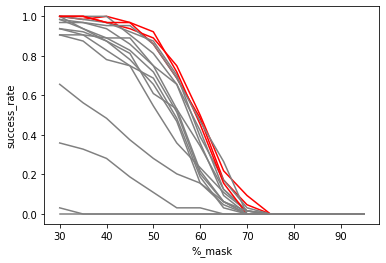

In [ ]:
#sns.lineplot(data=dmean_TMB2_46, x=dmean_TMB2_46.index, y=dmean_TMB2_46['success_rate'], color="grey")
sns.lineplot(data=dmean_TMB2_47, x=dmean_TMB2_47.index, y=dmean_TMB2_47['success_rate'], color="red")
sns.lineplot(data=dmean_TMB2_48, x=dmean_TMB2_48.index, y=dmean_TMB2_48['success_rate'], color="grey")
sns.lineplot(data=dmean_TMB2_49, x=dmean_TMB2_49.index, y=dmean_TMB2_49['success_rate'], color="grey")
sns.lineplot(data=dmean_TMB2_50, x=dmean_TMB2_50.index, y=dmean_TMB2_50['success_rate'], color="grey")
sns.lineplot(data=dmean_TMB2_51, x=dmean_TMB2_51.index, y=dmean_TMB2_51['success_rate'], color="grey")
sns.lineplot(data=dmean_TMB2_52, x=dmean_TMB2_52.index, y=dmean_TMB2_52['success_rate'], color="grey")
#sns.lineplot(data=dmean_TMB2_53, x=dmean_TMB2_53.index, y=dmean_TMB2_53['success_rate'], color="grey")
sns.lineplot(data=dmean_TMB2_54, x=dmean_TMB2_54.index, y=dmean_TMB2_54['success_rate'], color="grey")
sns.lineplot(data=dmean_TMB2_55, x=dmean_TMB2_55.index, y=dmean_TMB2_55['success_rate'], color="grey")
sns.lineplot(data=dmean_TMB2_56, x=dmean_TMB2_56.index, y=dmean_TMB2_56['success_rate'], color="red")
sns.lineplot(data=dmean_TMB2_57, x=dmean_TMB2_57.index, y=dmean_TMB2_57['success_rate'], color="grey")
sns.lineplot(data=dmean_TMB2_58, x=dmean_TMB2_58.index, y=dmean_TMB2_58['success_rate'], color="red")
sns.lineplot(data=dmean_TMB2_59, x=dmean_TMB2_59.index, y=dmean_TMB2_59['success_rate'], color="grey")
sns.lineplot(data=dmean_TMB2_60, x=dmean_TMB2_60.index, y=dmean_TMB2_60['success_rate'], color="grey")
#sns.lineplot(data=dmean_TMB2_61, x=dmean_TMB2_61.index, y=dmean_TMB2_61['success_rate'], color="grey")
sns.lineplot(data=dmean_TMB2_62, x=dmean_TMB2_62.index, y=dmean_TMB2_62['success_rate'], color="grey")
sns.lineplot(data=dmean_TMB2_63, x=dmean_TMB2_63.index, y=dmean_TMB2_63['success_rate'], color="grey")
sns.lineplot(data=dmean_TMB2_64, x=dmean_TMB2_64.index, y=dmean_TMB2_64['success_rate'], color="grey")
sns.lineplot(data=dmean_TMB2_65, x=dmean_TMB2_65.index, y=dmean_TMB2_65['success_rate'], color="grey")

<AxesSubplot:xlabel='%_mask', ylabel='success_rate'>

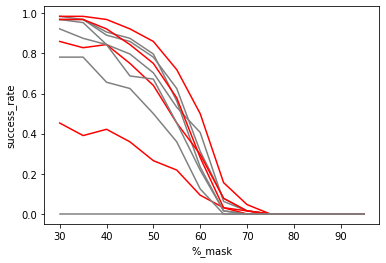

In [ ]:
sns.lineplot(data=dmean_TMB2_66, x=dmean_TMB2_66.index, y=dmean_TMB2_66['success_rate'], color="grey")
sns.lineplot(data=dmean_TMB2_67, x=dmean_TMB2_67.index, y=dmean_TMB2_67['success_rate'], color="grey")
sns.lineplot(data=dmean_TMB2_68, x=dmean_TMB2_68.index, y=dmean_TMB2_68['success_rate'], color="grey")
sns.lineplot(data=dmean_TMB2_69, x=dmean_TMB2_69.index, y=dmean_TMB2_69['success_rate'], color="red")
sns.lineplot(data=dmean_TMB2_70, x=dmean_TMB2_70.index, y=dmean_TMB2_70['success_rate'], color="red")
sns.lineplot(data=dmean_TMB2_71, x=dmean_TMB2_71.index, y=dmean_TMB2_71['success_rate'], color="red")
sns.lineplot(data=dmean_TMB2_72, x=dmean_TMB2_72.index, y=dmean_TMB2_72['success_rate'], color="grey")
sns.lineplot(data=dmean_TMB2_73, x=dmean_TMB2_73.index, y=dmean_TMB2_73['success_rate'], color="red")
sns.lineplot(data=dmean_TMB2_74, x=dmean_TMB2_74.index, y=dmean_TMB2_74['success_rate'], color="grey")
sns.lineplot(data=dmean_TMB2_75, x=dmean_TMB2_75.index, y=dmean_TMB2_75['success_rate'], color="grey")

In [ ]:
dmean_TMB2_76["success_rate"] = dTMB2_76_pass.ptm/64.0
dmean_TMB2_76['success_rate'] = dmean_TMB2_76['success_rate'].fillna(0)
dmean_TMB2_77["success_rate"] = dTMB2_77_pass.ptm/64.0
dmean_TMB2_77['success_rate'] = dmean_TMB2_77['success_rate'].fillna(0)
dmean_TMB2_78["success_rate"] = dTMB2_78_pass.ptm/64.0
dmean_TMB2_78['success_rate'] = dmean_TMB2_78['success_rate'].fillna(0)
dmean_TMB2_79["success_rate"] = dTMB2_79_pass.ptm/64.0
dmean_TMB2_79['success_rate'] = dmean_TMB2_79['success_rate'].fillna(0)
dmean_TMB2_80["success_rate"] = dTMB2_80_pass.ptm/64.0
dmean_TMB2_80['success_rate'] = dmean_TMB2_80['success_rate'].fillna(0)
dmean_TMB2_81["success_rate"] = dTMB2_81_pass.ptm/64.0
dmean_TMB2_81['success_rate'] = dmean_TMB2_81['success_rate'].fillna(0)
dmean_TMB2_82["success_rate"] = dTMB2_82_pass.ptm/64.0
dmean_TMB2_82['success_rate'] = dmean_TMB2_82['success_rate'].fillna(0)
dmean_TMB2_83["success_rate"] = dTMB2_83_pass.ptm/64.0
dmean_TMB2_83['success_rate'] = dmean_TMB2_83['success_rate'].fillna(0)
dmean_TMB2_84["success_rate"] = dTMB2_84_pass.ptm/64.0
dmean_TMB2_84['success_rate'] = dmean_TMB2_84['success_rate'].fillna(0)
dmean_TMB2_85["success_rate"] = dTMB2_85_pass.ptm/64.0
dmean_TMB2_85['success_rate'] = dmean_TMB2_85['success_rate'].fillna(0)
dmean_TMB2_86["success_rate"] = dTMB2_86_pass.ptm/64.0
dmean_TMB2_86['success_rate'] = dmean_TMB2_86['success_rate'].fillna(0)
dmean_TMB2_87["success_rate"] = dTMB2_87_pass.ptm/64.0
dmean_TMB2_87['success_rate'] = dmean_TMB2_87['success_rate'].fillna(0)
dmean_TMB2_88["success_rate"] = dTMB2_88_pass.ptm/64.0
dmean_TMB2_88['success_rate'] = dmean_TMB2_88['success_rate'].fillna(0)
dmean_TMB2_89["success_rate"] = dTMB2_89_pass.ptm/64.0
dmean_TMB2_89['success_rate'] = dmean_TMB2_89['success_rate'].fillna(0)
dmean_TMB2_90["success_rate"] = dTMB2_90_pass.ptm/64.0
dmean_TMB2_90['success_rate'] = dmean_TMB2_90['success_rate'].fillna(0)

dmean_TMB2_89

,ptm,plDDT,plDDT_backbone,success_rate
%_mask,,,,
30,0.758828,73.959195,77.847040,0.734375
35,0.760109,74.430372,78.438369,0.781250
40,0.756672,74.314561,78.365960,0.718750
45,0.745953,73.881174,77.974449,0.656250
50,0.702547,70.607851,74.551097,0.546875
55,0.639469,65.672672,69.303241,0.390625
60,0.525937,56.390505,59.482811,0.250000
65,0.342875,41.124209,43.368045,0.093750
70,0.254188,33.329505,35.079600,0.046875


<AxesSubplot:xlabel='%_mask', ylabel='success_rate'>

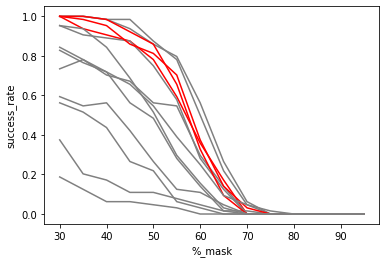

In [ ]:
sns.lineplot(data=dmean_TMB2_76, x=dmean_TMB2_76.index, y=dmean_TMB2_76['success_rate'], color="red")
sns.lineplot(data=dmean_TMB2_77, x=dmean_TMB2_77.index, y=dmean_TMB2_77['success_rate'], color="grey")
sns.lineplot(data=dmean_TMB2_78, x=dmean_TMB2_78.index, y=dmean_TMB2_78['success_rate'], color="grey")
sns.lineplot(data=dmean_TMB2_79, x=dmean_TMB2_79.index, y=dmean_TMB2_79['success_rate'], color="grey")
sns.lineplot(data=dmean_TMB2_80, x=dmean_TMB2_80.index, y=dmean_TMB2_80['success_rate'], color="grey")
sns.lineplot(data=dmean_TMB2_81, x=dmean_TMB2_81.index, y=dmean_TMB2_81['success_rate'], color="grey")
sns.lineplot(data=dmean_TMB2_82, x=dmean_TMB2_82.index, y=dmean_TMB2_82['success_rate'], color="grey")
sns.lineplot(data=dmean_TMB2_83, x=dmean_TMB2_83.index, y=dmean_TMB2_83['success_rate'], color="red")
sns.lineplot(data=dmean_TMB2_84, x=dmean_TMB2_84.index, y=dmean_TMB2_84['success_rate'], color="grey")
sns.lineplot(data=dmean_TMB2_85, x=dmean_TMB2_85.index, y=dmean_TMB2_85['success_rate'], color="red")
sns.lineplot(data=dmean_TMB2_86, x=dmean_TMB2_86.index, y=dmean_TMB2_86['success_rate'], color="grey")
sns.lineplot(data=dmean_TMB2_87, x=dmean_TMB2_87.index, y=dmean_TMB2_87['success_rate'], color="grey")
sns.lineplot(data=dmean_TMB2_88, x=dmean_TMB2_88.index, y=dmean_TMB2_88['success_rate'], color="grey")
sns.lineplot(data=dmean_TMB2_89, x=dmean_TMB2_89.index, y=dmean_TMB2_89['success_rate'], color="grey")
#sns.lineplot(data=dmean_TMB2_90, x=dmean_TMB2_90.index, y=dmean_TMB2_90['success_rate'], color="grey")

(30.0, 85.0)

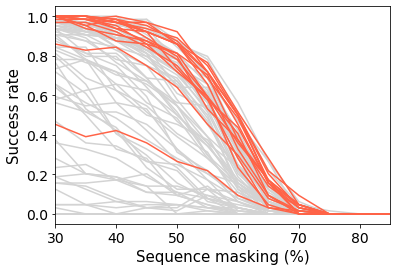

In [ ]:
ax = sns.lineplot(data=dmean_TMB2_1, x=dmean_TMB2_1.index, y=dmean_TMB2_1['success_rate'], color="lightgrey")
sns.lineplot(data=dmean_TMB2_2, x=dmean_TMB2_2.index, y=dmean_TMB2_2['success_rate'], color="lightgrey",ax=ax)
sns.lineplot(data=dmean_TMB2_4, x=dmean_TMB2_4.index, y=dmean_TMB2_4['success_rate'], color="lightgrey",ax=ax)
sns.lineplot(data=dmean_TMB2_5, x=dmean_TMB2_5.index, y=dmean_TMB2_5['success_rate'], color="lightgrey",ax=ax)
sns.lineplot(data=dmean_TMB2_6, x=dmean_TMB2_6.index, y=dmean_TMB2_6['success_rate'], color="lightgrey",ax=ax)
sns.lineplot(data=dmean_TMB2_7, x=dmean_TMB2_7.index, y=dmean_TMB2_7['success_rate'], color="lightgrey",ax=ax)
sns.lineplot(data=dmean_TMB2_8, x=dmean_TMB2_8.index, y=dmean_TMB2_8['success_rate'], color="lightgrey",ax=ax)
sns.lineplot(data=dmean_TMB2_9, x=dmean_TMB2_9.index, y=dmean_TMB2_9['success_rate'], color="lightgrey",ax=ax)
#sns.lineplot(data=dmean_TMB2_10, x=dmean_TMB2_10.index, y=dmean_TMB2_10['success_rate'], color="lightgrey",ax=ax)
#sns.lineplot(data=dmean_TMB2_11, x=dmean_TMB2_11.index, y=dmean_TMB2_11['success_rate'], color="lightgrey",ax=ax)
sns.lineplot(data=dmean_TMB2_12, x=dmean_TMB2_12.index, y=dmean_TMB2_12['success_rate'], color="lightgrey",ax=ax)
#sns.lineplot(data=dmean_TMB2_13, x=dmean_TMB2_13.index, y=dmean_TMB2_13['success_rate'], color="lightgrey",ax=ax)
sns.lineplot(data=dmean_TMB2_14, x=dmean_TMB2_14.index, y=dmean_TMB2_14['success_rate'], color="lightgrey",ax=ax)
sns.lineplot(data=dmean_TMB2_15, x=dmean_TMB2_15.index, y=dmean_TMB2_15['success_rate'], color="lightgrey",ax=ax)
#sns.lineplot(data=dmean_TMB2_16, x=dmean_TMB2_16.index, y=dmean_TMB2_16['success_rate'], color="lightgrey",ax=ax)
sns.lineplot(data=dmean_TMB2_18, x=dmean_TMB2_18.index, y=dmean_TMB2_18['success_rate'], color="lightgrey",ax=ax)
sns.lineplot(data=dmean_TMB2_19, x=dmean_TMB2_19.index, y=dmean_TMB2_19['success_rate'], color="lightgrey",ax=ax)
sns.lineplot(data=dmean_TMB2_20, x=dmean_TMB2_20.index, y=dmean_TMB2_20['success_rate'], color="lightgrey",ax=ax)
sns.lineplot(data=dmean_TMB2_21, x=dmean_TMB2_21.index, y=dmean_TMB2_21['success_rate'], color="lightgrey",ax=ax)
sns.lineplot(data=dmean_TMB2_22, x=dmean_TMB2_22.index, y=dmean_TMB2_22['success_rate'], color="lightgrey",ax=ax)
sns.lineplot(data=dmean_TMB2_23, x=dmean_TMB2_23.index, y=dmean_TMB2_23['success_rate'], color="lightgrey",ax=ax)
sns.lineplot(data=dmean_TMB2_24, x=dmean_TMB2_24.index, y=dmean_TMB2_24['success_rate'], color="lightgrey",ax=ax)
sns.lineplot(data=dmean_TMB2_25, x=dmean_TMB2_25.index, y=dmean_TMB2_25['success_rate'], color="lightgrey",ax=ax)
sns.lineplot(data=dmean_TMB2_26, x=dmean_TMB2_26.index, y=dmean_TMB2_26['success_rate'], color="lightgrey",ax=ax)
sns.lineplot(data=dmean_TMB2_28, x=dmean_TMB2_28.index, y=dmean_TMB2_28['success_rate'], color="lightgrey",ax=ax)
sns.lineplot(data=dmean_TMB2_29, x=dmean_TMB2_29.index, y=dmean_TMB2_29['success_rate'], color="lightgrey",ax=ax)
sns.lineplot(data=dmean_TMB2_30, x=dmean_TMB2_30.index, y=dmean_TMB2_30['success_rate'], color="lightgrey",ax=ax)
sns.lineplot(data=dmean_TMB2_32, x=dmean_TMB2_32.index, y=dmean_TMB2_32['success_rate'], color="lightgrey",ax=ax)
sns.lineplot(data=dmean_TMB2_33, x=dmean_TMB2_33.index, y=dmean_TMB2_33['success_rate'], color="lightgrey",ax=ax)
sns.lineplot(data=dmean_TMB2_34, x=dmean_TMB2_34.index, y=dmean_TMB2_34['success_rate'], color="lightgrey",ax=ax)
sns.lineplot(data=dmean_TMB2_36, x=dmean_TMB2_36.index, y=dmean_TMB2_36['success_rate'], color="lightgrey",ax=ax)
sns.lineplot(data=dmean_TMB2_37, x=dmean_TMB2_37.index, y=dmean_TMB2_37['success_rate'], color="lightgrey",ax=ax)
sns.lineplot(data=dmean_TMB2_38, x=dmean_TMB2_38.index, y=dmean_TMB2_38['success_rate'], color="lightgrey",ax=ax)
sns.lineplot(data=dmean_TMB2_39, x=dmean_TMB2_39.index, y=dmean_TMB2_39['success_rate'], color="lightgrey",ax=ax)
#sns.lineplot(data=dmean_TMB2_40, x=dmean_TMB2_40.index, y=dmean_TMB2_40['success_rate'], color="lightgrey",ax=ax)
sns.lineplot(data=dmean_TMB2_41, x=dmean_TMB2_41.index, y=dmean_TMB2_41['success_rate'], color="lightgrey",ax=ax)
sns.lineplot(data=dmean_TMB2_42, x=dmean_TMB2_42.index, y=dmean_TMB2_42['success_rate'], color="lightgrey",ax=ax)
sns.lineplot(data=dmean_TMB2_44, x=dmean_TMB2_44.index, y=dmean_TMB2_44['success_rate'], color="lightgrey",ax=ax)
sns.lineplot(data=dmean_TMB2_45, x=dmean_TMB2_45.index, y=dmean_TMB2_45['success_rate'], color="lightgrey",ax=ax)
#sns.lineplot(data=dmean_TMB2_46, x=dmean_TMB2_46.index, y=dmean_TMB2_46['success_rate'], color="lightgrey",ax=ax)
sns.lineplot(data=dmean_TMB2_48, x=dmean_TMB2_48.index, y=dmean_TMB2_48['success_rate'], color="lightgrey",ax=ax)
sns.lineplot(data=dmean_TMB2_49, x=dmean_TMB2_49.index, y=dmean_TMB2_49['success_rate'], color="lightgrey",ax=ax)
sns.lineplot(data=dmean_TMB2_50, x=dmean_TMB2_50.index, y=dmean_TMB2_50['success_rate'], color="lightgrey",ax=ax)
sns.lineplot(data=dmean_TMB2_51, x=dmean_TMB2_51.index, y=dmean_TMB2_51['success_rate'], color="lightgrey",ax=ax)
sns.lineplot(data=dmean_TMB2_52, x=dmean_TMB2_52.index, y=dmean_TMB2_52['success_rate'], color="lightgrey",ax=ax)
#sns.lineplot(data=dmean_TMB2_53, x=dmean_TMB2_53.index, y=dmean_TMB2_53['success_rate'], color="lightgrey",ax=ax)
sns.lineplot(data=dmean_TMB2_54, x=dmean_TMB2_54.index, y=dmean_TMB2_54['success_rate'], color="lightgrey",ax=ax)
sns.lineplot(data=dmean_TMB2_55, x=dmean_TMB2_55.index, y=dmean_TMB2_55['success_rate'], color="lightgrey",ax=ax)
sns.lineplot(data=dmean_TMB2_57, x=dmean_TMB2_57.index, y=dmean_TMB2_57['success_rate'], color="lightgrey",ax=ax)
sns.lineplot(data=dmean_TMB2_59, x=dmean_TMB2_59.index, y=dmean_TMB2_59['success_rate'], color="lightgrey",ax=ax)
sns.lineplot(data=dmean_TMB2_60, x=dmean_TMB2_60.index, y=dmean_TMB2_60['success_rate'], color="lightgrey",ax=ax)
#sns.lineplot(data=dmean_TMB2_61, x=dmean_TMB2_61.index, y=dmean_TMB2_61['success_rate'], color="lightgrey",ax=ax)
sns.lineplot(data=dmean_TMB2_62, x=dmean_TMB2_62.index, y=dmean_TMB2_62['success_rate'], color="lightgrey",ax=ax)
sns.lineplot(data=dmean_TMB2_63, x=dmean_TMB2_63.index, y=dmean_TMB2_63['success_rate'], color="lightgrey",ax=ax)
sns.lineplot(data=dmean_TMB2_64, x=dmean_TMB2_64.index, y=dmean_TMB2_64['success_rate'], color="lightgrey",ax=ax)
sns.lineplot(data=dmean_TMB2_65, x=dmean_TMB2_65.index, y=dmean_TMB2_65['success_rate'], color="lightgrey",ax=ax)
sns.lineplot(data=dmean_TMB2_66, x=dmean_TMB2_66.index, y=dmean_TMB2_66['success_rate'], color="lightgrey",ax=ax)
sns.lineplot(data=dmean_TMB2_67, x=dmean_TMB2_67.index, y=dmean_TMB2_67['success_rate'], color="lightgrey",ax=ax)
sns.lineplot(data=dmean_TMB2_68, x=dmean_TMB2_68.index, y=dmean_TMB2_68['success_rate'], color="lightgrey",ax=ax)
sns.lineplot(data=dmean_TMB2_72, x=dmean_TMB2_72.index, y=dmean_TMB2_72['success_rate'], color="lightgrey",ax=ax)
sns.lineplot(data=dmean_TMB2_74, x=dmean_TMB2_74.index, y=dmean_TMB2_74['success_rate'], color="lightgrey",ax=ax)
sns.lineplot(data=dmean_TMB2_75, x=dmean_TMB2_75.index, y=dmean_TMB2_75['success_rate'], color="lightgrey",ax=ax)
sns.lineplot(data=dmean_TMB2_77, x=dmean_TMB2_77.index, y=dmean_TMB2_77['success_rate'], color="lightgrey",ax=ax)
sns.lineplot(data=dmean_TMB2_78, x=dmean_TMB2_78.index, y=dmean_TMB2_78['success_rate'], color="lightgrey",ax=ax)
sns.lineplot(data=dmean_TMB2_79, x=dmean_TMB2_79.index, y=dmean_TMB2_79['success_rate'], color="lightgrey",ax=ax)
sns.lineplot(data=dmean_TMB2_80, x=dmean_TMB2_80.index, y=dmean_TMB2_80['success_rate'], color="lightgrey",ax=ax)
sns.lineplot(data=dmean_TMB2_81, x=dmean_TMB2_81.index, y=dmean_TMB2_81['success_rate'], color="lightgrey",ax=ax)
sns.lineplot(data=dmean_TMB2_82, x=dmean_TMB2_82.index, y=dmean_TMB2_82['success_rate'], color="lightgrey",ax=ax)
sns.lineplot(data=dmean_TMB2_84, x=dmean_TMB2_84.index, y=dmean_TMB2_84['success_rate'], color="lightgrey",ax=ax)
sns.lineplot(data=dmean_TMB2_86, x=dmean_TMB2_86.index, y=dmean_TMB2_86['success_rate'], color="lightgrey",ax=ax)
sns.lineplot(data=dmean_TMB2_87, x=dmean_TMB2_87.index, y=dmean_TMB2_87['success_rate'], color="lightgrey",ax=ax)
sns.lineplot(data=dmean_TMB2_88, x=dmean_TMB2_88.index, y=dmean_TMB2_88['success_rate'], color="lightgrey",ax=ax)
sns.lineplot(data=dmean_TMB2_89, x=dmean_TMB2_89.index, y=dmean_TMB2_89['success_rate'], color="lightgrey",ax=ax)
#sns.lineplot(data=dmean_TMB2_90, x=dmean_TMB2_90.index, y=dmean_TMB2_90['success_rate'], color="lightgrey",ax=ax)
sns.lineplot(data=dmean_TMB2_3, x=dmean_TMB2_3.index, y=dmean_TMB2_3['success_rate'], color="tomato",ax=ax)
sns.lineplot(data=dmean_TMB2_17, x=dmean_TMB2_17.index, y=dmean_TMB2_17['success_rate'], color="tomato",ax=ax)
sns.lineplot(data=dmean_TMB2_27, x=dmean_TMB2_27.index, y=dmean_TMB2_27['success_rate'], color="tomato",ax=ax)
sns.lineplot(data=dmean_TMB2_31, x=dmean_TMB2_31.index, y=dmean_TMB2_31['success_rate'], color="tomato",ax=ax)
sns.lineplot(data=dmean_TMB2_35, x=dmean_TMB2_35.index, y=dmean_TMB2_35['success_rate'], color="tomato",ax=ax)
sns.lineplot(data=dmean_TMB2_43, x=dmean_TMB2_43.index, y=dmean_TMB2_43['success_rate'], color="tomato",ax=ax)
sns.lineplot(data=dmean_TMB2_47, x=dmean_TMB2_47.index, y=dmean_TMB2_47['success_rate'], color="tomato",ax=ax)
sns.lineplot(data=dmean_TMB2_56, x=dmean_TMB2_56.index, y=dmean_TMB2_56['success_rate'], color="tomato",ax=ax)
sns.lineplot(data=dmean_TMB2_58, x=dmean_TMB2_58.index, y=dmean_TMB2_58['success_rate'], color="tomato",ax=ax)
sns.lineplot(data=dmean_TMB2_69, x=dmean_TMB2_69.index, y=dmean_TMB2_69['success_rate'], color="tomato",ax=ax)
sns.lineplot(data=dmean_TMB2_70, x=dmean_TMB2_70.index, y=dmean_TMB2_70['success_rate'], color="tomato",ax=ax)
sns.lineplot(data=dmean_TMB2_71, x=dmean_TMB2_71.index, y=dmean_TMB2_71['success_rate'], color="tomato",ax=ax)
sns.lineplot(data=dmean_TMB2_73, x=dmean_TMB2_73.index, y=dmean_TMB2_73['success_rate'], color="tomato",ax=ax)
sns.lineplot(data=dmean_TMB2_76, x=dmean_TMB2_76.index, y=dmean_TMB2_76['success_rate'], color="tomato",ax=ax)
sns.lineplot(data=dmean_TMB2_83, x=dmean_TMB2_83.index, y=dmean_TMB2_83['success_rate'], color="tomato",ax=ax)
sns.lineplot(data=dmean_TMB2_85, x=dmean_TMB2_85.index, y=dmean_TMB2_85['success_rate'], color="tomato",ax=ax)

ax.set_xlabel("Sequence masking (%)",fontsize=15)
ax.set_ylabel("Success rate",fontsize=15)
ax.tick_params(labelsize=14)
plt.xlim(30, 85)

<AxesSubplot:xlabel='%_mask', ylabel='ptm'>

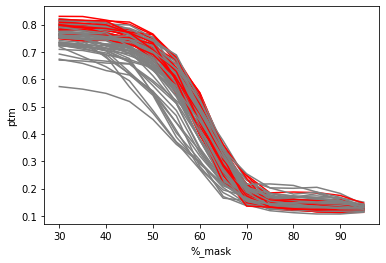

In [ ]:
sns.lineplot(data=dmean_TMB2_1, x=dmean_TMB2_1.index, y=dmean_TMB2_1.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_2, x=dmean_TMB2_2.index, y=dmean_TMB2_2.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_3, x=dmean_TMB2_3.index, y=dmean_TMB2_3.ptm, color="red")
sns.lineplot(data=dmean_TMB2_4, x=dmean_TMB2_4.index, y=dmean_TMB2_4.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_5, x=dmean_TMB2_5.index, y=dmean_TMB2_5.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_6, x=dmean_TMB2_6.index, y=dmean_TMB2_6.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_7, x=dmean_TMB2_7.index, y=dmean_TMB2_7.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_8, x=dmean_TMB2_8.index, y=dmean_TMB2_8.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_9, x=dmean_TMB2_9.index, y=dmean_TMB2_9.ptm, color="grey")
#sns.lineplot(data=dmean_TMB2_10, x=dmean_TMB2_10.index, y=dmean_TMB2_10.ptm, color="grey")
#sns.lineplot(data=dmean_TMB2_11, x=dmean_TMB2_11.index, y=dmean_TMB2_11.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_12, x=dmean_TMB2_12.index, y=dmean_TMB2_12.ptm, color="grey")
#sns.lineplot(data=dmean_TMB2_13, x=dmean_TMB2_13.index, y=dmean_TMB2_13.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_14, x=dmean_TMB2_14.index, y=dmean_TMB2_14.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_15, x=dmean_TMB2_15.index, y=dmean_TMB2_15.ptm, color="grey")
#sns.lineplot(data=dmean_TMB2_16, x=dmean_TMB2_16.index, y=dmean_TMB2_16.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_17, x=dmean_TMB2_17.index, y=dmean_TMB2_17.ptm, color="red")
sns.lineplot(data=dmean_TMB2_18, x=dmean_TMB2_18.index, y=dmean_TMB2_18.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_19, x=dmean_TMB2_19.index, y=dmean_TMB2_19.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_20, x=dmean_TMB2_20.index, y=dmean_TMB2_20.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_21, x=dmean_TMB2_21.index, y=dmean_TMB2_21.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_22, x=dmean_TMB2_22.index, y=dmean_TMB2_22.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_23, x=dmean_TMB2_23.index, y=dmean_TMB2_23.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_24, x=dmean_TMB2_24.index, y=dmean_TMB2_24.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_25, x=dmean_TMB2_25.index, y=dmean_TMB2_25.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_26, x=dmean_TMB2_26.index, y=dmean_TMB2_26.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_27, x=dmean_TMB2_27.index, y=dmean_TMB2_27.ptm, color="red")
sns.lineplot(data=dmean_TMB2_28, x=dmean_TMB2_28.index, y=dmean_TMB2_28.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_29, x=dmean_TMB2_29.index, y=dmean_TMB2_29.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_30, x=dmean_TMB2_30.index, y=dmean_TMB2_30.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_31, x=dmean_TMB2_31.index, y=dmean_TMB2_31.ptm, color="red")
sns.lineplot(data=dmean_TMB2_32, x=dmean_TMB2_32.index, y=dmean_TMB2_32.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_33, x=dmean_TMB2_33.index, y=dmean_TMB2_33.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_34, x=dmean_TMB2_34.index, y=dmean_TMB2_34.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_35, x=dmean_TMB2_35.index, y=dmean_TMB2_35.ptm, color="red")
sns.lineplot(data=dmean_TMB2_36, x=dmean_TMB2_36.index, y=dmean_TMB2_36.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_37, x=dmean_TMB2_37.index, y=dmean_TMB2_37.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_38, x=dmean_TMB2_38.index, y=dmean_TMB2_38.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_39, x=dmean_TMB2_39.index, y=dmean_TMB2_39.ptm, color="grey")
#sns.lineplot(data=dmean_TMB2_40, x=dmean_TMB2_40.index, y=dmean_TMB2_40.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_41, x=dmean_TMB2_41.index, y=dmean_TMB2_41.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_42, x=dmean_TMB2_42.index, y=dmean_TMB2_42.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_43, x=dmean_TMB2_43.index, y=dmean_TMB2_43.ptm, color="red")
sns.lineplot(data=dmean_TMB2_44, x=dmean_TMB2_44.index, y=dmean_TMB2_44.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_45, x=dmean_TMB2_45.index, y=dmean_TMB2_45.ptm, color="grey")
#sns.lineplot(data=dmean_TMB2_46, x=dmean_TMB2_46.index, y=dmean_TMB2_46.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_47, x=dmean_TMB2_47.index, y=dmean_TMB2_47.ptm, color="red")
sns.lineplot(data=dmean_TMB2_48, x=dmean_TMB2_48.index, y=dmean_TMB2_48.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_49, x=dmean_TMB2_49.index, y=dmean_TMB2_49.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_50, x=dmean_TMB2_50.index, y=dmean_TMB2_50.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_51, x=dmean_TMB2_51.index, y=dmean_TMB2_51.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_52, x=dmean_TMB2_52.index, y=dmean_TMB2_52.ptm, color="grey")
#sns.lineplot(data=dmean_TMB2_53, x=dmean_TMB2_53.index, y=dmean_TMB2_53.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_54, x=dmean_TMB2_54.index, y=dmean_TMB2_54.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_55, x=dmean_TMB2_55.index, y=dmean_TMB2_55.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_56, x=dmean_TMB2_56.index, y=dmean_TMB2_56.ptm, color="red")
sns.lineplot(data=dmean_TMB2_57, x=dmean_TMB2_57.index, y=dmean_TMB2_57.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_58, x=dmean_TMB2_58.index, y=dmean_TMB2_58.ptm, color="red")
sns.lineplot(data=dmean_TMB2_59, x=dmean_TMB2_59.index, y=dmean_TMB2_59.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_60, x=dmean_TMB2_60.index, y=dmean_TMB2_60.ptm, color="grey")
#sns.lineplot(data=dmean_TMB2_61, x=dmean_TMB2_61.index, y=dmean_TMB2_61.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_62, x=dmean_TMB2_62.index, y=dmean_TMB2_62.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_63, x=dmean_TMB2_63.index, y=dmean_TMB2_63.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_64, x=dmean_TMB2_64.index, y=dmean_TMB2_64.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_65, x=dmean_TMB2_65.index, y=dmean_TMB2_65.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_66, x=dmean_TMB2_66.index, y=dmean_TMB2_66.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_67, x=dmean_TMB2_67.index, y=dmean_TMB2_67.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_68, x=dmean_TMB2_68.index, y=dmean_TMB2_68.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_69, x=dmean_TMB2_69.index, y=dmean_TMB2_69.ptm, color="red")
sns.lineplot(data=dmean_TMB2_70, x=dmean_TMB2_70.index, y=dmean_TMB2_70.ptm, color="red")
sns.lineplot(data=dmean_TMB2_71, x=dmean_TMB2_71.index, y=dmean_TMB2_71.ptm, color="red")
sns.lineplot(data=dmean_TMB2_72, x=dmean_TMB2_72.index, y=dmean_TMB2_72.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_73, x=dmean_TMB2_73.index, y=dmean_TMB2_73.ptm, color="red")
sns.lineplot(data=dmean_TMB2_74, x=dmean_TMB2_74.index, y=dmean_TMB2_74.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_75, x=dmean_TMB2_75.index, y=dmean_TMB2_75.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_76, x=dmean_TMB2_76.index, y=dmean_TMB2_76.ptm, color="red")
sns.lineplot(data=dmean_TMB2_77, x=dmean_TMB2_77.index, y=dmean_TMB2_77.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_78, x=dmean_TMB2_78.index, y=dmean_TMB2_78.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_79, x=dmean_TMB2_79.index, y=dmean_TMB2_79.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_80, x=dmean_TMB2_80.index, y=dmean_TMB2_80.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_81, x=dmean_TMB2_81.index, y=dmean_TMB2_81.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_82, x=dmean_TMB2_82.index, y=dmean_TMB2_82.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_83, x=dmean_TMB2_83.index, y=dmean_TMB2_83.ptm, color="red")
sns.lineplot(data=dmean_TMB2_84, x=dmean_TMB2_84.index, y=dmean_TMB2_84.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_85, x=dmean_TMB2_85.index, y=dmean_TMB2_85.ptm, color="red")
sns.lineplot(data=dmean_TMB2_86, x=dmean_TMB2_86.index, y=dmean_TMB2_86.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_87, x=dmean_TMB2_87.index, y=dmean_TMB2_87.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_88, x=dmean_TMB2_88.index, y=dmean_TMB2_88.ptm, color="grey")
sns.lineplot(data=dmean_TMB2_89, x=dmean_TMB2_89.index, y=dmean_TMB2_89.ptm, color="grey")
#sns.lineplot(data=dmean_TMB2_90, x=dmean_TMB2_90.index, y=dmean_TMB2_90.ptm, color="grey")

In [ ]:
dHBI_b_1_filt = dHBI_b_1.loc[dHBI_b_1.ptm >=0.75]
dHBI_b_2_filt = dHBI_b_2.loc[dHBI_b_2.ptm >=0.75]
dHBI_b_3_filt = dHBI_b_3.loc[dHBI_b_3.ptm >=0.75]
dHBI_b_4_filt = dHBI_b_4.loc[dHBI_b_4.ptm >=0.75]
#dHBI_b_5_filt = dHBI_b_5.loc[dHBI_b_5.ptm >=0.75]
#dHBI_b_6_filt = dHBI_b_6.loc[dHBI_b_6.ptm >=0.75]
dHBI_b_7_filt = dHBI_b_7.loc[dHBI_b_7.ptm >=0.75]
dHBI_b_8_filt = dHBI_b_8.loc[dHBI_b_8.ptm >=0.75]
dHBI_b_9_filt = dHBI_b_9.loc[dHBI_b_9.ptm >=0.75]
#dHBI_b_10_filt = dHBI_b_10.loc[dHBI_b_10.ptm >=0.75]
#dHBI_b_11_filt = dHBI_b_11.loc[dHBI_b_11.ptm >=0.75]
#dHBI_b_12_filt = dHBI_b_12.loc[dHBI_b_12.ptm >=0.75]
dHBI_b_13_filt = dHBI_b_13.loc[dHBI_b_13.ptm >=0.75]
dHBI_b_14_filt = dHBI_b_14.loc[dHBI_b_14.ptm >=0.75]
dHBI_b_15_filt = dHBI_b_15.loc[dHBI_b_15.ptm >=0.75]
dHBI_b_16_filt = dHBI_b_16.loc[dHBI_b_16.ptm >=0.75]
dHBI_b_17_filt = dHBI_b_17.loc[dHBI_b_17.ptm >=0.75]
#dHBI_b_18_filt = dHBI_b_18.loc[dHBI_b_18.ptm >=0.75]
dHBI_b_19_filt = dHBI_b_19.loc[dHBI_b_19.ptm >=0.75]
dHBI_b_20_filt = dHBI_b_20.loc[dHBI_b_20.ptm >=0.75]
dHBI_b_21_filt = dHBI_b_21.loc[dHBI_b_21.ptm >=0.75]
dHBI_b_22_filt = dHBI_b_22.loc[dHBI_b_22.ptm >=0.75]
dHBI_b_23_filt = dHBI_b_23.loc[dHBI_b_23.ptm >=0.75]
#dHBI_b_24_filt = dHBI_b_24.loc[dHBI_b_24.ptm >=0.75]
dHBI_b_25_filt = dHBI_b_25.loc[dHBI_b_25.ptm >=0.75]
dHBI_b_26_filt = dHBI_b_26.loc[dHBI_b_26.ptm >=0.75]
dHBI_b_27_filt = dHBI_b_27.loc[dHBI_b_27.ptm >=0.75]
dHBI_b_28_filt = dHBI_b_28.loc[dHBI_b_28.ptm >=0.75]
dHBI_b_29_filt = dHBI_b_29.loc[dHBI_b_29.ptm >=0.75]
#dHBI_b_30_filt = dHBI_b_30.loc[dHBI_b_30.ptm >=0.75]
dHBI_b_31_filt = dHBI_b_31.loc[dHBI_b_31.ptm >=0.75]
dHBI_b_32_filt = dHBI_b_32.loc[dHBI_b_32.ptm >=0.75]
dHBI_b_33_filt = dHBI_b_33.loc[dHBI_b_33.ptm >=0.75]
dHBI_b_34_filt = dHBI_b_34.loc[dHBI_b_34.ptm >=0.75]
dHBI_b_35_filt = dHBI_b_35.loc[dHBI_b_35.ptm >=0.75]
#dHBI_b_36_filt = dHBI_b_36.loc[dHBI_b_36.ptm >=0.75]
dHBI_b_37_filt = dHBI_b_37.loc[dHBI_b_37.ptm >=0.75]
dHBI_b_38_filt = dHBI_b_38.loc[dHBI_b_38.ptm >=0.75]
dHBI_b_39_filt = dHBI_b_39.loc[dHBI_b_39.ptm >=0.75]
dHBI_b_40_filt = dHBI_b_40.loc[dHBI_b_40.ptm >=0.75]
dHBI_b_41_filt = dHBI_b_41.loc[dHBI_b_41.ptm >=0.75]
#dHBI_b_42_filt = dHBI_b_42.loc[dHBI_b_42.ptm >=0.75]
dHBI_b_43_filt = dHBI_b_43.loc[dHBI_b_43.ptm >=0.75]
dHBI_b_44_filt = dHBI_b_44.loc[dHBI_b_44.ptm >=0.75]
dHBI_b_45_filt = dHBI_b_45.loc[dHBI_b_45.ptm >=0.75]
dHBI_b_46_filt = dHBI_b_46.loc[dHBI_b_46.ptm >=0.75]
#dHBI_b_47_filt = dHBI_b_47.loc[dHBI_b_47.ptm >=0.75]
#dHBI_b_48_filt = dHBI_b_48.loc[dHBI_b_48.ptm >=0.75]
dHBI_b_49_filt = dHBI_b_49.loc[dHBI_b_49.ptm >=0.75]
dHBI_b_50_filt = dHBI_b_50.loc[dHBI_b_50.ptm >=0.75]
#dHBI_b_51_filt = dHBI_b_51.loc[dHBI_b_51.ptm >=0.75]
#dHBI_b_52_filt = dHBI_b_52.loc[dHBI_b_52.ptm >=0.75]
dHBI_b_53_filt = dHBI_b_53.loc[dHBI_b_53.ptm >=0.75]
#dHBI_b_54_filt = dHBI_b_54.loc[dHBI_b_54.ptm >=0.75]
dHBI_b_55_filt = dHBI_b_55.loc[dHBI_b_55.ptm >=0.75]
dHBI_b_56_filt = dHBI_b_56.loc[dHBI_b_56.ptm >=0.75]

dHBI_b_1_pass = dHBI_b_1_filt.groupby(level=0).count()
dHBI_b_2_pass = dHBI_b_2_filt.groupby(level=0).count()
dHBI_b_3_pass = dHBI_b_3_filt.groupby(level=0).count()
dHBI_b_4_pass = dHBI_b_4_filt.groupby(level=0).count()
#dHBI_b_5_pass = dHBI_b_5_filt.groupby(level=0).count()
#dHBI_b_6_pass = dHBI_b_6_filt.groupby(level=0).count()
dHBI_b_7_pass = dHBI_b_7_filt.groupby(level=0).count()
dHBI_b_8_pass = dHBI_b_8_filt.groupby(level=0).count()
dHBI_b_9_pass = dHBI_b_9_filt.groupby(level=0).count()
#dHBI_b_10_pass = dHBI_b_10_filt.groupby(level=0).count()
#dHBI_b_11_pass = dHBI_b_11_filt.groupby(level=0).count()
#dHBI_b_12_pass = dHBI_b_12_filt.groupby(level=0).count()
dHBI_b_13_pass = dHBI_b_13_filt.groupby(level=0).count()
dHBI_b_14_pass = dHBI_b_14_filt.groupby(level=0).count()
dHBI_b_15_pass = dHBI_b_15_filt.groupby(level=0).count()
dHBI_b_16_pass = dHBI_b_16_filt.groupby(level=0).count()
dHBI_b_17_pass = dHBI_b_17_filt.groupby(level=0).count()
#dHBI_b_18_pass = dHBI_b_18_filt.groupby(level=0).count()
dHBI_b_19_pass = dHBI_b_19_filt.groupby(level=0).count()
dHBI_b_20_pass = dHBI_b_20_filt.groupby(level=0).count()
dHBI_b_21_pass = dHBI_b_21_filt.groupby(level=0).count()
dHBI_b_22_pass = dHBI_b_22_filt.groupby(level=0).count()
dHBI_b_23_pass = dHBI_b_23_filt.groupby(level=0).count()
#dHBI_b_24_pass = dHBI_b_24_filt.groupby(level=0).count()
dHBI_b_25_pass = dHBI_b_25_filt.groupby(level=0).count()
dHBI_b_26_pass = dHBI_b_26_filt.groupby(level=0).count()
dHBI_b_27_pass = dHBI_b_27_filt.groupby(level=0).count()
dHBI_b_28_pass = dHBI_b_28_filt.groupby(level=0).count()
dHBI_b_29_pass = dHBI_b_29_filt.groupby(level=0).count()
#dHBI_b_30_pass = dHBI_b_30_filt.groupby(level=0).count()
dHBI_b_31_pass = dHBI_b_31_filt.groupby(level=0).count()
dHBI_b_32_pass = dHBI_b_32_filt.groupby(level=0).count()
dHBI_b_33_pass = dHBI_b_33_filt.groupby(level=0).count()
dHBI_b_34_pass = dHBI_b_34_filt.groupby(level=0).count()
dHBI_b_35_pass = dHBI_b_35_filt.groupby(level=0).count()
#dHBI_b_36_pass = dHBI_b_36_filt.groupby(level=0).count()
dHBI_b_37_pass = dHBI_b_37_filt.groupby(level=0).count()
dHBI_b_38_pass = dHBI_b_38_filt.groupby(level=0).count()
dHBI_b_39_pass = dHBI_b_39_filt.groupby(level=0).count()
dHBI_b_40_pass = dHBI_b_40_filt.groupby(level=0).count()
dHBI_b_41_pass = dHBI_b_41_filt.groupby(level=0).count()
#dHBI_b_42_pass = dHBI_b_42_filt.groupby(level=0).count()
dHBI_b_43_pass = dHBI_b_43_filt.groupby(level=0).count()
dHBI_b_44_pass = dHBI_b_44_filt.groupby(level=0).count()
dHBI_b_45_pass = dHBI_b_45_filt.groupby(level=0).count()
dHBI_b_46_pass = dHBI_b_46_filt.groupby(level=0).count()
#dHBI_b_47_pass = dHBI_b_47_filt.groupby(level=0).count()
#dHBI_b_48_pass = dHBI_b_48_filt.groupby(level=0).count()
dHBI_b_49_pass = dHBI_b_49_filt.groupby(level=0).count()
dHBI_b_50_pass = dHBI_b_50_filt.groupby(level=0).count()
#dHBI_b_51_pass = dHBI_b_51_filt.groupby(level=0).count()
#dHBI_b_52_pass = dHBI_b_52_filt.groupby(level=0).count()
dHBI_b_53_pass = dHBI_b_53_filt.groupby(level=0).count()
#dHBI_b_54_pass = dHBI_b_54_filt.groupby(level=0).count()
dHBI_b_55_pass = dHBI_b_55_filt.groupby(level=0).count()
dHBI_b_56_pass = dHBI_b_56_filt.groupby(level=0).count()

In [ ]:
dmean_HBI_b_1["success_rate"] = dHBI_b_1_pass.ptm/64.0
dmean_HBI_b_1['success_rate'] = dmean_HBI_b_1['success_rate'].fillna(0)
dmean_HBI_b_2["success_rate"] = dHBI_b_2_pass.ptm/64.0
dmean_HBI_b_2['success_rate'] = dmean_HBI_b_2['success_rate'].fillna(0)
dmean_HBI_b_3["success_rate"] = dHBI_b_3_pass.ptm/64.0
dmean_HBI_b_3['success_rate'] = dmean_HBI_b_3['success_rate'].fillna(0)
dmean_HBI_b_4["success_rate"] = dHBI_b_4_pass.ptm/64.0
dmean_HBI_b_4['success_rate'] = dmean_HBI_b_4['success_rate'].fillna(0)
#dmean_HBI_b_5["success_rate"] = dHBI_b_5_pass.ptm/64.0
#dmean_HBI_b_5['success_rate'] = dmean_HBI_b_5['success_rate'].fillna(0)
#dmean_HBI_b_6["success_rate"] = dHBI_b_6_pass.ptm/64.0
#dmean_HBI_b_6['success_rate'] = dmean_HBI_b_6['success_rate'].fillna(0)
dmean_HBI_b_7["success_rate"] = dHBI_b_7_pass.ptm/64.0
dmean_HBI_b_7['success_rate'] = dmean_HBI_b_7['success_rate'].fillna(0)
dmean_HBI_b_8["success_rate"] = dHBI_b_8_pass.ptm/64.0
dmean_HBI_b_8['success_rate'] = dmean_HBI_b_8['success_rate'].fillna(0)
dmean_HBI_b_9["success_rate"] = dHBI_b_9_pass.ptm/64.0
dmean_HBI_b_9['success_rate'] = dmean_HBI_b_9['success_rate'].fillna(0)
#dmean_HBI_b_10["success_rate"] = dHBI_b_10_pass.ptm/64.0
#dmean_HBI_b_10['success_rate'] = dmean_HBI_b_10['success_rate'].fillna(0)
#dmean_HBI_b_11["success_rate"] = dHBI_b_11_pass.ptm/64.0
#dmean_HBI_b_11['success_rate'] = dmean_HBI_b_11['success_rate'].fillna(0)
#dmean_HBI_b_12["success_rate"] = dHBI_b_12_pass.ptm/64.0
#dmean_HBI_b_12['success_rate'] = dmean_HBI_b_12['success_rate'].fillna(0)
dmean_HBI_b_13["success_rate"] = dHBI_b_13_pass.ptm/64.0
dmean_HBI_b_13['success_rate'] = dmean_HBI_b_13['success_rate'].fillna(0)
dmean_HBI_b_14["success_rate"] = dHBI_b_14_pass.ptm/64.0
dmean_HBI_b_14['success_rate'] = dmean_HBI_b_14['success_rate'].fillna(0)
dmean_HBI_b_15["success_rate"] = dHBI_b_15_pass.ptm/64.0
dmean_HBI_b_15['success_rate'] = dmean_HBI_b_15['success_rate'].fillna(0)
dmean_HBI_b_16["success_rate"] = dHBI_b_16_pass.ptm/64.0
dmean_HBI_b_16['success_rate'] = dmean_HBI_b_16['success_rate'].fillna(0)
dmean_HBI_b_17["success_rate"] = dHBI_b_17_pass.ptm/64.0
dmean_HBI_b_17['success_rate'] = dmean_HBI_b_17['success_rate'].fillna(0)
#dmean_HBI_b_18["success_rate"] = dHBI_b_18_pass.ptm/64.0
#dmean_HBI_b_18['success_rate'] = dmean_HBI_b_18['success_rate'].fillna(0)
dmean_HBI_b_19["success_rate"] = dHBI_b_19_pass.ptm/64.0
dmean_HBI_b_19['success_rate'] = dmean_HBI_b_19['success_rate'].fillna(0)
dmean_HBI_b_20["success_rate"] = dHBI_b_20_pass.ptm/64.0
dmean_HBI_b_20['success_rate'] = dmean_HBI_b_20['success_rate'].fillna(0)

dmean_HBI_b_21["success_rate"] = dHBI_b_21_pass.ptm/64.0
dmean_HBI_b_21['success_rate'] = dmean_HBI_b_21['success_rate'].fillna(0)
dmean_HBI_b_22["success_rate"] = dHBI_b_22_pass.ptm/64.0
dmean_HBI_b_22['success_rate'] = dmean_HBI_b_22['success_rate'].fillna(0)
dmean_HBI_b_23["success_rate"] = dHBI_b_23_pass.ptm/64.0
dmean_HBI_b_23['success_rate'] = dmean_HBI_b_23['success_rate'].fillna(0)
#dmean_HBI_b_24["success_rate"] = dHBI_b_24_pass.ptm/64.0
#dmean_HBI_b_24['success_rate'] = dmean_HBI_b_24['success_rate'].fillna(0)
dmean_HBI_b_25["success_rate"] = dHBI_b_25_pass.ptm/64.0
dmean_HBI_b_25['success_rate'] = dmean_HBI_b_25['success_rate'].fillna(0)
dmean_HBI_b_26["success_rate"] = dHBI_b_26_pass.ptm/64.0
dmean_HBI_b_26['success_rate'] = dmean_HBI_b_26['success_rate'].fillna(0)
dmean_HBI_b_27["success_rate"] = dHBI_b_27_pass.ptm/64.0
dmean_HBI_b_27['success_rate'] = dmean_HBI_b_27['success_rate'].fillna(0)
dmean_HBI_b_28["success_rate"] = dHBI_b_28_pass.ptm/64.0
dmean_HBI_b_28['success_rate'] = dmean_HBI_b_28['success_rate'].fillna(0)
dmean_HBI_b_29["success_rate"] = dHBI_b_29_pass.ptm/64.0
dmean_HBI_b_29['success_rate'] = dmean_HBI_b_29['success_rate'].fillna(0)
#dmean_HBI_b_30["success_rate"] = dHBI_b_30_pass.ptm/64.0
#dmean_HBI_b_30['success_rate'] = dmean_HBI_b_30['success_rate'].fillna(0)
dmean_HBI_b_31["success_rate"] = dHBI_b_31_pass.ptm/64.0
dmean_HBI_b_31['success_rate'] = dmean_HBI_b_31['success_rate'].fillna(0)
dmean_HBI_b_32["success_rate"] = dHBI_b_32_pass.ptm/64.0
dmean_HBI_b_32['success_rate'] = dmean_HBI_b_32['success_rate'].fillna(0)
dmean_HBI_b_33["success_rate"] = dHBI_b_33_pass.ptm/64.0
dmean_HBI_b_33['success_rate'] = dmean_HBI_b_33['success_rate'].fillna(0)
dmean_HBI_b_34["success_rate"] = dHBI_b_34_pass.ptm/64.0
dmean_HBI_b_34['success_rate'] = dmean_HBI_b_34['success_rate'].fillna(0)
dmean_HBI_b_35["success_rate"] = dHBI_b_35_pass.ptm/64.0
dmean_HBI_b_35['success_rate'] = dmean_HBI_b_35['success_rate'].fillna(0)
#dmean_HBI_b_36["success_rate"] = dHBI_b_36_pass.ptm/64.0
#dmean_HBI_b_36['success_rate'] = dmean_HBI_b_36['success_rate'].fillna(0)
dmean_HBI_b_37["success_rate"] = dHBI_b_37_pass.ptm/64.0
dmean_HBI_b_37['success_rate'] = dmean_HBI_b_37['success_rate'].fillna(0)
dmean_HBI_b_38["success_rate"] = dHBI_b_38_pass.ptm/64.0
dmean_HBI_b_38['success_rate'] = dmean_HBI_b_38['success_rate'].fillna(0)
dmean_HBI_b_39["success_rate"] = dHBI_b_39_pass.ptm/64.0
dmean_HBI_b_39['success_rate'] = dmean_HBI_b_39['success_rate'].fillna(0)
dmean_HBI_b_40["success_rate"] = dHBI_b_40_pass.ptm/64.0
dmean_HBI_b_40['success_rate'] = dmean_HBI_b_40['success_rate'].fillna(0)

dmean_HBI_b_41["success_rate"] = dHBI_b_41_pass.ptm/64.0
dmean_HBI_b_41['success_rate'] = dmean_HBI_b_41['success_rate'].fillna(0)
#dmean_HBI_b_42["success_rate"] = dHBI_b_42_pass.ptm/64.0
#dmean_HBI_b_42['success_rate'] = dmean_HBI_b_42['success_rate'].fillna(0)
dmean_HBI_b_43["success_rate"] = dHBI_b_43_pass.ptm/64.0
dmean_HBI_b_43['success_rate'] = dmean_HBI_b_43['success_rate'].fillna(0)
dmean_HBI_b_44["success_rate"] = dHBI_b_44_pass.ptm/64.0
dmean_HBI_b_44['success_rate'] = dmean_HBI_b_44['success_rate'].fillna(0)
dmean_HBI_b_45["success_rate"] = dHBI_b_45_pass.ptm/64.0
dmean_HBI_b_45['success_rate'] = dmean_HBI_b_45['success_rate'].fillna(0)
dmean_HBI_b_46["success_rate"] = dHBI_b_46_pass.ptm/64.0
dmean_HBI_b_46['success_rate'] = dmean_HBI_b_46['success_rate'].fillna(0)
#dmean_HBI_b_47["success_rate"] = dHBI_b_47_pass.ptm/64.0
#dmean_HBI_b_47['success_rate'] = dmean_HBI_b_47['success_rate'].fillna(0)
#dmean_HBI_b_48["success_rate"] = dHBI_b_48_pass.ptm/64.0
#dmean_HBI_b_48['success_rate'] = dmean_HBI_b_48['success_rate'].fillna(0)
dmean_HBI_b_49["success_rate"] = dHBI_b_49_pass.ptm/64.0
dmean_HBI_b_49['success_rate'] = dmean_HBI_b_49['success_rate'].fillna(0)
dmean_HBI_b_50["success_rate"] = dHBI_b_50_pass.ptm/64.0
dmean_HBI_b_50['success_rate'] = dmean_HBI_b_50['success_rate'].fillna(0)
#dmean_HBI_b_51["success_rate"] = dHBI_b_51_pass.ptm/64.0
#dmean_HBI_b_51['success_rate'] = dmean_HBI_b_51['success_rate'].fillna(0)
#dmean_HBI_b_52["success_rate"] = dHBI_b_52_pass.ptm/64.0
#dmean_HBI_b_52['success_rate'] = dmean_HBI_b_52['success_rate'].fillna(0)
dmean_HBI_b_53["success_rate"] = dHBI_b_53_pass.ptm/64.0
dmean_HBI_b_53['success_rate'] = dmean_HBI_b_53['success_rate'].fillna(0)
#dmean_HBI_b_54["success_rate"] = dHBI_b_54_pass.ptm/64.0
#dmean_HBI_b_54['success_rate'] = dmean_HBI_b_54['success_rate'].fillna(0)
dmean_HBI_b_55["success_rate"] = dHBI_b_55_pass.ptm/64.0
dmean_HBI_b_55['success_rate'] = dmean_HBI_b_55['success_rate'].fillna(0)
dmean_HBI_b_56["success_rate"] = dHBI_b_56_pass.ptm/64.0
dmean_HBI_b_56['success_rate'] = dmean_HBI_b_56['success_rate'].fillna(0)

In [ ]:
# Specify the destination directory
destination_directory = "/content/google_drive/MyDrive/AF_vs_ESMF/ESMFold_masking/soluble/1a_all_csv_succ_rate"
# Loop through the dataframe names
for num in range(1, 57):
    # Generate the dataframe name
    dataframe_name = f'dmean_HBI_b_{num}'
    print(dataframe_name)
    # Check if the dataframe exists
    if dataframe_name in globals():
        # Get the dataframe by its variable name
        df = globals()[dataframe_name]

        # Generate the filename
        filename = f'{dataframe_name}.csv'

        # Create the full file path
        file_path = os.path.join(destination_directory, filename)

        # Save the dataframe as CSV
        df.to_csv(file_path)

dmean_HBI_b_1
dmean_HBI_b_2
dmean_HBI_b_3
dmean_HBI_b_4
dmean_HBI_b_5
dmean_HBI_b_6
dmean_HBI_b_7
dmean_HBI_b_8
dmean_HBI_b_9
dmean_HBI_b_10
dmean_HBI_b_11
dmean_HBI_b_12
dmean_HBI_b_13
dmean_HBI_b_14
dmean_HBI_b_15
dmean_HBI_b_16
dmean_HBI_b_17
dmean_HBI_b_18
dmean_HBI_b_19
dmean_HBI_b_20
dmean_HBI_b_21
dmean_HBI_b_22
dmean_HBI_b_23
dmean_HBI_b_24
dmean_HBI_b_25
dmean_HBI_b_26
dmean_HBI_b_27
dmean_HBI_b_28
dmean_HBI_b_29
dmean_HBI_b_30
dmean_HBI_b_31
dmean_HBI_b_32
dmean_HBI_b_33
dmean_HBI_b_34
dmean_HBI_b_35
dmean_HBI_b_36
dmean_HBI_b_37
dmean_HBI_b_38
dmean_HBI_b_39
dmean_HBI_b_40
dmean_HBI_b_41
dmean_HBI_b_42
dmean_HBI_b_43
dmean_HBI_b_44
dmean_HBI_b_45
dmean_HBI_b_46
dmean_HBI_b_47
dmean_HBI_b_48
dmean_HBI_b_49
dmean_HBI_b_50
dmean_HBI_b_51
dmean_HBI_b_52
dmean_HBI_b_53
dmean_HBI_b_54
dmean_HBI_b_55
dmean_HBI_b_56


<AxesSubplot:xlabel='%_mask', ylabel='success_rate'>

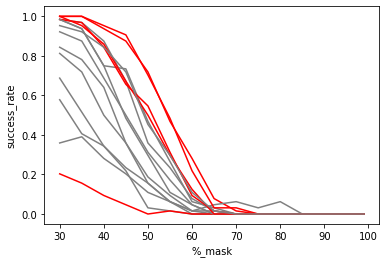

In [ ]:
sns.lineplot(data=dmean_HBI_b_1, x=dmean_HBI_b_1.index, y=dmean_HBI_b_1['success_rate'], color="grey")
sns.lineplot(data=dmean_HBI_b_2, x=dmean_HBI_b_2.index, y=dmean_HBI_b_2['success_rate'], color="grey")
sns.lineplot(data=dmean_HBI_b_3, x=dmean_HBI_b_3.index, y=dmean_HBI_b_3['success_rate'], color="grey")
sns.lineplot(data=dmean_HBI_b_4, x=dmean_HBI_b_4.index, y=dmean_HBI_b_4['success_rate'], color="grey")
#sns.lineplot(data=dmean_HBI_b_5, x=dmean_HBI_b_5.index, y=dmean_HBI_b_5['success_rate'], color="grey")
#sns.lineplot(data=dmean_HBI_b_6, x=dmean_HBI_b_6.index, y=dmean_HBI_b_6['success_rate'], color="grey")
sns.lineplot(data=dmean_HBI_b_7, x=dmean_HBI_b_7.index, y=dmean_HBI_b_7['success_rate'], color="red")
sns.lineplot(data=dmean_HBI_b_8, x=dmean_HBI_b_8.index, y=dmean_HBI_b_8['success_rate'], color="grey")
sns.lineplot(data=dmean_HBI_b_9, x=dmean_HBI_b_9.index, y=dmean_HBI_b_9['success_rate'], color="grey")
sns.lineplot(data=dmean_HBI_b_10, x=dmean_HBI_b_10.index, y=dmean_HBI_b_10['success_rate'], color="red")
#sns.lineplot(data=dmean_HBI_b_11, x=dmean_HBI_b_11.index, y=dmean_HBI_b_11['success_rate'], color="grey")
#sns.lineplot(data=dmean_HBI_b_12, x=dmean_HBI_b_12.index, y=dmean_HBI_b_12['success_rate'], color="grey")
sns.lineplot(data=dmean_HBI_b_13, x=dmean_HBI_b_13.index, y=dmean_HBI_b_13['success_rate'], color="grey")
sns.lineplot(data=dmean_HBI_b_14, x=dmean_HBI_b_14.index, y=dmean_HBI_b_14['success_rate'], color="red")
sns.lineplot(data=dmean_HBI_b_15, x=dmean_HBI_b_15.index, y=dmean_HBI_b_15['success_rate'], color="red")
sns.lineplot(data=dmean_HBI_b_16, x=dmean_HBI_b_16.index, y=dmean_HBI_b_16['success_rate'], color="grey")
sns.lineplot(data=dmean_HBI_b_17, x=dmean_HBI_b_17.index, y=dmean_HBI_b_17['success_rate'], color="grey")
#sns.lineplot(data=dmean_HBI_b_18, x=dmean_HBI_b_18.index, y=dmean_HBI_b_18['success_rate'], color="grey")
sns.lineplot(data=dmean_HBI_b_19, x=dmean_HBI_b_19.index, y=dmean_HBI_b_19['success_rate'], color="red")
sns.lineplot(data=dmean_HBI_b_20, x=dmean_HBI_b_20.index, y=dmean_HBI_b_20['success_rate'], color="grey")

<AxesSubplot:xlabel='%_mask', ylabel='success_rate'>

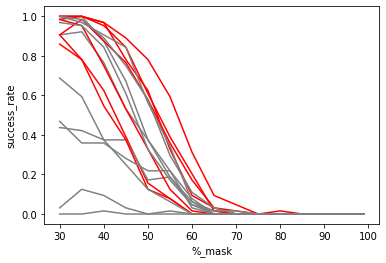

In [ ]:
sns.lineplot(data=dmean_HBI_b_21, x=dmean_HBI_b_21.index, y=dmean_HBI_b_21['success_rate'], color="red")
sns.lineplot(data=dmean_HBI_b_22, x=dmean_HBI_b_22.index, y=dmean_HBI_b_22['success_rate'], color="red")
sns.lineplot(data=dmean_HBI_b_23, x=dmean_HBI_b_23.index, y=dmean_HBI_b_23['success_rate'], color="grey")
#sns.lineplot(data=dmean_HBI_b_24, x=dmean_HBI_b_24.index, y=dmean_HBI_b_24['success_rate'], color="grey")
sns.lineplot(data=dmean_HBI_b_25, x=dmean_HBI_b_25.index, y=dmean_HBI_b_25['success_rate'], color="grey")
sns.lineplot(data=dmean_HBI_b_26, x=dmean_HBI_b_26.index, y=dmean_HBI_b_26['success_rate'], color="red")
sns.lineplot(data=dmean_HBI_b_27, x=dmean_HBI_b_27.index, y=dmean_HBI_b_27['success_rate'], color="red")
sns.lineplot(data=dmean_HBI_b_28, x=dmean_HBI_b_28.index, y=dmean_HBI_b_28['success_rate'], color="grey")
sns.lineplot(data=dmean_HBI_b_29, x=dmean_HBI_b_29.index, y=dmean_HBI_b_29['success_rate'], color="grey")
#sns.lineplot(data=dmean_HBI_b_30, x=dmean_HBI_b_30.index, y=dmean_HBI_b_30['success_rate'], color="red")
sns.lineplot(data=dmean_HBI_b_31, x=dmean_HBI_b_31.index, y=dmean_HBI_b_31['success_rate'], color="grey")
sns.lineplot(data=dmean_HBI_b_32, x=dmean_HBI_b_32.index, y=dmean_HBI_b_32['success_rate'], color="red")
sns.lineplot(data=dmean_HBI_b_33, x=dmean_HBI_b_33.index, y=dmean_HBI_b_33['success_rate'], color="red")
sns.lineplot(data=dmean_HBI_b_34, x=dmean_HBI_b_34.index, y=dmean_HBI_b_34['success_rate'], color="red")
sns.lineplot(data=dmean_HBI_b_35, x=dmean_HBI_b_35.index, y=dmean_HBI_b_35['success_rate'], color="grey")
#sns.lineplot(data=dmean_HBI_b_36, x=dmean_HBI_b_36.index, y=dmean_HBI_b_36['success_rate'], color="grey")
sns.lineplot(data=dmean_HBI_b_37, x=dmean_HBI_b_37.index, y=dmean_HBI_b_37['success_rate'], color="grey")
sns.lineplot(data=dmean_HBI_b_38, x=dmean_HBI_b_38.index, y=dmean_HBI_b_38['success_rate'], color="grey")
sns.lineplot(data=dmean_HBI_b_39, x=dmean_HBI_b_39.index, y=dmean_HBI_b_39['success_rate'], color="grey")
sns.lineplot(data=dmean_HBI_b_40, x=dmean_HBI_b_40.index, y=dmean_HBI_b_40['success_rate'], color="grey")

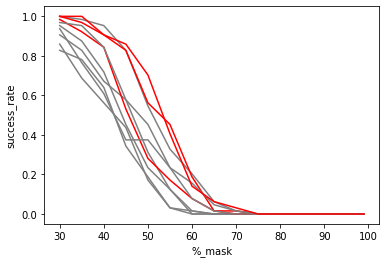

In [ ]:
sns.lineplot(data=dmean_HBI_b_41, x=dmean_HBI_b_41.index, y=dmean_HBI_b_41['success_rate'], color="grey")
#sns.lineplot(data=dmean_HBI_b_42, x=dmean_HBI_b_42.index, y=dmean_HBI_b_42['success_rate'], color="grey")
sns.lineplot(data=dmean_HBI_b_43, x=dmean_HBI_b_43.index, y=dmean_HBI_b_43['success_rate'], color="grey")
sns.lineplot(data=dmean_HBI_b_44, x=dmean_HBI_b_44.index, y=dmean_HBI_b_44['success_rate'], color="grey")
sns.lineplot(data=dmean_HBI_b_45, x=dmean_HBI_b_45.index, y=dmean_HBI_b_45['success_rate'], color="grey")
sns.lineplot(data=dmean_HBI_b_46, x=dmean_HBI_b_46.index, y=dmean_HBI_b_46['success_rate'], color="grey")
#sns.lineplot(data=dmean_HBI_b_47, x=dmean_HBI_b_47.index, y=dmean_HBI_b_47['success_rate'], color="grey")
#sns.lineplot(data=dmean_HBI_b_48, x=dmean_HBI_b_48.index, y=dmean_HBI_b_48['success_rate'], color="grey")
sns.lineplot(data=dmean_HBI_b_49, x=dmean_HBI_b_49.index, y=dmean_HBI_b_49['success_rate'], color="red")
sns.lineplot(data=dmean_HBI_b_50, x=dmean_HBI_b_50.index, y=dmean_HBI_b_50['success_rate'], color="red")
#sns.lineplot(data=dmean_HBI_b_51, x=dmean_HBI_b_51.index, y=dmean_HBI_b_51['success_rate'], color="grey")
#sns.lineplot(data=dmean_HBI_b_52, x=dmean_HBI_b_52.index, y=dmean_HBI_b_52['success_rate'], color="grey")
sns.lineplot(data=dmean_HBI_b_53, x=dmean_HBI_b_53.index, y=dmean_HBI_b_53['success_rate'], color="grey")
#sns.lineplot(data=dmean_HBI_b_54, x=dmean_HBI_b_54.index, y=dmean_HBI_b_54['success_rate'], color="grey")
sns.lineplot(data=dmean_HBI_b_55, x=dmean_HBI_b_55.index, y=dmean_HBI_b_55['success_rate'], color="grey")
sns.lineplot(data=dmean_HBI_b_56, x=dmean_HBI_b_56.index, y=dmean_HBI_b_56['success_rate'], color="red")

(30.0, 85.0)

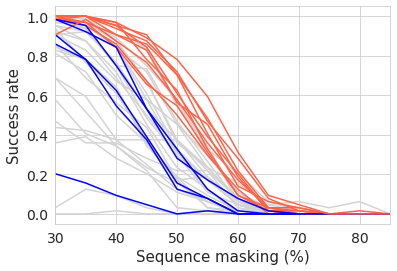

In [ ]:
ax = sns.lineplot(data=dmean_HBI_b_1, x=dmean_HBI_b_1.index, y=dmean_HBI_b_1['success_rate'], color="lightgrey")
sns.lineplot(data=dmean_HBI_b_2, x=dmean_HBI_b_2.index, y=dmean_HBI_b_2['success_rate'], color="lightgrey", ax=ax)
sns.lineplot(data=dmean_HBI_b_3, x=dmean_HBI_b_3.index, y=dmean_HBI_b_3['success_rate'], color="lightgrey", ax=ax)
sns.lineplot(data=dmean_HBI_b_4, x=dmean_HBI_b_4.index, y=dmean_HBI_b_4['success_rate'], color="lightgrey", ax=ax)
#sns.lineplot(data=dmean_HBI_b_5, x=dmean_HBI_b_5.index, y=dmean_HBI_b_5['success_rate'], color="lightgrey", ax=ax)
#sns.lineplot(data=dmean_HBI_b_6, x=dmean_HBI_b_6.index, y=dmean_HBI_b_6['success_rate'], color="lightgrey", ax=ax)
sns.lineplot(data=dmean_HBI_b_8, x=dmean_HBI_b_8.index, y=dmean_HBI_b_8['success_rate'], color="lightgrey", ax=ax)
sns.lineplot(data=dmean_HBI_b_9, x=dmean_HBI_b_9.index, y=dmean_HBI_b_9['success_rate'], color="lightgrey", ax=ax)
#sns.lineplot(data=dmean_HBI_b_11, x=dmean_HBI_b_11.index, y=dmean_HBI_b_11['success_rate'], color="lightgrey", ax=ax)
#sns.lineplot(data=dmean_HBI_b_12, x=dmean_HBI_b_12.index, y=dmean_HBI_b_12['success_rate'], color="lightgrey", ax=ax)
sns.lineplot(data=dmean_HBI_b_13, x=dmean_HBI_b_13.index, y=dmean_HBI_b_13['success_rate'], color="lightgrey", ax=ax)
sns.lineplot(data=dmean_HBI_b_16, x=dmean_HBI_b_16.index, y=dmean_HBI_b_16['success_rate'], color="lightgrey", ax=ax)
sns.lineplot(data=dmean_HBI_b_17, x=dmean_HBI_b_17.index, y=dmean_HBI_b_17['success_rate'], color="lightgrey", ax=ax)
#sns.lineplot(data=dmean_HBI_b_18, x=dmean_HBI_b_18.index, y=dmean_HBI_b_18['success_rate'], color="lightgrey", ax=ax)
sns.lineplot(data=dmean_HBI_b_20, x=dmean_HBI_b_20.index, y=dmean_HBI_b_20['success_rate'], color="lightgrey", ax=ax)
sns.lineplot(data=dmean_HBI_b_23, x=dmean_HBI_b_23.index, y=dmean_HBI_b_23['success_rate'], color="lightgrey", ax=ax)
#sns.lineplot(data=dmean_HBI_b_24, x=dmean_HBI_b_24.index, y=dmean_HBI_b_24['success_rate'], color="lightgrey", ax=ax)
sns.lineplot(data=dmean_HBI_b_25, x=dmean_HBI_b_25.index, y=dmean_HBI_b_25['success_rate'], color="lightgrey", ax=ax)
sns.lineplot(data=dmean_HBI_b_28, x=dmean_HBI_b_28.index, y=dmean_HBI_b_28['success_rate'], color="lightgrey", ax=ax)
sns.lineplot(data=dmean_HBI_b_29, x=dmean_HBI_b_29.index, y=dmean_HBI_b_29['success_rate'], color="lightgrey", ax=ax)
sns.lineplot(data=dmean_HBI_b_31, x=dmean_HBI_b_31.index, y=dmean_HBI_b_31['success_rate'], color="lightgrey", ax=ax)
sns.lineplot(data=dmean_HBI_b_35, x=dmean_HBI_b_35.index, y=dmean_HBI_b_35['success_rate'], color="lightgrey", ax=ax)
#sns.lineplot(data=dmean_HBI_b_36, x=dmean_HBI_b_36.index, y=dmean_HBI_b_36['success_rate'], color="lightgrey", ax=ax)
sns.lineplot(data=dmean_HBI_b_37, x=dmean_HBI_b_37.index, y=dmean_HBI_b_37['success_rate'], color="lightgrey", ax=ax)
sns.lineplot(data=dmean_HBI_b_38, x=dmean_HBI_b_38.index, y=dmean_HBI_b_38['success_rate'], color="lightgrey", ax=ax)
sns.lineplot(data=dmean_HBI_b_39, x=dmean_HBI_b_39.index, y=dmean_HBI_b_39['success_rate'], color="lightgrey", ax=ax)
sns.lineplot(data=dmean_HBI_b_40, x=dmean_HBI_b_40.index, y=dmean_HBI_b_40['success_rate'], color="lightgrey", ax=ax)
sns.lineplot(data=dmean_HBI_b_41, x=dmean_HBI_b_41.index, y=dmean_HBI_b_41['success_rate'], color="lightgrey", ax=ax)
#sns.lineplot(data=dmean_HBI_b_42, x=dmean_HBI_b_42.index, y=dmean_HBI_b_42['success_rate'], color="lightgrey", ax=ax)
sns.lineplot(data=dmean_HBI_b_43, x=dmean_HBI_b_43.index, y=dmean_HBI_b_43['success_rate'], color="lightgrey", ax=ax)
sns.lineplot(data=dmean_HBI_b_44, x=dmean_HBI_b_44.index, y=dmean_HBI_b_44['success_rate'], color="lightgrey", ax=ax)
sns.lineplot(data=dmean_HBI_b_45, x=dmean_HBI_b_45.index, y=dmean_HBI_b_45['success_rate'], color="lightgrey", ax=ax)
sns.lineplot(data=dmean_HBI_b_46, x=dmean_HBI_b_46.index, y=dmean_HBI_b_46['success_rate'], color="lightgrey", ax=ax)
#sns.lineplot(data=dmean_HBI_b_47, x=dmean_HBI_b_47.index, y=dmean_HBI_b_47['success_rate'], color="lightgrey", ax=ax)
#sns.lineplot(data=dmean_HBI_b_48, x=dmean_HBI_b_48.index, y=dmean_HBI_b_48['success_rate'], color="lightgrey", ax=ax)
#sns.lineplot(data=dmean_HBI_b_51, x=dmean_HBI_b_51.index, y=dmean_HBI_b_51['success_rate'], color="lightgrey", ax=ax)
#sns.lineplot(data=dmean_HBI_b_52, x=dmean_HBI_b_52.index, y=dmean_HBI_b_52['success_rate'], color="lightgrey", ax=ax)
sns.lineplot(data=dmean_HBI_b_53, x=dmean_HBI_b_53.index, y=dmean_HBI_b_53['success_rate'], color="lightgrey", ax=ax)
#sns.lineplot(data=dmean_HBI_b_54, x=dmean_HBI_b_54.index, y=dmean_HBI_b_54['success_rate'], color="lightgrey", ax=ax)
sns.lineplot(data=dmean_HBI_b_55, x=dmean_HBI_b_55.index, y=dmean_HBI_b_55['success_rate'], color="lightgrey", ax=ax)

sns.lineplot(data=dmean_HBI_b_7, x=dmean_HBI_b_7.index, y=dmean_HBI_b_7['success_rate'], color="tomato", ax=ax)
sns.lineplot(data=dmean_HBI_b_10, x=dmean_HBI_b_10.index, y=dmean_HBI_b_10['success_rate'], color="tomato", ax=ax)
sns.lineplot(data=dmean_HBI_b_14, x=dmean_HBI_b_14.index, y=dmean_HBI_b_14['success_rate'], color="tomato", ax=ax)
sns.lineplot(data=dmean_HBI_b_15, x=dmean_HBI_b_15.index, y=dmean_HBI_b_15['success_rate'], color="blue", ax=ax)
sns.lineplot(data=dmean_HBI_b_19, x=dmean_HBI_b_19.index, y=dmean_HBI_b_19['success_rate'], color="tomato", ax=ax)
sns.lineplot(data=dmean_HBI_b_21, x=dmean_HBI_b_21.index, y=dmean_HBI_b_21['success_rate'], color="blue", ax=ax)
sns.lineplot(data=dmean_HBI_b_22, x=dmean_HBI_b_22.index, y=dmean_HBI_b_22['success_rate'], color="tomato", ax=ax)
sns.lineplot(data=dmean_HBI_b_26, x=dmean_HBI_b_26.index, y=dmean_HBI_b_26['success_rate'], color="tomato", ax=ax)
sns.lineplot(data=dmean_HBI_b_27, x=dmean_HBI_b_27.index, y=dmean_HBI_b_27['success_rate'], color="blue", ax=ax)
#sns.lineplot(data=dmean_HBI_b_30, x=dmean_HBI_b_30.index, y=dmean_HBI_b_30['success_rate'], color="tomato", ax=ax)
sns.lineplot(data=dmean_HBI_b_32, x=dmean_HBI_b_32.index, y=dmean_HBI_b_32['success_rate'], color="tomato", ax=ax)
sns.lineplot(data=dmean_HBI_b_33, x=dmean_HBI_b_33.index, y=dmean_HBI_b_33['success_rate'], color="blue", ax=ax)
sns.lineplot(data=dmean_HBI_b_34, x=dmean_HBI_b_34.index, y=dmean_HBI_b_34['success_rate'], color="tomato", ax=ax)
sns.lineplot(data=dmean_HBI_b_49, x=dmean_HBI_b_49.index, y=dmean_HBI_b_49['success_rate'], color="tomato", ax=ax)
sns.lineplot(data=dmean_HBI_b_50, x=dmean_HBI_b_50.index, y=dmean_HBI_b_50['success_rate'], color="blue", ax=ax)
sns.lineplot(data=dmean_HBI_b_56, x=dmean_HBI_b_56.index, y=dmean_HBI_b_56['success_rate'], color="tomato", ax=ax)

ax.set_xlabel("Sequence masking (%)",fontsize=15)
ax.set_ylabel("Success rate",fontsize=15)
ax.tick_params(labelsize=14)
plt.xlim(30, 85)

<AxesSubplot:xlabel='%_mask', ylabel='ptm'>

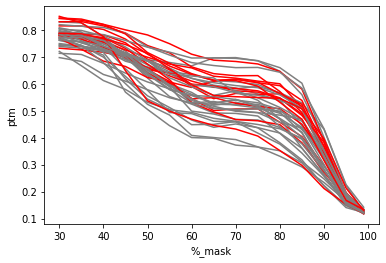

In [ ]:
sns.lineplot(data=dmean_HBI_b_1, x=dmean_HBI_b_1.index, y=dmean_HBI_b_1.ptm, color="grey")
sns.lineplot(data=dmean_HBI_b_2, x=dmean_HBI_b_2.index, y=dmean_HBI_b_2.ptm, color="grey")
sns.lineplot(data=dmean_HBI_b_3, x=dmean_HBI_b_3.index, y=dmean_HBI_b_3.ptm, color="grey")
sns.lineplot(data=dmean_HBI_b_4, x=dmean_HBI_b_4.index, y=dmean_HBI_b_4.ptm, color="grey")
#sns.lineplot(data=dmean_HBI_b_5, x=dmean_HBI_b_5.index, y=dmean_HBI_b_5.ptm, color="grey")
#sns.lineplot(data=dmean_HBI_b_6, x=dmean_HBI_b_6.index, y=dmean_HBI_b_6.ptm, color="grey")
sns.lineplot(data=dmean_HBI_b_7, x=dmean_HBI_b_7.index, y=dmean_HBI_b_7.ptm, color="red")
sns.lineplot(data=dmean_HBI_b_8, x=dmean_HBI_b_8.index, y=dmean_HBI_b_8.ptm, color="grey")
sns.lineplot(data=dmean_HBI_b_9, x=dmean_HBI_b_9.index, y=dmean_HBI_b_9.ptm, color="grey")
#sns.lineplot(data=dmean_HBI_b_10, x=dmean_HBI_b_10.index, y=dmean_HBI_b_10.ptm, color="red")
#sns.lineplot(data=dmean_HBI_b_11, x=dmean_HBI_b_11.index, y=dmean_HBI_b_11.ptm, color="grey")
#sns.lineplot(data=dmean_HBI_b_12, x=dmean_HBI_b_12.index, y=dmean_HBI_b_12.ptm, color="grey")
sns.lineplot(data=dmean_HBI_b_13, x=dmean_HBI_b_13.index, y=dmean_HBI_b_13.ptm, color="grey")
sns.lineplot(data=dmean_HBI_b_14, x=dmean_HBI_b_14.index, y=dmean_HBI_b_14.ptm, color="red")
sns.lineplot(data=dmean_HBI_b_15, x=dmean_HBI_b_15.index, y=dmean_HBI_b_15.ptm, color="red")
sns.lineplot(data=dmean_HBI_b_16, x=dmean_HBI_b_16.index, y=dmean_HBI_b_16.ptm, color="grey")
sns.lineplot(data=dmean_HBI_b_17, x=dmean_HBI_b_17.index, y=dmean_HBI_b_17.ptm, color="grey")
#sns.lineplot(data=dmean_HBI_b_18, x=dmean_HBI_b_18.index, y=dmean_HBI_b_18.ptm, color="grey")
sns.lineplot(data=dmean_HBI_b_19, x=dmean_HBI_b_19.index, y=dmean_HBI_b_19.ptm, color="red")
sns.lineplot(data=dmean_HBI_b_20, x=dmean_HBI_b_20.index, y=dmean_HBI_b_20.ptm, color="grey")
sns.lineplot(data=dmean_HBI_b_21, x=dmean_HBI_b_21.index, y=dmean_HBI_b_21.ptm, color="red")
sns.lineplot(data=dmean_HBI_b_22, x=dmean_HBI_b_22.index, y=dmean_HBI_b_22.ptm, color="red")
sns.lineplot(data=dmean_HBI_b_23, x=dmean_HBI_b_23.index, y=dmean_HBI_b_23.ptm, color="grey")
#sns.lineplot(data=dmean_HBI_b_24, x=dmean_HBI_b_24.index, y=dmean_HBI_b_24.ptm, color="grey")
sns.lineplot(data=dmean_HBI_b_25, x=dmean_HBI_b_25.index, y=dmean_HBI_b_25.ptm, color="grey")
sns.lineplot(data=dmean_HBI_b_26, x=dmean_HBI_b_26.index, y=dmean_HBI_b_26.ptm, color="red")
sns.lineplot(data=dmean_HBI_b_27, x=dmean_HBI_b_27.index, y=dmean_HBI_b_27.ptm, color="red")
sns.lineplot(data=dmean_HBI_b_28, x=dmean_HBI_b_28.index, y=dmean_HBI_b_28.ptm, color="grey")
sns.lineplot(data=dmean_HBI_b_29, x=dmean_HBI_b_29.index, y=dmean_HBI_b_29.ptm, color="grey")
#sns.lineplot(data=dmean_HBI_b_30, x=dmean_HBI_b_30.index, y=dmean_HBI_b_30.ptm, color="red")
sns.lineplot(data=dmean_HBI_b_31, x=dmean_HBI_b_31.index, y=dmean_HBI_b_31.ptm, color="grey")
sns.lineplot(data=dmean_HBI_b_32, x=dmean_HBI_b_32.index, y=dmean_HBI_b_32.ptm, color="red")
sns.lineplot(data=dmean_HBI_b_33, x=dmean_HBI_b_33.index, y=dmean_HBI_b_33.ptm, color="red")
sns.lineplot(data=dmean_HBI_b_34, x=dmean_HBI_b_34.index, y=dmean_HBI_b_34.ptm, color="red")
sns.lineplot(data=dmean_HBI_b_35, x=dmean_HBI_b_35.index, y=dmean_HBI_b_35.ptm, color="grey")
#sns.lineplot(data=dmean_HBI_b_36, x=dmean_HBI_b_36.index, y=dmean_HBI_b_36.ptm, color="grey")
sns.lineplot(data=dmean_HBI_b_37, x=dmean_HBI_b_37.index, y=dmean_HBI_b_37.ptm, color="grey")
sns.lineplot(data=dmean_HBI_b_38, x=dmean_HBI_b_38.index, y=dmean_HBI_b_38.ptm, color="grey")
sns.lineplot(data=dmean_HBI_b_39, x=dmean_HBI_b_39.index, y=dmean_HBI_b_39.ptm, color="grey")
sns.lineplot(data=dmean_HBI_b_40, x=dmean_HBI_b_40.index, y=dmean_HBI_b_40.ptm, color="grey")
sns.lineplot(data=dmean_HBI_b_41, x=dmean_HBI_b_41.index, y=dmean_HBI_b_41.ptm, color="grey")
#sns.lineplot(data=dmean_HBI_b_42, x=dmean_HBI_b_42.index, y=dmean_HBI_b_42.ptm, color="grey")
sns.lineplot(data=dmean_HBI_b_43, x=dmean_HBI_b_43.index, y=dmean_HBI_b_43.ptm, color="grey")
sns.lineplot(data=dmean_HBI_b_44, x=dmean_HBI_b_44.index, y=dmean_HBI_b_44.ptm, color="grey")
sns.lineplot(data=dmean_HBI_b_45, x=dmean_HBI_b_45.index, y=dmean_HBI_b_45.ptm, color="grey")
sns.lineplot(data=dmean_HBI_b_46, x=dmean_HBI_b_46.index, y=dmean_HBI_b_46.ptm, color="grey")
#sns.lineplot(data=dmean_HBI_b_47, x=dmean_HBI_b_47.index, y=dmean_HBI_b_47.ptm, color="grey")
#sns.lineplot(data=dmean_HBI_b_48, x=dmean_HBI_b_48.index, y=dmean_HBI_b_48.ptm, color="grey")
sns.lineplot(data=dmean_HBI_b_49, x=dmean_HBI_b_49.index, y=dmean_HBI_b_49.ptm, color="red")
sns.lineplot(data=dmean_HBI_b_50, x=dmean_HBI_b_50.index, y=dmean_HBI_b_50.ptm, color="red")
#sns.lineplot(data=dmean_HBI_b_51, x=dmean_HBI_b_51.index, y=dmean_HBI_b_51.ptm, color="grey")
#sns.lineplot(data=dmean_HBI_b_52, x=dmean_HBI_b_52.index, y=dmean_HBI_b_52.ptm, color="grey")
sns.lineplot(data=dmean_HBI_b_53, x=dmean_HBI_b_53.index, y=dmean_HBI_b_53.ptm, color="grey")
#sns.lineplot(data=dmean_HBI_b_54, x=dmean_HBI_b_54.index, y=dmean_HBI_b_54.ptm, color="grey")
sns.lineplot(data=dmean_HBI_b_55, x=dmean_HBI_b_55.index, y=dmean_HBI_b_55.ptm, color="grey")
sns.lineplot(data=dmean_HBI_b_56, x=dmean_HBI_b_56.index, y=dmean_HBI_b_56.ptm, color="red")

In [ ]:
dmean_TMB2_1.name = "TMB2_1"
dmean_TMB2_2.name = "TMB2_2"
dmean_TMB2_3.name = "TMB2_3"
dmean_TMB2_4.name = "TMB2_4"
dmean_TMB2_5.name = "TMB2_5"
dmean_TMB2_6.name = "TMB2_6"
dmean_TMB2_7.name = "TMB2_7"
dmean_TMB2_8.name = "TMB2_8"
dmean_TMB2_9.name = "TMB2_9"
dmean_TMB2_10.name = "TMB2_10"
dmean_TMB2_11.name = "TMB2_11"
dmean_TMB2_12.name = "TMB2_12"
dmean_TMB2_13.name = "TMB2_13"
dmean_TMB2_14.name = "TMB2_14"
dmean_TMB2_15.name = "TMB2_15"
dmean_TMB2_16.name = "TMB2_16"
dmean_TMB2_17.name = "TMB2_17"
dmean_TMB2_18.name = "TMB2_18"
dmean_TMB2_19.name = "TMB2_19"
dmean_TMB2_20.name = "TMB2_20"
dmean_TMB2_21.name = "TMB2_21"
dmean_TMB2_22.name = "TMB2_22"
dmean_TMB2_23.name = "TMB2_23"
dmean_TMB2_24.name = "TMB2_24"
dmean_TMB2_25.name = "TMB2_25"
dmean_TMB2_26.name = "TMB2_26"
dmean_TMB2_27.name = "TMB2_27"
dmean_TMB2_28.name = "TMB2_28"
dmean_TMB2_29.name = "TMB2_29"
dmean_TMB2_30.name = "TMB2_30"
dmean_TMB2_31.name = "TMB2_31"
dmean_TMB2_32.name = "TMB2_32"
dmean_TMB2_33.name = "TMB2_33"
dmean_TMB2_34.name = "TMB2_34"
dmean_TMB2_35.name = "TMB2_35"
dmean_TMB2_36.name = "TMB2_36"
dmean_TMB2_37.name = "TMB2_37"
dmean_TMB2_38.name = "TMB2_38"
dmean_TMB2_39.name = "TMB2_39"
dmean_TMB2_40.name = "TMB2_40"
dmean_TMB2_41.name = "TMB2_41"
dmean_TMB2_42.name = "TMB2_42"
dmean_TMB2_43.name = "TMB2_43"
dmean_TMB2_44.name = "TMB2_44"
dmean_TMB2_45.name = "TMB2_45"
dmean_TMB2_46.name = "TMB2_46"
dmean_TMB2_47.name = "TMB2_47"
dmean_TMB2_48.name = "TMB2_48"
dmean_TMB2_49.name = "TMB2_49"
dmean_TMB2_50.name = "TMB2_50"
dmean_TMB2_51.name = "TMB2_51"
dmean_TMB2_52.name = "TMB2_52"
dmean_TMB2_53.name = "TMB2_53"
dmean_TMB2_54.name = "TMB2_54"
dmean_TMB2_55.name = "TMB2_55"
dmean_TMB2_56.name = "TMB2_56"
dmean_TMB2_57.name = "TMB2_57"
dmean_TMB2_58.name = "TMB2_58"
dmean_TMB2_59.name = "TMB2_59"
dmean_TMB2_60.name = "TMB2_60"
dmean_TMB2_61.name = "TMB2_61"
dmean_TMB2_62.name = "TMB2_62"
dmean_TMB2_63.name = "TMB2_63"
dmean_TMB2_64.name = "TMB2_64"
dmean_TMB2_65.name = "TMB2_65"
dmean_TMB2_66.name = "TMB2_66"
dmean_TMB2_67.name = "TMB2_67"
dmean_TMB2_68.name = "TMB2_68"
dmean_TMB2_69.name = "TMB2_69"
dmean_TMB2_70.name = "TMB2_70"
dmean_TMB2_71.name = "TMB2_71"
dmean_TMB2_72.name = "TMB2_72"
dmean_TMB2_73.name = "TMB2_73"
dmean_TMB2_74.name = "TMB2_74"
dmean_TMB2_75.name = "TMB2_75"
dmean_TMB2_76.name = "TMB2_76"
dmean_TMB2_77.name = "TMB2_77"
dmean_TMB2_78.name = "TMB2_78"
dmean_TMB2_79.name = "TMB2_79"
dmean_TMB2_80.name = "TMB2_80"
dmean_TMB2_81.name = "TMB2_81"
dmean_TMB2_82.name = "TMB2_82"
dmean_TMB2_83.name = "TMB2_83"
dmean_TMB2_84.name = "TMB2_84"
dmean_TMB2_85.name = "TMB2_85"
dmean_TMB2_86.name = "TMB2_86"
dmean_TMB2_87.name = "TMB2_87"
dmean_TMB2_88.name = "TMB2_88"
dmean_TMB2_89.name = "TMB2_89"
dmean_TMB2_90.name = "TMB2_90"

In [ ]:
dmean_HBI_b_1.name = "HBI_b_1"
dmean_HBI_b_2.name = "HBI_b_2"
dmean_HBI_b_3.name = "HBI_b_3"
dmean_HBI_b_4.name = "HBI_b_4"
dmean_HBI_b_8.name = "HBI_b_8"
dmean_HBI_b_9.name = "HBI_b_9"
dmean_HBI_b_13.name = "HBI_b_13"
dmean_HBI_b_16.name = "HBI_b_16"
dmean_HBI_b_17.name = "HBI_b_17"
dmean_HBI_b_20.name = "HBI_b_20"
dmean_HBI_b_23.name = "HBI_b_23"
dmean_HBI_b_25.name = "HBI_b_25"
dmean_HBI_b_28.name = "HBI_b_28"
dmean_HBI_b_29.name = "HBI_b_29"
dmean_HBI_b_31.name = "HBI_b_31"
dmean_HBI_b_35.name = "HBI_b_35"
dmean_HBI_b_37.name = "HBI_b_37"
dmean_HBI_b_38.name = "HBI_b_38"
dmean_HBI_b_39.name = "HBI_b_39"
dmean_HBI_b_40.name = "HBI_b_40"
dmean_HBI_b_41.name = "HBI_b_41"
dmean_HBI_b_43.name = "HBI_b_43"
dmean_HBI_b_44.name = "HBI_b_44"
dmean_HBI_b_45.name = "HBI_b_45"
dmean_HBI_b_46.name = "HBI_b_46"
dmean_HBI_b_53.name = "HBI_b_53"
dmean_HBI_b_55.name = "HBI_b_55"
dmean_HBI_b_7.name = "HBI_b_7"
dmean_HBI_b_10.name = "HBI_b_10"
dmean_HBI_b_14.name = "HBI_b_14"
dmean_HBI_b_15.name = "HBI_b_15"
dmean_HBI_b_19.name = "HBI_b_19"
dmean_HBI_b_21.name = "HBI_b_21"
dmean_HBI_b_22.name = "HBI_b_22"
dmean_HBI_b_26.name = "HBI_b_26"
dmean_HBI_b_27.name = "HBI_b_27"
dmean_HBI_b_32.name = "HBI_b_32"
dmean_HBI_b_33.name = "HBI_b_33"
dmean_HBI_b_34.name = "HBI_b_34"
dmean_HBI_b_49.name = "HBI_b_49"
dmean_HBI_b_50.name = "HBI_b_50"
dmean_HBI_b_56.name = "HBI_b_56"

In [ ]:
from scipy.optimize import curve_fit
from numpy import pi, r_
from scipy import optimize

60.525043488391745


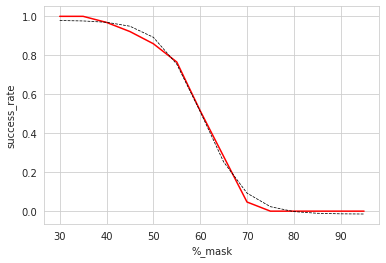

In [ ]:
sns.set_style("whitegrid")
#fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

ax = sns.lineplot(data=dmean_TMB2_3, x=dmean_TMB2_3.index, y=dmean_TMB2_3['success_rate'], color="red")

# Boltzmann sigmoidal
fitfunc = lambda p, x: p[1] + (p[0] - p[1]) / (1 + np.exp((p[3] - x)/p[2]))

# With cooperaiviyt factor
#fitfunc = lambda p, x: p[1] + (p[0] - p[1]) / (1 + np.exp(p[2]*(x - p[3])))
errfunc = lambda p, x, y: fitfunc(p, x) - y
p0 = [0.0, 1.0, 0.5, 60.0]
temp = np.linspace(30.0, 95.0, 5)

fit, success = optimize.leastsq(errfunc, p0[:], args=(dmean_TMB2_3.index, dmean_TMB2_3["success_rate"]))
ax.plot(dmean_TMB2_3.index, fitfunc(fit, dmean_TMB2_3.index), "black", linewidth=0.75, linestyle='dashed')

print(float(fit[3]))


62.38307232221191


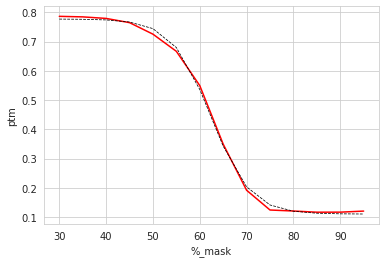

In [ ]:
sns.set_style("whitegrid")
#fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

ax = sns.lineplot(data=dmean_TMB2_3, x=dmean_TMB2_3.index, y=dmean_TMB2_3['ptm'], color="red")

# Boltzmann sigmoidal
fitfunc = lambda p, x: p[1] + (p[0] - p[1]) / (1 + np.exp((p[3] - x)/p[2]))

# With cooperaiviyt factor
#fitfunc = lambda p, x: p[1] + (p[0] - p[1]) / (1 + np.exp(p[2]*(x - p[3])))
errfunc = lambda p, x, y: fitfunc(p, x) - y
p0 = [0.0, 1.0, 0.5, 60.0]
temp = np.linspace(30.0, 95.0, 5)

fit, success = optimize.leastsq(errfunc, p0[:], args=(dmean_TMB2_3.index, dmean_TMB2_3["ptm"]))
ax.plot(dmean_TMB2_3.index, fitfunc(fit, dmean_TMB2_3.index), "black", linewidth=0.75, linestyle='dashed')

print(float(fit[3]))

58.28601877372215


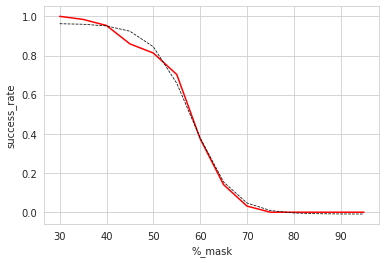

In [ ]:
sns.set_style("whitegrid")
#fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

ax = sns.lineplot(data=dmean_TMB2_85, x=dmean_TMB2_85.index, y=dmean_TMB2_85['success_rate'], color="red")

# Boltzmann sigmoidal
fitfunc = lambda p, x: p[1] + (p[0] - p[1]) / (1 + np.exp((p[3] - x)/p[2]))

# With cooperaiviyt factor
#fitfunc = lambda p, x: p[1] + (p[0] - p[1]) / (1 + np.exp(p[2]*(x - p[3])))
errfunc = lambda p, x, y: fitfunc(p, x) - y
p0 = [0.0, 1.0, 0.5, 60.0]
temp = np.linspace(30.0, 95.0, 5)

fit, success = optimize.leastsq(errfunc, p0[:], args=(dmean_TMB2_85.index, dmean_TMB2_85["success_rate"]))
ax.plot(dmean_TMB2_85.index, fitfunc(fit, dmean_TMB2_85.index), "black", linewidth=0.75, linestyle='dashed')

print(float(fit[3]))


59.504621874334845


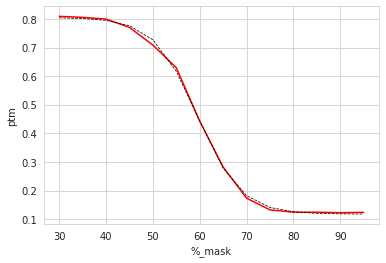

In [ ]:
sns.set_style("whitegrid")
#fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

ax = sns.lineplot(data=dmean_TMB2_85, x=dmean_TMB2_85.index, y=dmean_TMB2_85['ptm'], color="red")

# Boltzmann sigmoidal
fitfunc = lambda p, x: p[1] + (p[0] - p[1]) / (1 + np.exp((p[3] - x)/p[2]))

# With cooperaiviyt factor
#fitfunc = lambda p, x: p[1] + (p[0] - p[1]) / (1 + np.exp(p[2]*(x - p[3])))
errfunc = lambda p, x, y: fitfunc(p, x) - y
p0 = [0.0, 1.0, 0.5, 60.0]
temp = np.linspace(30.0, 95.0, 5)

fit, success = optimize.leastsq(errfunc, p0[:], args=(dmean_TMB2_85.index, dmean_TMB2_85["ptm"]))
ax.plot(dmean_TMB2_85.index, fitfunc(fit, dmean_TMB2_85.index), "black", linewidth=0.75, linestyle='dashed')

print(float(fit[3]))

In [ ]:
list_dfs = [dmean_TMB2_1, dmean_TMB2_2, dmean_TMB2_3, dmean_TMB2_4, dmean_TMB2_5, dmean_TMB2_6, dmean_TMB2_7, dmean_TMB2_8, dmean_TMB2_9, dmean_TMB2_12, dmean_TMB2_14, dmean_TMB2_15, dmean_TMB2_17, dmean_TMB2_18, dmean_TMB2_19, dmean_TMB2_20, dmean_TMB2_21, dmean_TMB2_22, dmean_TMB2_23, dmean_TMB2_24, dmean_TMB2_25, dmean_TMB2_26, dmean_TMB2_27, dmean_TMB2_28, dmean_TMB2_29, dmean_TMB2_30, dmean_TMB2_31, dmean_TMB2_32, dmean_TMB2_33, dmean_TMB2_34, dmean_TMB2_35, dmean_TMB2_36, dmean_TMB2_37, dmean_TMB2_38, dmean_TMB2_39, dmean_TMB2_41, dmean_TMB2_42, dmean_TMB2_43, dmean_TMB2_44, dmean_TMB2_45, dmean_TMB2_47, dmean_TMB2_48, dmean_TMB2_49, dmean_TMB2_50, dmean_TMB2_51, dmean_TMB2_52, dmean_TMB2_54, dmean_TMB2_55, dmean_TMB2_56, dmean_TMB2_57, dmean_TMB2_58, dmean_TMB2_59, dmean_TMB2_60, dmean_TMB2_62, dmean_TMB2_63, dmean_TMB2_64, dmean_TMB2_65, dmean_TMB2_66, dmean_TMB2_67, dmean_TMB2_68, dmean_TMB2_69, dmean_TMB2_70, dmean_TMB2_71, dmean_TMB2_72, dmean_TMB2_73, dmean_TMB2_74, dmean_TMB2_75, dmean_TMB2_76, dmean_TMB2_77, dmean_TMB2_78, dmean_TMB2_79, dmean_TMB2_80, dmean_TMB2_81, dmean_TMB2_82, dmean_TMB2_83, dmean_TMB2_84, dmean_TMB2_85, dmean_TMB2_86, dmean_TMB2_87, dmean_TMB2_88, dmean_TMB2_89]

In [ ]:
# Boltzmann sigmoidal
fitfunc = lambda p, x: p[1] + (p[0] - p[1]) / (1 + np.exp((p[3] - x)/p[2]))
errfunc = lambda p, x, y: fitfunc(p, x) - y
p0 = [0.0, 1.0, 0.5, 60.0]
temp = np.linspace(30.0, 95.0, 5)

folded = ["TMB2_3","TMB2_17","TMB2_27","TMB2_31","TMB2_35","TMB2_43","TMB2_47","TMB2_56","TMB2_58","TMB2_69","TMB2_70","TMB2_71","TMB2_73","TMB2_76","TMB2_83","TMB2_85"]
dict_tm = dict()

for dframe in list_dfs:
#  print(dframe.name)
#  print(optimize.leastsq(errfunc, p0[:], args=(dframe.index, dframe["ptm"])))
  if str(dframe.name) in folded:
    fold=True
  else:
    fold=False
  fit_ptm, success_ptm = optimize.leastsq(errfunc, p0[:], args=(dframe.index, dframe["ptm"]))
  fit_s, success_s = optimize.leastsq(errfunc, p0[:], args=(dframe.index, dframe["success_rate"]))
  dict_tm[str(dframe.name)] = [fit_ptm[0],fit_ptm[1],fit_ptm[2],fit_ptm[3],success_ptm,fit_s[0],fit_s[1],fit_s[2],fit_s[3],success_s,fold]

dtm = pd.DataFrame.from_dict(dict_tm, orient='index', columns=["ptm_start", "ptm_stop", "ptm_a", "ptm_tm", "ptm_success", "succ_start", "succ_stop", "succ_a", "succ_tm", "succ_success", "folded?" ])


/usr/local/lib/python3.8/dist-packages/scipy/optimize/minpack.py:476: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


In [ ]:
dtm

,ptm_start,ptm_stop,ptm_a,ptm_tm,ptm_success,succ_start,succ_stop,succ_a,succ_tm,succ_success,folded?
TMB2_1,0.124427,0.767150,4.289844,60.971630,1,-0.012494,0.922930,5.298390,51.009094,1,False
TMB2_2,0.114512,0.720185,4.307808,59.718618,1,-0.001270,0.206708,5.122936,48.125245,1,False
TMB2_3,0.110963,0.777090,4.184035,62.383072,1,-0.015140,0.979713,4.492317,60.525043,1,True
TMB2_4,0.160169,0.730164,5.241802,53.201705,1,-0.000845,0.236239,2.677522,44.881483,1,False
TMB2_5,0.125016,0.751925,4.721559,57.790063,1,-0.016410,0.984363,6.846515,44.590950,1,False
...,...,...,...,...,...,...,...,...,...,...,...
TMB2_85,0.117555,0.804956,4.623243,59.504622,1,-0.009317,0.963427,4.200126,58.286019,1,True
TMB2_86,0.134592,0.745788,5.986548,54.590734,1,-0.004488,0.602303,5.616858,45.036043,1,False
TMB2_87,0.125239,0.733723,5.304689,56.312731,1,-0.003810,188.942618,12.377095,-55.439690,5,False
TMB2_88,0.146029,0.753907,5.364731,59.609456,1,0.003248,0.608762,5.067732,49.119791,1,False


<AxesSubplot:xlabel='folded?', ylabel='ptm_tm'>

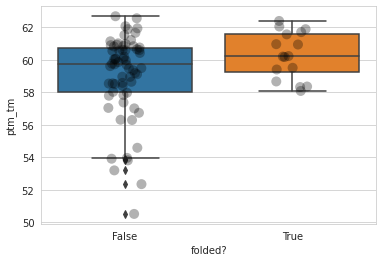

In [ ]:
sns.boxplot(data=dtm, x="folded?", y="ptm_tm")
sns.stripplot(x = "folded?",y = "ptm_tm",data = dtm, color="black",alpha = 0.3,size=10)

<AxesSubplot:xlabel='folded?', ylabel='ptm_tm'>

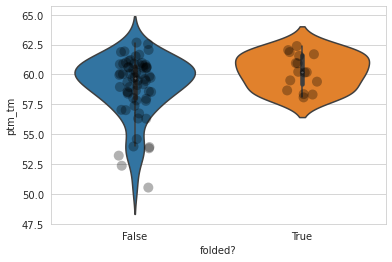

In [ ]:
sns.violinplot(data=dtm, x="folded?", y="ptm_tm")
sns.stripplot(x = "folded?",y = "ptm_tm",data = dtm, color="black",alpha = 0.3,size=10)

(30.0, 80.0)

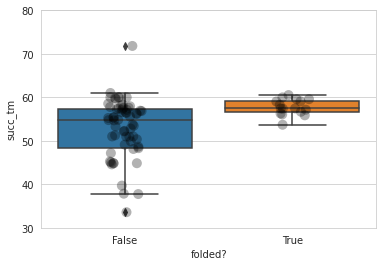

In [ ]:
#The succ_ptm of some of the non-folding designs is probably false! (curve not matching to sigmoidal)

sns.boxplot(data=dtm, x="folded?", y="succ_tm")
sns.stripplot(x = "folded?",y = "succ_tm",data = dtm, color="black",alpha = 0.3,size=10)
plt.ylim(30, 80)

In [ ]:
dtm_sig = dtm.loc[dtm["succ_success"]==1]

<AxesSubplot:xlabel='folded?', ylabel='succ_tm'>

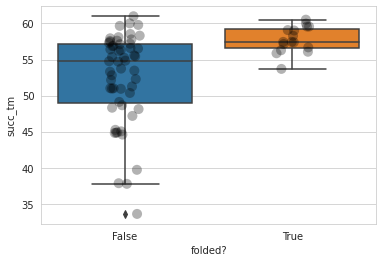

In [ ]:
#same plot but exclusing outliers that failed to fit on a sigmoidal
sns.boxplot(data=dtm_sig, x="folded?", y="succ_tm")
sns.stripplot(x = "folded?",y = "succ_tm",data = dtm_sig, color="black",alpha = 0.3,size=10)


<AxesSubplot:xlabel='folded?', ylabel='succ_tm'>

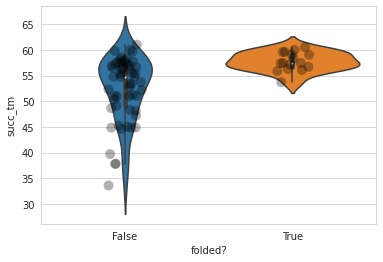

In [ ]:
#same plot but exclusing outliers that failed to fit on a sigmoidal
sns.violinplot(data=dtm_sig, x="folded?", y="succ_tm")
sns.stripplot(x = "folded?",y = "succ_tm",data = dtm_sig, color="black",alpha = 0.3,size=10)


In [ ]:
dtm_fold = dtm.loc[(dtm["succ_stop"]>=0.85) & (dtm["succ_success"]==1)]

<AxesSubplot:xlabel='folded?', ylabel='succ_tm'>

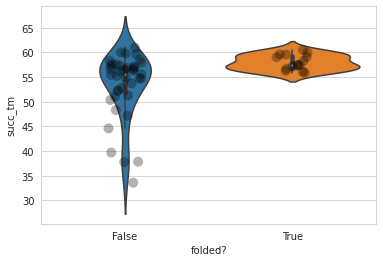

In [ ]:
#same plot but exclusing outliers that failed to fit on a sigmoidal
sns.violinplot(data=dtm_fold, x="folded?", y="succ_tm")
sns.stripplot(x = "folded?",y = "succ_tm",data = dtm_fold, color="black",alpha = 0.3,size=10)


In [ ]:
def permutation_test(dis1,dis2,n_permutations):
  n, k = len(dis1), 0
  diff = np.abs(np.mean(dis1) - np.mean(dis2))
  stats = np.zeros(n_permutations)
  all_dis = np.concatenate([dis1, dis2])
  for j in range(n_permutations):
    np.random.shuffle(all_dis)
#    labels = np.random.permutation((df['Group'] == 'treatment').values)
    k += diff < np.abs(np.mean(all_dis[:n]) - np.mean(all_dis[n:]))
#    stats[k] = np.mean(income[labels]) - np.mean(income[labels==False])
  p_value = k / n_permutations
  return(p_value)
#print(f"Permutation test: p-value={p_value:.4f}")

In [ ]:
tm_non_folded = dtm.loc[(dtm['folded?'] == False), "ptm_tm"].values
tm_folded = dtm.loc[(dtm['folded?'] == True), "ptm_tm"].values

succ_non_folded = dtm_sig.loc[(dtm_sig['folded?'] == False), "succ_tm"].values
succ_folded = dtm_sig.loc[(dtm_sig['folded?'] == True), "succ_tm"].values

stat_results_ptm = [mannwhitneyu(tm_non_folded, tm_folded, alternative="two-sided")]
pvalues_ptm = [result.pvalue for result in stat_results_ptm]
print("non folded vs folded based on ptm:", stat_results_ptm[0])

stat_results_succ = [mannwhitneyu(succ_non_folded, succ_folded, alternative="two-sided")]
pvalues_succ = [result.pvalue for result in stat_results_succ]
print("non folded vs folded based on success rate:", stat_results_succ[0])

stat_results_ptm_perm = [permutation_test(tm_non_folded, tm_folded, 10000)]
print(f"Permutation test: p-value={stat_results_ptm_perm[0]:.4f}")

stat_results_succ_perm = [permutation_test(succ_non_folded, succ_folded, 10000)]
print(f"Permutation test: p-value={stat_results_succ_perm[0]:.4f}")

non folded vs folded based on ptm: MannwhitneyuResult(statistic=375.0, pvalue=0.08651128995015396)
non folded vs folded based on success rate: MannwhitneyuResult(statistic=187.0, pvalue=0.0004180144021660456)
Permutation test: p-value=0.0639
Permutation test: p-value=0.0016


In [ ]:
list_df_water = [dmean_HBI_b_1, dmean_HBI_b_2, dmean_HBI_b_3, dmean_HBI_b_4, dmean_HBI_b_8, dmean_HBI_b_9, dmean_HBI_b_13, dmean_HBI_b_16, dmean_HBI_b_17, dmean_HBI_b_20, dmean_HBI_b_23, dmean_HBI_b_25, dmean_HBI_b_28, dmean_HBI_b_29, dmean_HBI_b_31, dmean_HBI_b_35, dmean_HBI_b_37, dmean_HBI_b_38, dmean_HBI_b_39, dmean_HBI_b_40, dmean_HBI_b_41, dmean_HBI_b_43, dmean_HBI_b_44, dmean_HBI_b_45, dmean_HBI_b_46, dmean_HBI_b_53, dmean_HBI_b_55, dmean_HBI_b_7, dmean_HBI_b_10, dmean_HBI_b_14, dmean_HBI_b_15, dmean_HBI_b_19, dmean_HBI_b_21, dmean_HBI_b_22, dmean_HBI_b_26, dmean_HBI_b_27, dmean_HBI_b_32, dmean_HBI_b_33, dmean_HBI_b_34, dmean_HBI_b_49, dmean_HBI_b_50, dmean_HBI_b_56]

In [ ]:
# Boltzmann sigmoidal
fitfunc = lambda p, x: p[1] + (p[0] - p[1]) / (1 + np.exp((p[3] - x)/p[2]))
errfunc = lambda p, x, y: fitfunc(p, x) - y
p0 = [0.0, 1.0, 0.5, 60.0]
temp = np.linspace(30.0, 95.0, 5)

folded = ["HBI_b_7", "HBI_b_10", "HBI_b_14", "HBI_b_15", "HBI_b_19", "HBI_b_21", "HBI_b_22", "HBI_b_26", "HBI_b_27", "HBI_b_32", "HBI_b_33", "HBI_b_34", "HBI_b_49", "HBI_b_50", "HBI_b_56"]
dict_tm = dict()

for dframe in list_df_water:
#  print(dframe.name)
#  print(optimize.leastsq(errfunc, p0[:], args=(dframe.index, dframe["ptm"])))
  if str(dframe.name) in folded:
    fold=True
  else:
    fold=False
  fit_ptm, success_ptm = optimize.leastsq(errfunc, p0[:], args=(dframe.index, dframe["ptm"]))
  fit_s, success_s = optimize.leastsq(errfunc, p0[:], args=(dframe.index, dframe["success_rate"]))
  dict_tm[str(dframe.name)] = [fit_ptm[0],fit_ptm[1],fit_ptm[2],fit_ptm[3],success_ptm,fit_s[0],fit_s[1],fit_s[2],fit_s[3],success_s,fold]

dtm_water = pd.DataFrame.from_dict(dict_tm, orient='index', columns=["ptm_start", "ptm_stop", "ptm_a", "ptm_tm", "ptm_success", "succ_start", "succ_stop", "succ_a", "succ_tm", "succ_success", "folded?" ])


/usr/local/lib/python3.8/dist-packages/scipy/optimize/minpack.py:476: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


In [ ]:
dtm_water

,ptm_start,ptm_stop,ptm_a,ptm_tm,ptm_success,succ_start,succ_stop,succ_a,succ_tm,succ_success,folded?
HBI_b_1,-464.039619,0.985998,49.968379,415.198148,5,-0.009403,0.975380,5.164684,49.599466,1,False
HBI_b_2,-86.090774,85.979704,5270.958025,129.585017,1,0.000486,0.871666,4.002411,43.808554,1,False
HBI_b_3,-314.096720,0.876020,53.015306,418.651504,5,-0.004552,0.805760,5.132902,38.561038,1,False
HBI_b_4,-555.281786,0.896209,38.868838,355.640388,5,-0.001359,1.025061,4.797858,47.933444,1,False
HBI_b_8,-1873.358586,0.709510,15.436136,223.776609,5,0.000675,0.399498,5.009333,45.257844,1,False
HBI_b_9,-723.904855,0.746919,20.854440,245.834282,5,-0.008604,0.751225,7.832620,38.342982,1,False
HBI_b_13,0.048760,0.706231,3.953491,89.920108,1,0.017865,0.929688,5.809228,41.385964,1,False
HBI_b_16,-826.450562,0.745064,17.940340,227.672984,5,-0.006869,0.999627,5.830285,45.211455,1,False
HBI_b_17,-90.326675,87.191426,4750.805829,283.486940,1,-0.003195,1.053117,5.066868,44.649184,1,False
HBI_b_20,-201.216668,1.234216,76.648913,498.751792,5,-0.006388,0.969798,5.087972,50.021222,1,False


<AxesSubplot:xlabel='folded?', ylabel='ptm_tm'>

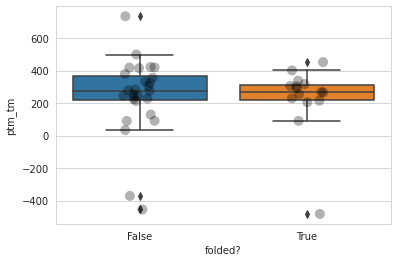

In [ ]:
sns.boxplot(data=dtm_water, x="folded?", y="ptm_tm")
sns.stripplot(x = "folded?",y = "ptm_tm",data = dtm_water, color="black",alpha = 0.3,size=10)

<AxesSubplot:xlabel='folded?', ylabel='succ_tm'>

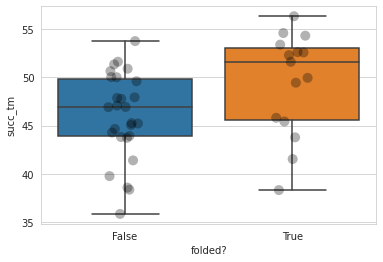

In [ ]:
#The succ_ptm of some of the non-folding designs is probably false! (curve not matching to sigmoidal)

sns.boxplot(data=dtm_water, x="folded?", y="succ_tm")
sns.stripplot(x = "folded?",y = "succ_tm",data = dtm_water, color="black",alpha = 0.3,size=10)
#plt.ylim(30, 80)

<AxesSubplot:xlabel='folded?', ylabel='succ_tm'>

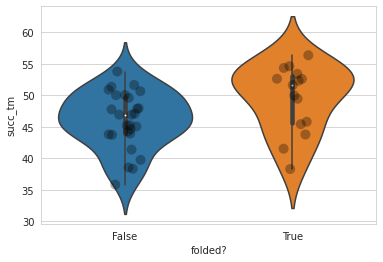

In [ ]:
#The succ_ptm of some of the non-folding designs is probably false! (curve not matching to sigmoidal)

sns.violinplot(data=dtm_water, x="folded?", y="succ_tm")
sns.stripplot(x = "folded?",y = "succ_tm",data = dtm_water, color="black",alpha = 0.3,size=10)
#plt.ylim(30, 80)

In [ ]:
dtm_sig_water = dtm_water.loc[dtm_water["succ_success"]==1]

<AxesSubplot:xlabel='folded?', ylabel='succ_tm'>

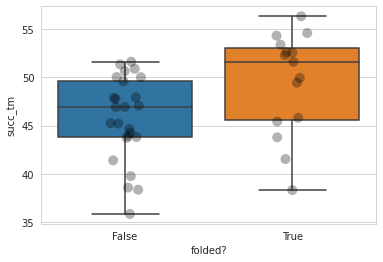

In [ ]:
#same plot but exclusing outliers that failed to fit on a sigmoidal
sns.boxplot(data=dtm_sig_water, x="folded?", y="succ_tm")
sns.stripplot(x = "folded?",y = "succ_tm",data = dtm_sig_water, color="black",alpha = 0.3,size=10)


<AxesSubplot:xlabel='folded?', ylabel='succ_tm'>

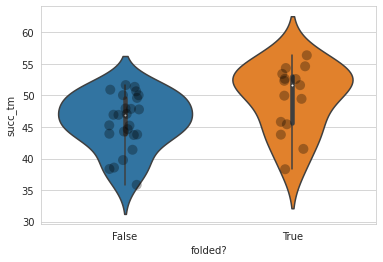

In [ ]:
#same plot but exclusing outliers that failed to fit on a sigmoidal
sns.violinplot(data=dtm_sig_water, x="folded?", y="succ_tm")
sns.stripplot(x = "folded?",y = "succ_tm",data = dtm_sig_water, color="black",alpha = 0.3,size=10)


In [ ]:
tm_non_folded_w = dtm_water.loc[(dtm_water['folded?'] == False), "ptm_tm"].values
tm_folded_w = dtm_water.loc[(dtm_water['folded?'] == True), "ptm_tm"].values

succ_non_folded_w = dtm_sig_water.loc[(dtm_sig_water['folded?'] == False), "succ_tm"].values
succ_folded_w = dtm_sig_water.loc[(dtm_sig_water['folded?'] == True), "succ_tm"].values

stat_results_ptm_w = [mannwhitneyu(tm_non_folded_w, tm_folded_w, alternative="two-sided")]
pvalues_ptm_w = [result.pvalue for result in stat_results_ptm_w]
print("non folded vs folded based on ptm:", stat_results_ptm_w[0])

stat_results_succ_w = [mannwhitneyu(succ_non_folded_w, succ_folded_w, alternative="two-sided")]
pvalues_succ_w = [result.pvalue for result in stat_results_succ_w]
print("non folded vs folded based on success rate:", stat_results_succ_w[0])

stat_results_ptm_perm_w = [permutation_test(tm_non_folded_w, tm_folded_w, 10000)]
print(f"Permutation test: p-value={stat_results_ptm_perm_w[0]:.4f}")

stat_results_succ_perm_w = [permutation_test(succ_non_folded_w, succ_folded_w, 10000)]
print(f"Permutation test: p-value={stat_results_succ_perm_w[0]:.4f}")

non folded vs folded based on ptm: MannwhitneyuResult(statistic=209.0, pvalue=0.8748509291024451)
non folded vs folded based on success rate: MannwhitneyuResult(statistic=103.0, pvalue=0.018939187032898038)
Permutation test: p-value=0.8478
Permutation test: p-value=0.0210


In [ ]:
pip install statannotations

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from statannotations.Annotator import Annotator
import numpy as np
from scipy.stats import mannwhitneyu, normaltest, brunnermunzel
from sklearn.model_selection import permutation_test_score

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

False vs. True: Custom statistical test, P_val:4.180e-04


[Text(0, 0, 'No expression\nmisfolded'), Text(1, 0, 'Folded')]

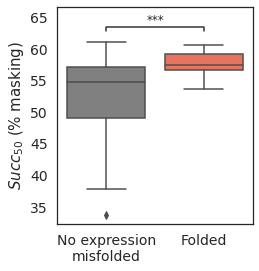

In [ ]:
# Putting the parameters in a dictionary avoids code duplication
# since we use the same for `sns.boxplot` and `Annotator` calls
sns.set(rc={'figure.figsize':(3.5,4)})
sns.set_style("white")
cols=['grey', 'tomato']

plotting_parameters = {
    'data':    dtm_sig,
    'x':       'folded?',
    'y':       'succ_tm',
    'palette': cols,
}

pairs = [(0, 1)]

formatted_pvalues = [f"p={p:.2e}" for p in pvalues_succ]

# Plot with seaborn
ax=sns.boxplot(**plotting_parameters)

# Add annotations
annotator = Annotator(ax, pairs, **plotting_parameters)
#annotator.set_custom_annotations(formatted_pvalues)
annotator.set_pvalues(pvalues_succ)
annotator.annotate()

ax.set_xlabel("")
ax.set_ylabel("$Succ_{50}$ (% masking)",fontsize=15)
ax.tick_params(labelsize=14)
ax.set_xticklabels(['No expression\nmisfolded', 'Folded'])
#plt.ylim(30, 102)

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

False vs. True: Custom statistical test, P_val:1.894e-02


[Text(0, 0, 'No expression\nmisfolded'), Text(1, 0, 'Folded')]

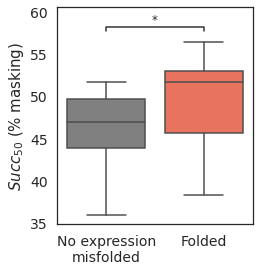

In [ ]:
# Putting the parameters in a dictionary avoids code duplication
# since we use the same for `sns.boxplot` and `Annotator` calls
sns.set(rc={'figure.figsize':(3.5,4)})
sns.set_style("white")
cols=['grey', 'tomato']

plotting_parameters = {
    'data':    dtm_sig_water,
    'x':       'folded?',
    'y':       'succ_tm',
    'palette': cols,
}

pairs = [(0, 1)]

formatted_pvalues = [f"p={p:.2e}" for p in pvalues_succ_w]

# Plot with seaborn
ax=sns.boxplot(**plotting_parameters)

# Add annotations
annotator = Annotator(ax, pairs, **plotting_parameters)
#annotator.set_custom_annotations(formatted_pvalues)
annotator.set_pvalues(pvalues_succ_w)
annotator.annotate()

ax.set_xlabel("")
ax.set_ylabel("$Succ_{50}$ (% masking)",fontsize=15)
ax.tick_params(labelsize=14)
ax.set_xticklabels(['No expression\nmisfolded', 'Folded'])
#plt.ylim(30, 102)

In [ ]:
import pickle

dbest_p_AF48 = pd.read_pickle("/content/google_drive/My Drive/AF_vs_ESMF/ESMFold_masking/AF48_best_plddt.pkl")
dbest_r_AF48 = pd.read_pickle("/content/google_drive/My Drive/AF_vs_ESMF/ESMFold_masking/AF48_best_rmsd.pkl")

In [ ]:
dbest_r_AF48.index = dbest_r_AF48.index.str.replace(".", "_")
dbest_r_AF48

<ipython-input-31-8521f8063d79>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dbest_r_AF48.index = dbest_r_AF48.index.str.replace(".", "_")


,expression,solubility (detergent),folded (biochemical tests),NMR,plDDT,RMSD,aggregation,beta_sheet
design,,,,,,,,
TMB2_1,1,1,0,0,46.949194,3.44,55.33,44.354839
TMB2_12,1,1,0,0,35.650403,3.65,494.25,35.483871
TMB2_14,0,0,0,0,70.942581,1.97,1097.65,43.548387
TMB2_15,1,1,0,0,28.654194,3.60,1255.72,46.774194
TMB2_17,1,1,1,1,92.884677,1.57,835.79,45.161290
...,...,...,...,...,...,...,...,...
TMB2_86,1,1,0,0,66.170484,2.33,1342.79,33.870968
TMB2_87,1,1,0,0,33.040726,4.75,1215.45,45.967742
TMB2_88,1,1,0,0,84.483306,1.89,527.04,47.580645


In [ ]:
all_rmsd = pd.concat([dtm, dbest_r_AF48], axis=1)
all_rmsd

,ptm_start,ptm_stop,ptm_a,ptm_tm,ptm_success,succ_start,succ_stop,succ_a,succ_tm,succ_success,folded?,expression,solubility (detergent),folded (biochemical tests),NMR,plDDT,RMSD,aggregation,beta_sheet
TMB2_1,0.124427,0.767150,4.289844,60.971630,1,-0.012494,0.922930,5.298390,51.009094,1,False,1,1,0,0,46.949194,3.44,55.33,44.354839
TMB2_2,0.114512,0.720185,4.307808,59.718618,1,-0.001270,0.206708,5.122936,48.125245,1,False,1,1,0,0,66.704919,2.79,572.42,19.354839
TMB2_3,0.110963,0.777090,4.184035,62.383072,1,-0.015140,0.979713,4.492317,60.525043,1,True,1,1,1,1,91.012661,1.85,230.78,45.161290
TMB2_4,0.160169,0.730164,5.241802,53.201705,1,-0.000845,0.236239,2.677522,44.881483,1,False,1,1,0,0,85.782984,1.80,1170.79,27.419355
TMB2_5,0.125016,0.751925,4.721559,57.790063,1,-0.016410,0.984363,6.846515,44.590950,1,False,1,1,0,0,85.301935,1.48,1049.29,36.290323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TMB2_85,0.117555,0.804956,4.623243,59.504622,1,-0.009317,0.963427,4.200126,58.286019,1,True,1,1,1,1,87.987016,1.64,668.11,41.935484
TMB2_86,0.134592,0.745788,5.986548,54.590734,1,-0.004488,0.602303,5.616858,45.036043,1,False,1,1,0,0,66.170484,2.33,1342.79,33.870968
TMB2_87,0.125239,0.733723,5.304689,56.312731,1,-0.003810,188.942618,12.377095,-55.439690,5,False,1,1,0,0,33.040726,4.75,1215.45,45.967742
TMB2_88,0.146029,0.753907,5.364731,59.609456,1,0.003248,0.608762,5.067732,49.119791,1,False,1,1,0,0,84.483306,1.89,527.04,47.580645


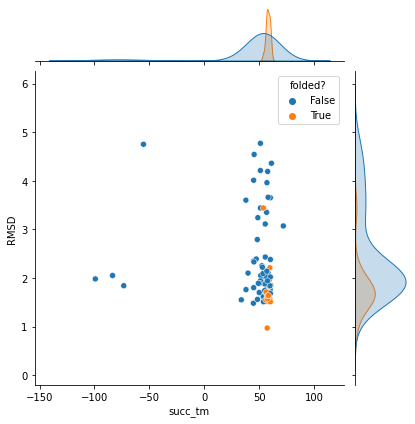

In [ ]:
sns.jointplot(data=all_rmsd, x="succ_tm", y="RMSD", hue="folded?")

In [ ]:
all_rmsd_sig = all_rmsd.loc[all_rmsd["succ_success"]==1]

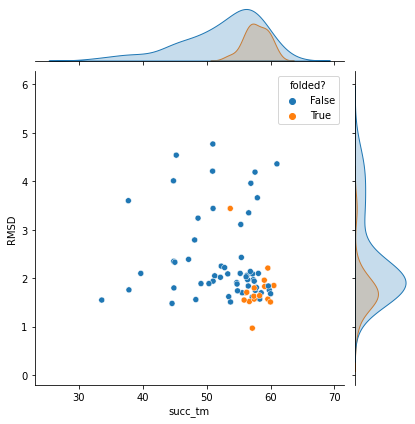

In [ ]:
sns.jointplot(data=all_rmsd_sig, x="succ_tm", y="RMSD", hue="folded?")

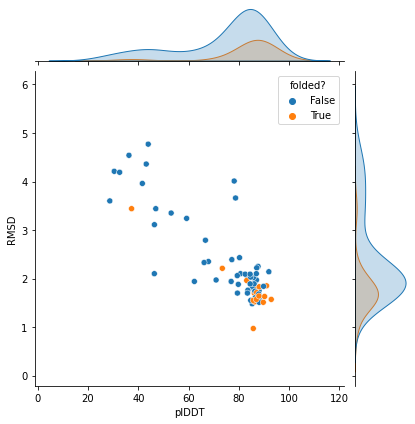

In [ ]:
sns.jointplot(data=all_rmsd_sig, x="plDDT", y="RMSD", hue="folded?")

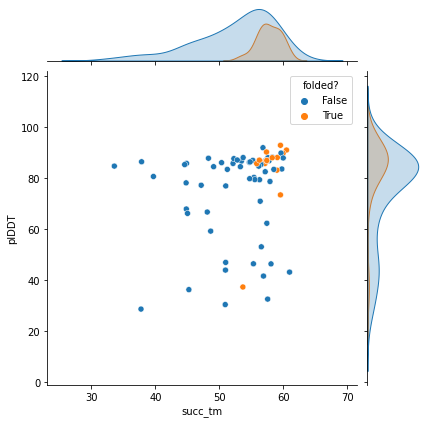

In [ ]:
sns.jointplot(data=all_rmsd_sig, x="succ_tm", y="plDDT", hue="folded?")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path_to_files= "/content/drive/MyDrive/AF_vs_ESMF/ESMFold_masking/designs/1a_all_csv_succ_rate"

df_list = []

for filename in os.listdir(path_to_files):

  filepath = os.path.join(path_to_files, filename)
  df = pd.read_csv(filepath)
        # Append the DataFrame to the list
  df_list.append(df)

print(df_list)


[    %_mask       ptm      plDDT  plDDT_backbone  success_rate
0       30  0.758219  74.144622       78.346958      0.812500
1       35  0.751047  73.632355       77.823917      0.687500
2       40  0.726125  71.464313       75.508016      0.625000
3       45  0.718531  70.920921       74.946960      0.500000
4       50  0.682469  68.142705       72.049195      0.453125
5       55  0.565766  58.593279       61.927057      0.375000
6       60  0.426453  47.393120       50.011299      0.171875
7       65  0.249266  33.081007       34.958814      0.062500
8       70  0.159344  25.866455       27.423516      0.015625
9       75  0.126609  23.152337       24.570418      0.000000
10      80  0.126516  23.605633       25.032005      0.000000
11      85  0.124328  24.220934       25.635939      0.000000
12      90  0.123969  25.569561       26.908776      0.000000
13      95  0.125109  28.932090       30.217518      0.000000,     %_mask       ptm      plDDT  plDDT_backbone  success_rate
0     

In [ ]:

# Specify the directory path
directory = '/content/drive/MyDrive/AF_vs_ESMF/ESMFold_masking/advanced_notebook_sample_output/'

# Create an empty dictionary to store the data
data_dict = {}

# Loop through files in the directory
for filename in os.listdir(directory):
    # Check if the item is a file and has a CSV extension
    if os.path.isfile(os.path.join(directory, filename)) and filename.endswith('.csv'):
        # Read the CSV file as a DataFrame
        filepath = os.path.join(directory, filename)
        df = pd.read_csv(filepath)
        # Get the values from column 5
        column_values = df['success_rate'].values
        # Use the file name as the column header
        column_name = os.path.splitext(filename)[0]
        # Add the column values to the dictionary
        data_dict[column_name] = column_values

# Create the giant DataFrame from the dictionary
giant_df = pd.DataFrame(data_dict)

# Now you have a giant DataFrame where each column contains the values from column 5 of each CSV file
# You can perform further operations on the giant DataFrame as needed
# For example, you can print the first few rows
giant_df

giant_df.to_csv("/content/drive/MyDrive/AF_vs_ESMF/ESMFold_masking/advanced_notebook_sample_output/all_results.csv")

In [ ]:
masking=[30,35,40,45,50,55,60,65,70,75,80,85,90,95,99]
pdb_list = ["HBI_b_"+str(x) for x in range(3,4)]


for pdb in pdb_list:
    print(pdb)
    d = {}
    for csv_f in glob.glob(input_soluble+"/"+pdb+"_mask_*/"+pdb+".csv"):
        with open(csv_f, "r") as infile:
            for line in infile:
                vals=line.split(";")
                d[(int(vals[0]),int(vals[1]))]=[float(vals[2]), float(vals[3])]

    for mask in masking:
        ptm=[]
        plDDT = []
        plDDT_backbone = []
        for f in glob.glob(input_soluble+"/"+pdb+"_mask_*/"+"*_LM_m0."+str(mask)+".pdb"):
            pl = []
            pl_bb = []
            ptm.append(float(os.path.basename(f).split("_")[0].replace("ptm","")))
            with open(f, "r") as in_f:
                for line in in_f:
                    if line.startswith("ATOM"):
                        vals = line.split()
                        if vals[2] in ["N","CA","C","O","CB"]:
                            pl_bb.append(float(vals[10]))
                        pl.append(float(vals[10]))
            plDDT.append(sum(pl)/len(pl))
            plDDT_backbone.append(sum(pl_bb)/len(pl_bb))
        for i in range(len(ptm)):
            d[(mask,i)].append(ptm[i])
            d[(mask,i)].append(plDDT[i])
            d[(mask,i)].append(plDDT_backbone[i])
    df = pd.DataFrame(d)
    df = df.T
    df = df.rename(columns={0:"tmscore",1:"RMSD",2: "ptm", 3: "plDDT", 4: "plDDT_backbone"})
    df.index.names = ['%_mask','model']
    new_df_name = "d"+pdb
    exec(f'{new_df_name} = df.copy()')
    dHBI_b_3

HBI_b_3


In [ ]:
print(dHBI_b_3)

              tmscore  RMSD    ptm      plDDT  plDDT_backbone
%_mask model                                                 
95     8      0.20008  4.80  0.144  35.730757       37.063432
65     24     0.43777  3.53  0.329  41.786082       43.413395
55     5      0.59929  3.69  0.510  57.251959       59.621199
40     22     0.86054  1.65  0.564  65.439123       68.579797
75     43     0.61358  3.45  0.489  56.981166       59.463137
...               ...   ...    ...        ...             ...
45     57     0.69784  2.96  0.526  60.555649       63.307251
35     60     0.85215  1.80  0.746  77.182139       81.038118
75     18     0.66912  3.06  0.488  54.493005       56.834520
99     17     0.15537  4.69  0.121  31.124471       32.206218
30     7      0.84960  1.81  0.758  77.131563       81.157860

[960 rows x 5 columns]


In [ ]:
dmean_HBI_b_3 = dHBI_b_3.groupby(level=0).mean()
dHBI_b_3_filt = dHBI_b_3.loc[dHBI_b_3.ptm >=0.75]
dHBI_b_3_pass = dHBI_b_3_filt.groupby(level=0).count()
dmean_HBI_b_3["success_rate"] = dHBI_b_3_pass.ptm/64.0
dmean_HBI_b_3['success_rate'] = dmean_HBI_b_3['success_rate'].fillna(0)
dmean_HBI_b_3

,tmscore,RMSD,ptm,plDDT,plDDT_backbone,success_rate
%_mask,,,,,,
30,0.830156,1.944375,0.720906,74.639463,78.347591,0.687500
35,0.794154,2.195469,0.667672,70.239657,73.661826,0.515625
40,0.752759,2.467188,0.612672,66.104208,69.228162,0.343750
45,0.722759,2.679375,0.579672,63.499632,66.432259,0.218750
50,0.692206,2.925781,0.531797,59.328513,61.944470,0.031250
55,0.653431,3.224687,0.504422,57.134440,59.628578,0.015625
60,0.642986,3.257344,0.494344,56.306411,58.731016,0.000000
65,0.626464,3.358750,0.472484,54.375123,56.679141,0.000000
70,0.609820,3.393438,0.461266,52.953642,55.180326,0.000000
